In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/GBP_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74258, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,1.32463,1.32469,1.32459,1.32476
2020-01-01 17:15:00,1.32469,1.32512,1.32457,1.32535
2020-01-01 17:30:00,1.32511,1.32502,1.32470,1.32512
2020-01-01 17:45:00,1.32510,1.32467,1.32458,1.32548
2020-01-01 18:00:00,1.32469,1.32568,1.32469,1.32608


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74257, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,1.32463,1.32469,1.32459,1.32476,1.32512,17,2,1,-0.00006,1.324675,0.00017,1.324667
2020-01-01 17:15:00,1.32469,1.32512,1.32457,1.32535,1.32502,17,2,1,-0.00043,1.324960,0.00078,1.324933
2020-01-01 17:30:00,1.32511,1.32502,1.32470,1.32512,1.32467,17,2,1,0.00009,1.324910,0.00042,1.324987
2020-01-01 17:45:00,1.32510,1.32467,1.32458,1.32548,1.32568,17,2,1,0.00043,1.325030,0.00090,1.324958
2020-01-01 18:00:00,1.32469,1.32568,1.32469,1.32608,1.32536,18,2,1,-0.00099,1.325385,0.00139,1.325285


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,1.32463,1.32469,1.32459,1.32476,1.32512,17,2,1,-0.00006,1.324675,0.00017,1.324667,-25.513174
2020-01-01 17:15:00,1.32469,1.32512,1.32457,1.32535,1.32502,17,2,1,-0.00043,1.324960,0.00078,1.324933,-25.513411
2020-01-01 17:30:00,1.32511,1.32502,1.32470,1.32512,1.32467,17,2,1,0.00009,1.324910,0.00042,1.324987,-25.513411
2020-01-01 17:45:00,1.32510,1.32467,1.32458,1.32548,1.32568,17,2,1,0.00043,1.325030,0.00090,1.324958,-25.513412
2020-01-01 18:00:00,1.32469,1.32568,1.32469,1.32608,1.32536,18,2,1,-0.00099,1.325385,0.00139,1.325285,-25.513628


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.32463  1.32459  1.32476         1.32512    17    2   
2020-01-01 17:15:00  1.32469  1.32457  1.32535         1.32502    17    2   
2020-01-01 17:30:00  1.32511  1.32470  1.32512         1.32467    17    2   
2020-01-01 17:45:00  1.32510  1.32458  1.32548         1.32568    17    2   
2020-01-01 18:00:00  1.32469  1.32469  1.32608         1.32536    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00006   1.324675  0.00017    1.324667 -25.513174  
2020-01-01 17:15:00     1  -0.00043   1.324960  0.00078    1.324933 -25.513411  
2020-01-01 17:30:00     1   0.00009   1.324910  0.00042    1.324987 -25.513411  
2020-01-01 17:45:00     1   0.00043   1.325030  0.00090

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_15Min(X,y)

59405
59405
7500
7500
7352
7352


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(59405, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(59380, 24, 12)
(7475, 24, 12)
(7327, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(59380, 1)
(7475, 1)
(7327, 1)


array([[0.6350293 ],
       [0.6348872 ],
       [0.6361966 ],
       ...,
       [0.39192724],
       [0.39235163],
       [0.39599514]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.6350293 , 0.6348872 , 0.6361966 , ..., 0.39192724, 0.39235163,
       0.39599514], dtype=float32)

In [ ]:
model= thesis.BiLSTM_Model(x_train)


In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 172.5868 - mae: 1.9905 - mse: 172.5868 - root_mean_squared_error: 13.1372 - mape: 24516.8633
Epoch 1: val_mse improved from inf to 0.05984, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 205s 412ms/step - loss: 172.5868 - mae: 1.9905 - mse: 172.5868 - root_mean_squared_error: 13.1372 - mape: 24516.8633 - val_loss: 0.0598 - val_mae: 0.1936 - val_mse: 0.0598 - val_root_mean_squared_error: 0.2446 - val_mape: 84339.8047
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0436 - mae: 0.1721 - mse: 0.0436 - root_mean_squared_error: 0.2087 - mape: 12428.7637
Epoch 2: val_mse improved from 0.05984 to 0.05889, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 183s 395ms/step - loss: 0.0436 - mae: 0.1721 - mse: 0.0436 - root_mean_squared_error: 0.2087 - mape: 12428.7637 - val_loss: 0.0589 - val_mae: 0.1919 - val_mse: 0.0589 - val_root_mean_squared_error: 0.2427 - val_mape: 83315.1094
Epoch 3/75
464/464 [==============================] - ETA: 0s - loss: 0.0428 - mae: 0.1705 - mse: 0.0428 - root_mean_squared_error: 0.2068 - mape: 11030.3730
Epoch 3: val_mse did not improve from 0.05889
464/464 [==============================] - 143s 308ms/step - loss: 0.0428 - mae: 0.1705 - mse: 0.0428 - root_mean_squared_error: 0.2068 - mape: 11030.3730 - val_loss: 0.0594 - val_mae: 0.1935 - val_mse: 0.0594 - val_root_mean_squared_error: 0.2437 - val_mape: 83908.0469
Epoch 4/75
464/464 [==============================] - ETA: 0s - loss: 0.0418 - mae: 0.1685 - mse: 0.0418 - root_mean_squared_error: 0.2044 - mape: 10637.7061
Epoch 4: val_mse improved from 0.05889 to 0.05774, saving model to /content/drive/MyDrive/modelw

464/464 [==============================] - 185s 398ms/step - loss: 0.0418 - mae: 0.1685 - mse: 0.0418 - root_mean_squared_error: 0.2044 - mape: 10637.7061 - val_loss: 0.0577 - val_mae: 0.1905 - val_mse: 0.0577 - val_root_mean_squared_error: 0.2403 - val_mape: 82364.2500
Epoch 5/75
464/464 [==============================] - ETA: 0s - loss: 0.0404 - mae: 0.1658 - mse: 0.0404 - root_mean_squared_error: 0.2010 - mape: 13384.0273
Epoch 5: val_mse improved from 0.05774 to 0.05676, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 182s 392ms/step - loss: 0.0404 - mae: 0.1658 - mse: 0.0404 - root_mean_squared_error: 0.2010 - mape: 13384.0273 - val_loss: 0.0568 - val_mae: 0.1895 - val_mse: 0.0568 - val_root_mean_squared_error: 0.2383 - val_mape: 81835.4766
Epoch 6/75
464/464 [==============================] - ETA: 0s - loss: 0.0386 - mae: 0.1623 - mse: 0.0386 - root_mean_squared_error: 0.1965 - mape: 11081.3262
Epoch 6: val_mse improved from 0.05676 to 0.05320, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 189s 409ms/step - loss: 0.0386 - mae: 0.1623 - mse: 0.0386 - root_mean_squared_error: 0.1965 - mape: 11081.3262 - val_loss: 0.0532 - val_mae: 0.1835 - val_mse: 0.0532 - val_root_mean_squared_error: 0.2306 - val_mape: 78827.7578
Epoch 7/75
464/464 [==============================] - ETA: 0s - loss: 0.0331 - mae: 0.1497 - mse: 0.0331 - root_mean_squared_error: 0.1818 - mape: 8321.0420
Epoch 7: val_mse improved from 0.05320 to 0.03342, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 186s 401ms/step - loss: 0.0331 - mae: 0.1497 - mse: 0.0331 - root_mean_squared_error: 0.1818 - mape: 8321.0420 - val_loss: 0.0334 - val_mae: 0.1461 - val_mse: 0.0334 - val_root_mean_squared_error: 0.1828 - val_mape: 62274.4844
Epoch 8/75
464/464 [==============================] - ETA: 0s - loss: 0.0178 - mae: 0.1070 - mse: 0.0178 - root_mean_squared_error: 0.1336 - mape: 7302.3306
Epoch 8: val_mse improved from 0.03342 to 0.00760, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 184s 397ms/step - loss: 0.0178 - mae: 0.1070 - mse: 0.0178 - root_mean_squared_error: 0.1336 - mape: 7302.3306 - val_loss: 0.0076 - val_mae: 0.0659 - val_mse: 0.0076 - val_root_mean_squared_error: 0.0872 - val_mape: 37745.8242
Epoch 9/75
464/464 [==============================] - ETA: 0s - loss: 0.0099 - mae: 0.0782 - mse: 0.0099 - root_mean_squared_error: 0.0993 - mape: 5871.5518
Epoch 9: val_mse improved from 0.00760 to 0.00506, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 187s 403ms/step - loss: 0.0099 - mae: 0.0782 - mse: 0.0099 - root_mean_squared_error: 0.0993 - mape: 5871.5518 - val_loss: 0.0051 - val_mae: 0.0495 - val_mse: 0.0051 - val_root_mean_squared_error: 0.0711 - val_mape: 37700.1523
Epoch 10/75
464/464 [==============================] - ETA: 0s - loss: 0.0075 - mae: 0.0678 - mse: 0.0075 - root_mean_squared_error: 0.0865 - mape: 5052.5684
Epoch 10: val_mse improved from 0.00506 to 0.00435, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 186s 402ms/step - loss: 0.0075 - mae: 0.0678 - mse: 0.0075 - root_mean_squared_error: 0.0865 - mape: 5052.5684 - val_loss: 0.0043 - val_mae: 0.0437 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0659 - val_mape: 36902.1680
Epoch 11/75
464/464 [==============================] - ETA: 0s - loss: 0.0060 - mae: 0.0607 - mse: 0.0060 - root_mean_squared_error: 0.0776 - mape: 4396.1875
Epoch 11: val_mse improved from 0.00435 to 0.00364, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 184s 396ms/step - loss: 0.0060 - mae: 0.0607 - mse: 0.0060 - root_mean_squared_error: 0.0776 - mape: 4396.1875 - val_loss: 0.0036 - val_mae: 0.0380 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0604 - val_mape: 35241.1055
Epoch 12/75
464/464 [==============================] - ETA: 0s - loss: 0.0050 - mae: 0.0548 - mse: 0.0050 - root_mean_squared_error: 0.0705 - mape: 4040.2993
Epoch 12: val_mse improved from 0.00364 to 0.00324, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 191s 412ms/step - loss: 0.0050 - mae: 0.0548 - mse: 0.0050 - root_mean_squared_error: 0.0705 - mape: 4040.2993 - val_loss: 0.0032 - val_mae: 0.0368 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0569 - val_mape: 33517.1992
Epoch 13/75
464/464 [==============================] - ETA: 0s - loss: 0.0042 - mae: 0.0506 - mse: 0.0042 - root_mean_squared_error: 0.0648 - mape: 3309.5349
Epoch 13: val_mse improved from 0.00324 to 0.00291, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 187s 403ms/step - loss: 0.0042 - mae: 0.0506 - mse: 0.0042 - root_mean_squared_error: 0.0648 - mape: 3309.5349 - val_loss: 0.0029 - val_mae: 0.0354 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0540 - val_mape: 31472.1016
Epoch 14/75
464/464 [==============================] - ETA: 0s - loss: 0.0036 - mae: 0.0468 - mse: 0.0036 - root_mean_squared_error: 0.0600 - mape: 3844.0679
Epoch 14: val_mse improved from 0.00291 to 0.00273, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 183s 395ms/step - loss: 0.0036 - mae: 0.0468 - mse: 0.0036 - root_mean_squared_error: 0.0600 - mape: 3844.0679 - val_loss: 0.0027 - val_mae: 0.0348 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0522 - val_mape: 30397.0820
Epoch 15/75
464/464 [==============================] - ETA: 0s - loss: 0.0030 - mae: 0.0427 - mse: 0.0030 - root_mean_squared_error: 0.0546 - mape: 3008.8821
Epoch 15: val_mse improved from 0.00273 to 0.00253, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 186s 401ms/step - loss: 0.0030 - mae: 0.0427 - mse: 0.0030 - root_mean_squared_error: 0.0546 - mape: 3008.8821 - val_loss: 0.0025 - val_mae: 0.0334 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0503 - val_mape: 29755.3750
Epoch 16/75
464/464 [==============================] - ETA: 0s - loss: 0.0025 - mae: 0.0389 - mse: 0.0025 - root_mean_squared_error: 0.0498 - mape: 4455.5498
Epoch 16: val_mse improved from 0.00253 to 0.00239, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 187s 402ms/step - loss: 0.0025 - mae: 0.0389 - mse: 0.0025 - root_mean_squared_error: 0.0498 - mape: 4455.5498 - val_loss: 0.0024 - val_mae: 0.0350 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0489 - val_mape: 28521.8223
Epoch 17/75
464/464 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0357 - mse: 0.0021 - root_mean_squared_error: 0.0456 - mape: 3160.8169
Epoch 17: val_mse improved from 0.00239 to 0.00223, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 188s 406ms/step - loss: 0.0021 - mae: 0.0357 - mse: 0.0021 - root_mean_squared_error: 0.0456 - mape: 3160.8169 - val_loss: 0.0022 - val_mae: 0.0336 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0472 - val_mape: 27080.0410
Epoch 18/75
464/464 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0325 - mse: 0.0017 - root_mean_squared_error: 0.0416 - mape: 3727.0354
Epoch 18: val_mse improved from 0.00223 to 0.00195, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 185s 399ms/step - loss: 0.0017 - mae: 0.0325 - mse: 0.0017 - root_mean_squared_error: 0.0416 - mape: 3727.0354 - val_loss: 0.0020 - val_mae: 0.0312 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0442 - val_mape: 26360.4922
Epoch 19/75
464/464 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0293 - mse: 0.0014 - root_mean_squared_error: 0.0376 - mape: 2671.7236
Epoch 19: val_mse improved from 0.00195 to 0.00183, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 187s 404ms/step - loss: 0.0014 - mae: 0.0293 - mse: 0.0014 - root_mean_squared_error: 0.0376 - mape: 2671.7236 - val_loss: 0.0018 - val_mae: 0.0295 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0428 - val_mape: 25066.9746
Epoch 20/75
464/464 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0265 - mse: 0.0012 - root_mean_squared_error: 0.0340 - mape: 2441.1765
Epoch 20: val_mse improved from 0.00183 to 0.00135, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 188s 405ms/step - loss: 0.0012 - mae: 0.0265 - mse: 0.0012 - root_mean_squared_error: 0.0340 - mape: 2441.1765 - val_loss: 0.0014 - val_mae: 0.0247 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0367 - val_mape: 23230.0137
Epoch 21/75
464/464 [==============================] - ETA: 0s - loss: 9.8131e-04 - mae: 0.0245 - mse: 9.8131e-04 - root_mean_squared_error: 0.0313 - mape: 2416.2856
Epoch 21: val_mse improved from 0.00135 to 0.00134, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 187s 402ms/step - loss: 9.8131e-04 - mae: 0.0245 - mse: 9.8131e-04 - root_mean_squared_error: 0.0313 - mape: 2416.2856 - val_loss: 0.0013 - val_mae: 0.0255 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0367 - val_mape: 22120.8320
Epoch 22/75
464/464 [==============================] - ETA: 0s - loss: 7.9554e-04 - mae: 0.0220 - mse: 7.9554e-04 - root_mean_squared_error: 0.0282 - mape: 2180.4336
Epoch 22: val_mse improved from 0.00134 to 0.00122, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 188s 406ms/step - loss: 7.9554e-04 - mae: 0.0220 - mse: 7.9554e-04 - root_mean_squared_error: 0.0282 - mape: 2180.4336 - val_loss: 0.0012 - val_mae: 0.0247 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0349 - val_mape: 20908.9941
Epoch 23/75
464/464 [==============================] - ETA: 0s - loss: 6.6860e-04 - mae: 0.0202 - mse: 6.6860e-04 - root_mean_squared_error: 0.0259 - mape: 2106.1750
Epoch 23: val_mse improved from 0.00122 to 0.00090, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 187s 402ms/step - loss: 6.6860e-04 - mae: 0.0202 - mse: 6.6860e-04 - root_mean_squared_error: 0.0259 - mape: 2106.1750 - val_loss: 8.9870e-04 - val_mae: 0.0208 - val_mse: 8.9870e-04 - val_root_mean_squared_error: 0.0300 - val_mape: 19448.7246
Epoch 24/75
464/464 [==============================] - ETA: 0s - loss: 5.6468e-04 - mae: 0.0186 - mse: 5.6468e-04 - root_mean_squared_error: 0.0238 - mape: 2494.8450
Epoch 24: val_mse improved from 0.00090 to 0.00087, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 188s 405ms/step - loss: 5.6468e-04 - mae: 0.0186 - mse: 5.6468e-04 - root_mean_squared_error: 0.0238 - mape: 2494.8450 - val_loss: 8.7178e-04 - val_mae: 0.0220 - val_mse: 8.7178e-04 - val_root_mean_squared_error: 0.0295 - val_mape: 18702.8594
Epoch 25/75
464/464 [==============================] - ETA: 0s - loss: 4.9667e-04 - mae: 0.0174 - mse: 4.9667e-04 - root_mean_squared_error: 0.0223 - mape: 2183.2058
Epoch 25: val_mse improved from 0.00087 to 0.00085, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 189s 408ms/step - loss: 4.9667e-04 - mae: 0.0174 - mse: 4.9667e-04 - root_mean_squared_error: 0.0223 - mape: 2183.2058 - val_loss: 8.5105e-04 - val_mae: 0.0211 - val_mse: 8.5105e-04 - val_root_mean_squared_error: 0.0292 - val_mape: 17904.2168
Epoch 26/75
464/464 [==============================] - ETA: 0s - loss: 4.7495e-04 - mae: 0.0171 - mse: 4.7495e-04 - root_mean_squared_error: 0.0218 - mape: 1883.3723
Epoch 26: val_mse improved from 0.00085 to 0.00084, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 187s 404ms/step - loss: 4.7495e-04 - mae: 0.0171 - mse: 4.7495e-04 - root_mean_squared_error: 0.0218 - mape: 1883.3723 - val_loss: 8.3958e-04 - val_mae: 0.0219 - val_mse: 8.3958e-04 - val_root_mean_squared_error: 0.0290 - val_mape: 17042.5215
Epoch 27/75
464/464 [==============================] - ETA: 0s - loss: 4.0036e-04 - mae: 0.0156 - mse: 4.0036e-04 - root_mean_squared_error: 0.0200 - mape: 1810.1394
Epoch 27: val_mse improved from 0.00084 to 0.00082, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 189s 408ms/step - loss: 4.0036e-04 - mae: 0.0156 - mse: 4.0036e-04 - root_mean_squared_error: 0.0200 - mape: 1810.1394 - val_loss: 8.2226e-04 - val_mae: 0.0220 - val_mse: 8.2226e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 16596.5020
Epoch 28/75
464/464 [==============================] - ETA: 0s - loss: 3.3549e-04 - mae: 0.0143 - mse: 3.3549e-04 - root_mean_squared_error: 0.0183 - mape: 2021.2870
Epoch 28: val_mse improved from 0.00082 to 0.00078, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 190s 410ms/step - loss: 3.3549e-04 - mae: 0.0143 - mse: 3.3549e-04 - root_mean_squared_error: 0.0183 - mape: 2021.2870 - val_loss: 7.8329e-04 - val_mae: 0.0211 - val_mse: 7.8329e-04 - val_root_mean_squared_error: 0.0280 - val_mape: 15746.3213
Epoch 29/75
464/464 [==============================] - ETA: 0s - loss: 3.1957e-04 - mae: 0.0140 - mse: 3.1957e-04 - root_mean_squared_error: 0.0179 - mape: 1817.2811
Epoch 29: val_mse improved from 0.00078 to 0.00054, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 189s 408ms/step - loss: 3.1957e-04 - mae: 0.0140 - mse: 3.1957e-04 - root_mean_squared_error: 0.0179 - mape: 1817.2811 - val_loss: 5.3642e-04 - val_mae: 0.0164 - val_mse: 5.3642e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 15357.2598
Epoch 30/75
464/464 [==============================] - ETA: 0s - loss: 2.8613e-04 - mae: 0.0132 - mse: 2.8613e-04 - root_mean_squared_error: 0.0169 - mape: 1522.3293
Epoch 30: val_mse did not improve from 0.00054
464/464 [==============================] - 148s 319ms/step - loss: 2.8613e-04 - mae: 0.0132 - mse: 2.8613e-04 - root_mean_squared_error: 0.0169 - mape: 1522.3293 - val_loss: 6.1604e-04 - val_mae: 0.0181 - val_mse: 6.1604e-04 - val_root_mean_squared_error: 0.0248 - val_mape: 14718.5352
Epoch 31/75
464/464 [==============================] - ETA: 0s - loss: 2.5958e-04 - mae: 0.0126 - mse: 2.5958e-04 - root_mean_squared_error: 0.0161 - mape: 1695.0978
Epoch 31: val_mse did not improve from 0.00054
46

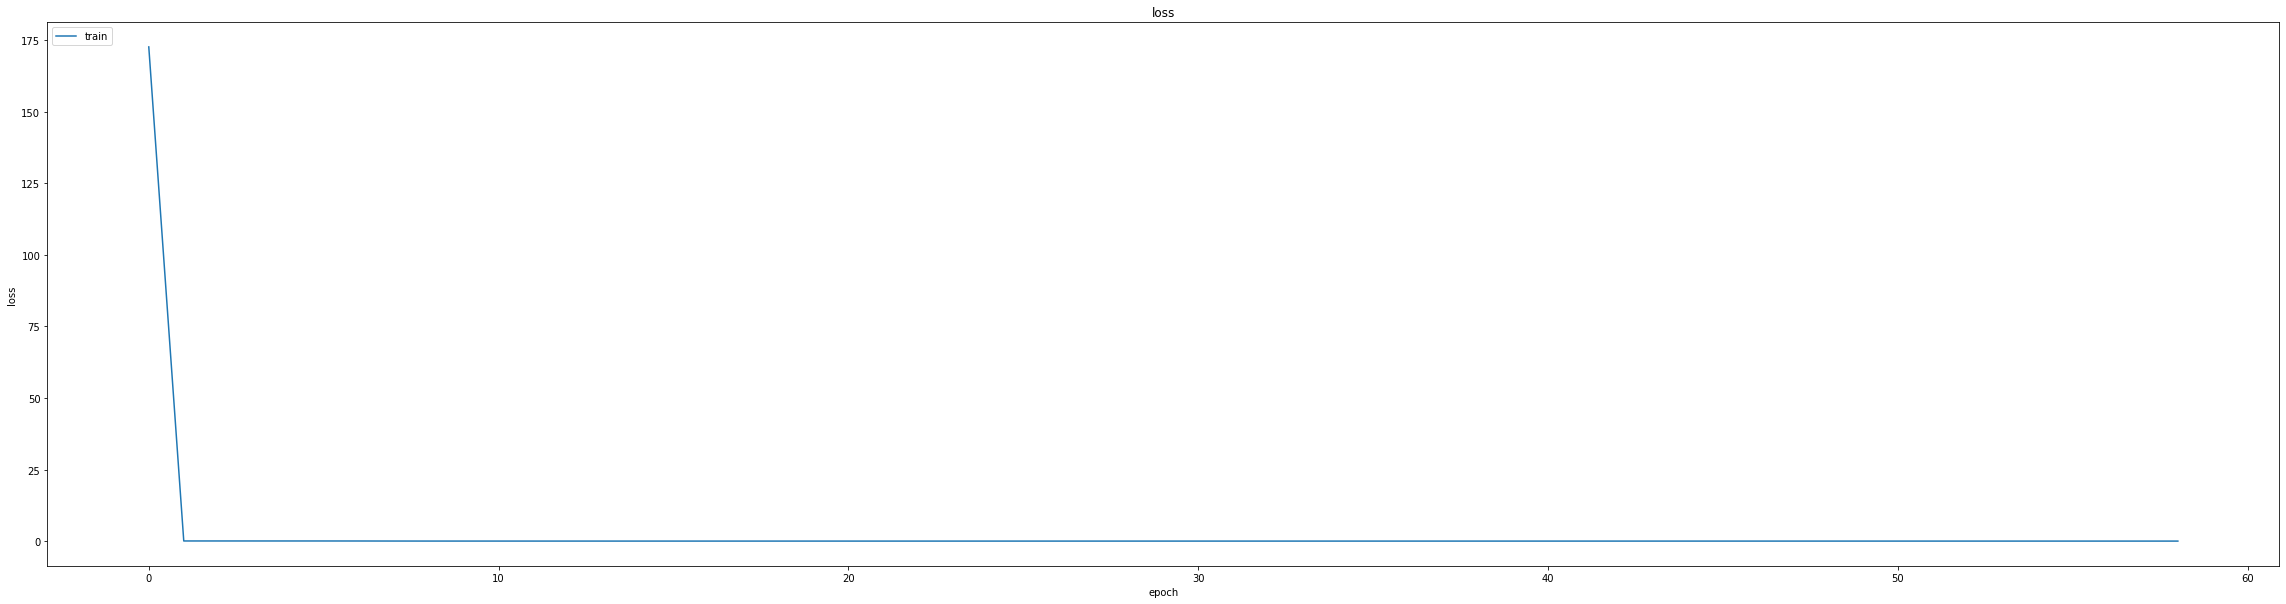

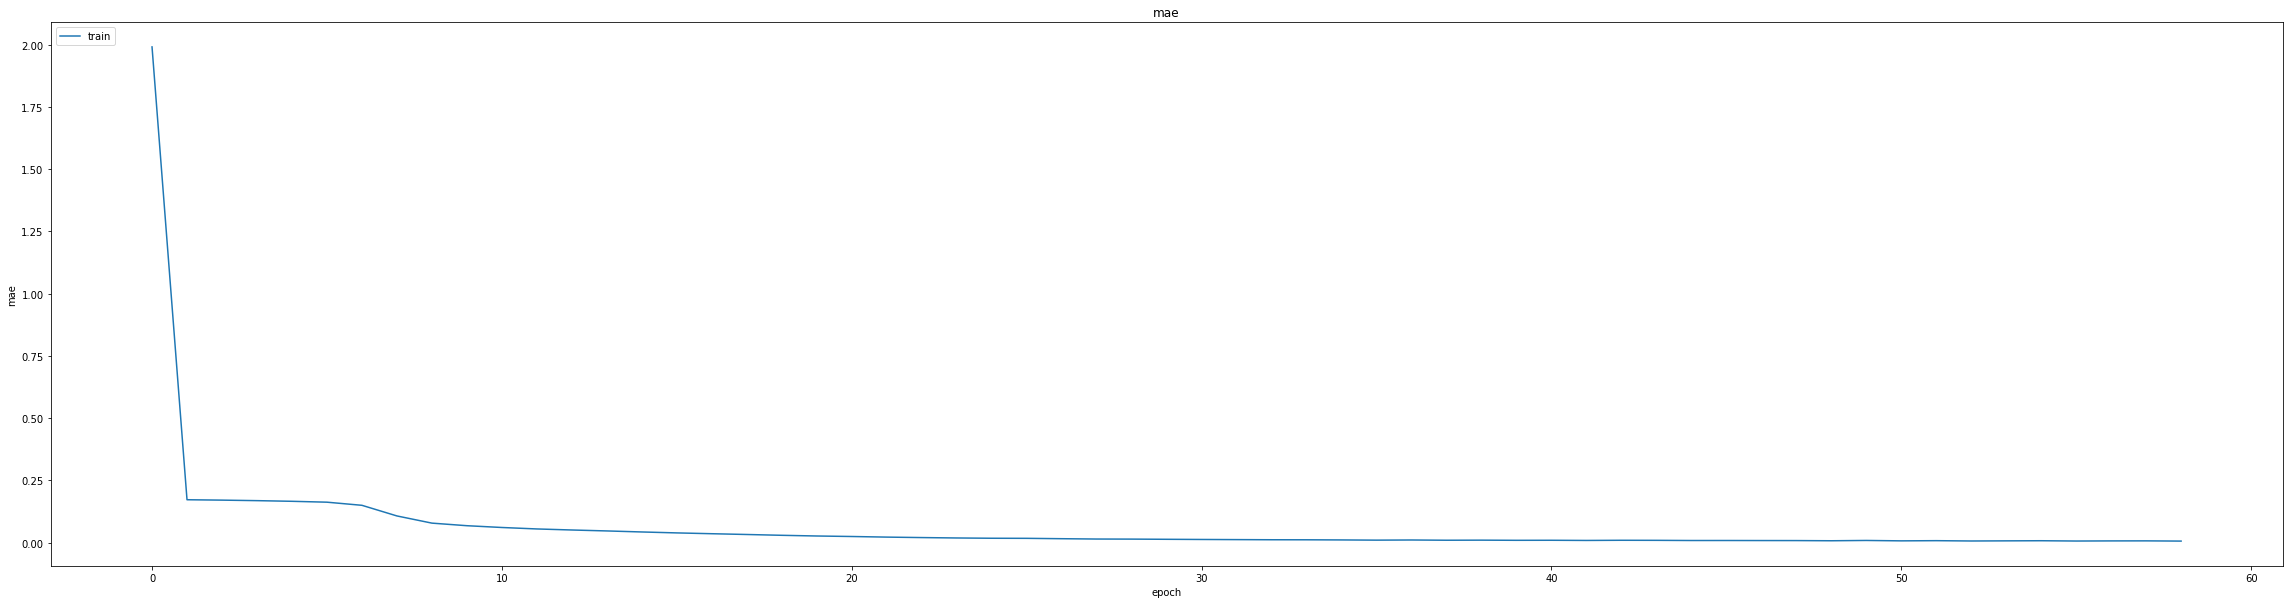

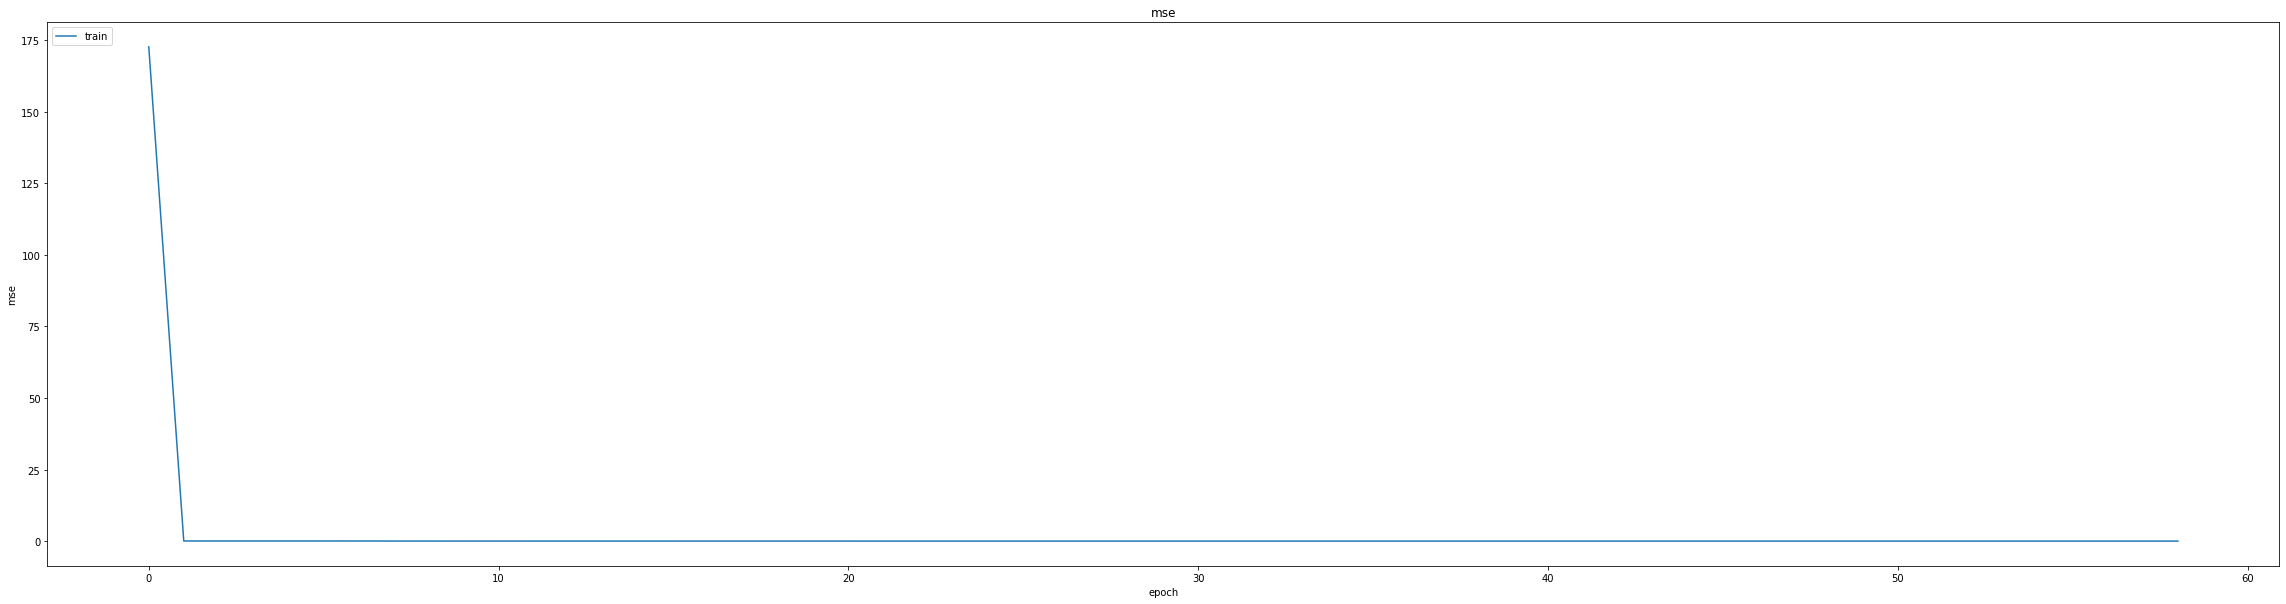

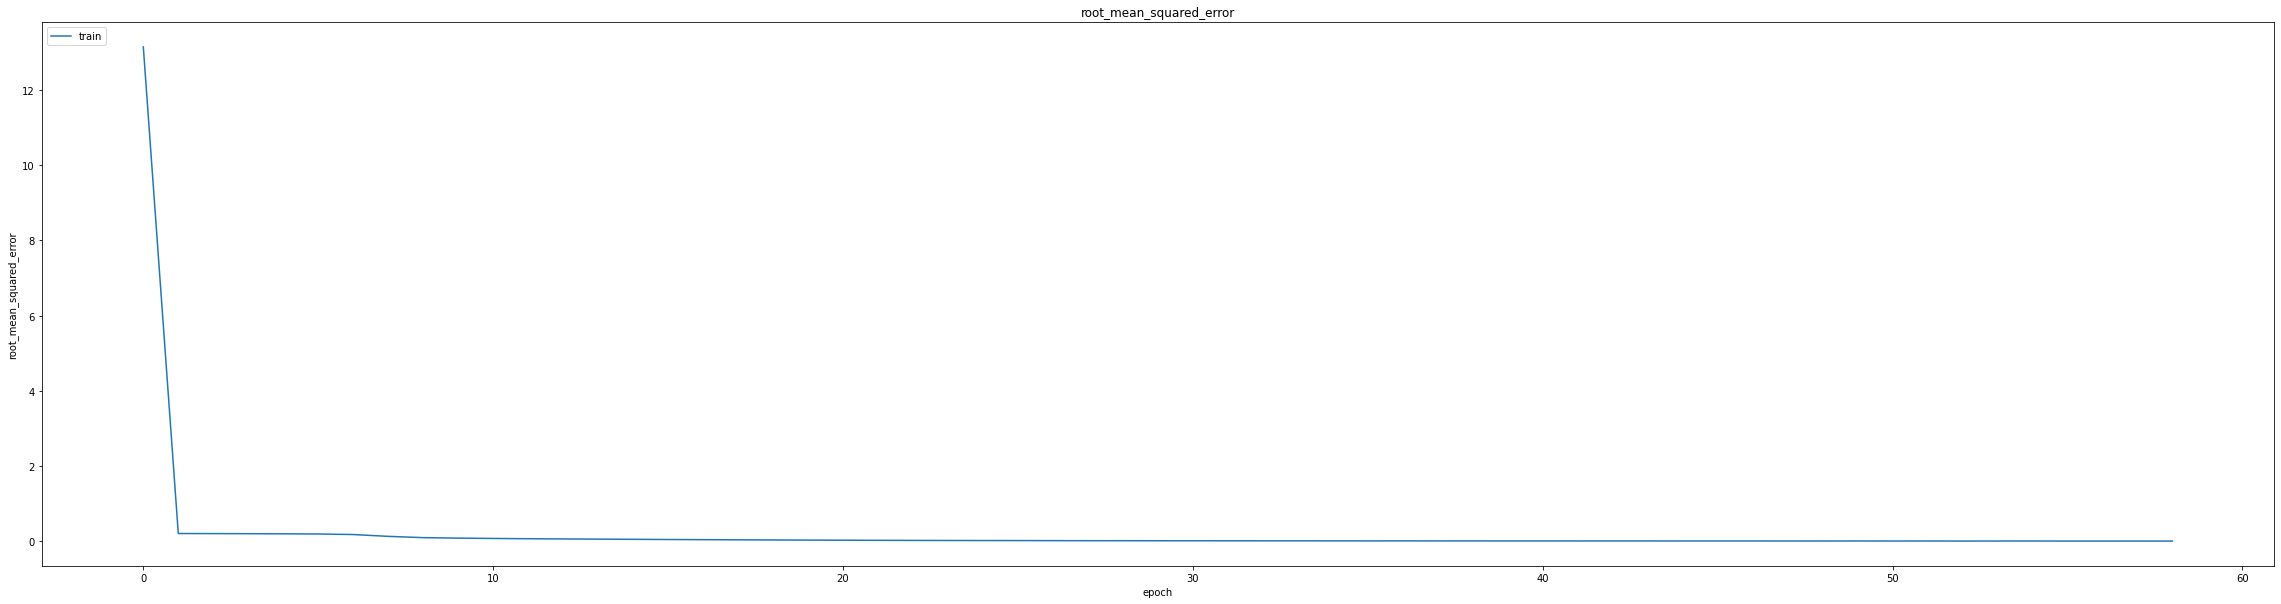

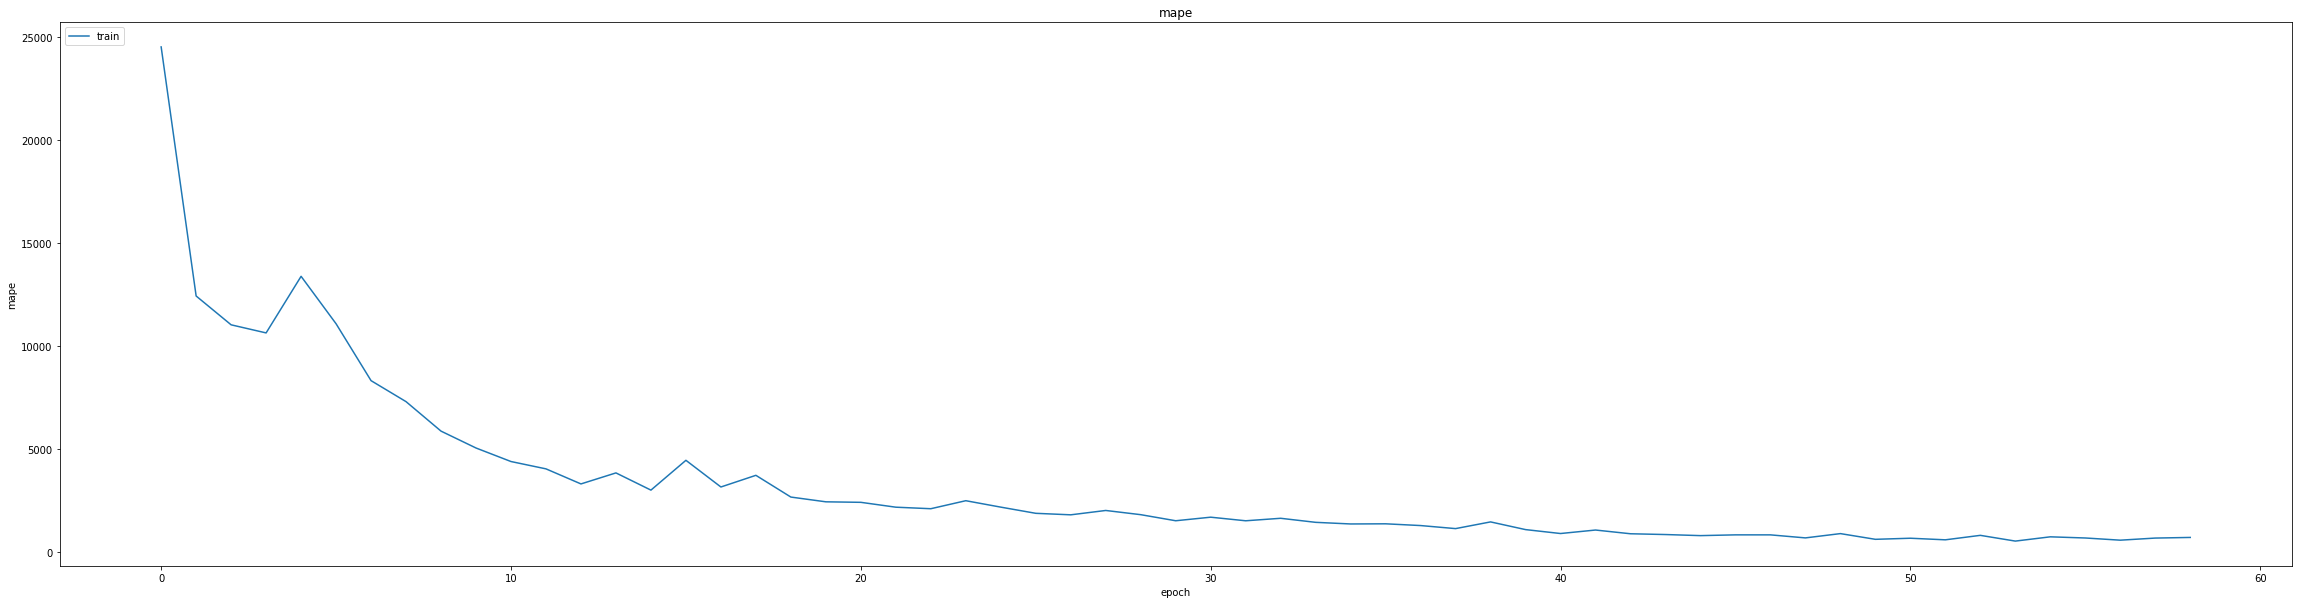

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.016420723870396614
0.023160651326179504
234/234 [==============================] - 18s 63ms/step
0.9825343408257861


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 0.0024 - mae: 0.0239 - mse: 0.0024 - root_mean_squared_error: 0.0495 - mape: 1299.7388
Epoch 1: val_mse did not improve from 0.00054
464/464 [==============================] - 163s 325ms/step - loss: 0.0024 - mae: 0.0239 - mse: 0.0024 - root_mean_squared_error: 0.0495 - mape: 1299.7388 - val_loss: 7.3906e-04 - val_mae: 0.0198 - val_mse: 7.3906e-04 - val_root_mean_squared_error: 0.0272 - val_mape: 15918.7646 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 2.7285e-04 - mae: 0.0130 - mse: 2.7285e-04 - root_mean_squared_error: 0.0165 - mape: 1539.9309
Epoch 2: val_mse improved from 0.00054 to 0.00053, saving model to /content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM


464/464 [==============================] - 190s 410ms/step - loss: 2.7285e-04 - mae: 0.0130 - mse: 2.7285e-04 - root_mean_squared_error: 0.0165 - mape: 1539.9309 - val_loss: 5.3147e-04 - val_mae: 0.0167 - val_mse: 5.3147e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 12922.4873 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
464/464 [==============================] - ETA: 0s - loss: 1.8668e-04 - mae: 0.0108 - mse: 1.8668e-04 - root_mean_squared_error: 0.0137 - mape: 1031.2321
Epoch 3: val_mse did not improve from 0.00053
464/464 [==============================] - 147s 317ms/step - loss: 1.8668e-04 - mae: 0.0108 - mse: 1.8668e-04 - root_mean_squared_error: 0.0137 - mape: 1031.2321 - val_loss: 5.7040e-04 - val_mae: 0.0192 - val_mse: 5.7040e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 9579.8184 - lr: 9.0000e-04
Epoch 4/25
464/464 [==============================] - ETA: 0s - loss: 1.7230e-04 - mae: 0.0103 - mse: 1.7230e-04 - root_mean_squared_error: 0.0131 - map

464/464 [==============================] - 184s 398ms/step - loss: 1.7230e-04 - mae: 0.0103 - mse: 1.7230e-04 - root_mean_squared_error: 0.0131 - mape: 963.6035 - val_loss: 3.2350e-04 - val_mae: 0.0137 - val_mse: 3.2350e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 7969.0723 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
464/464 [==============================] - ETA: 0s - loss: 1.3126e-04 - mae: 0.0090 - mse: 1.3126e-04 - root_mean_squared_error: 0.0115 - mape: 859.9901
Epoch 5: val_mse did not improve from 0.00032
464/464 [==============================] - 146s 314ms/step - loss: 1.3126e-04 - mae: 0.0090 - mse: 1.3126e-04 - root_mean_squared_error: 0.0115 - mape: 859.9901 - val_loss: 0.0012 - val_mae: 0.0313 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0345 - val_mape: 6915.0259 - lr: 8.1000e-04
Epoch 6/25
464/464 [==============================] - ETA: 0s - loss: 1.2216e-04 - mae: 0.0088 - mse: 1.2216e-04 - root_mean_squared_error: 0.0111 - mape: 754.1

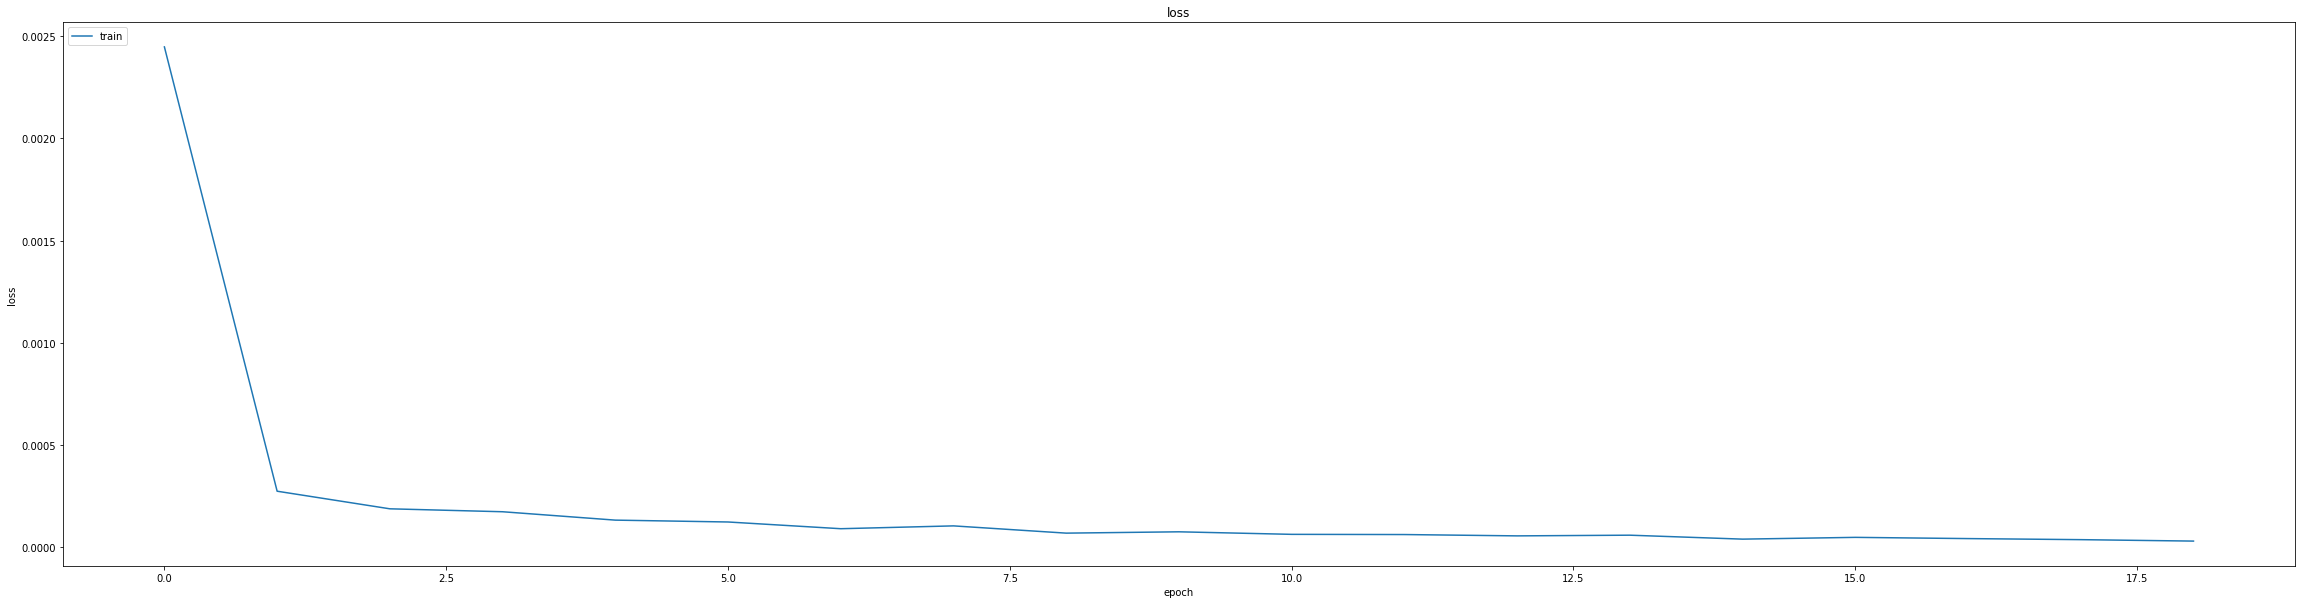

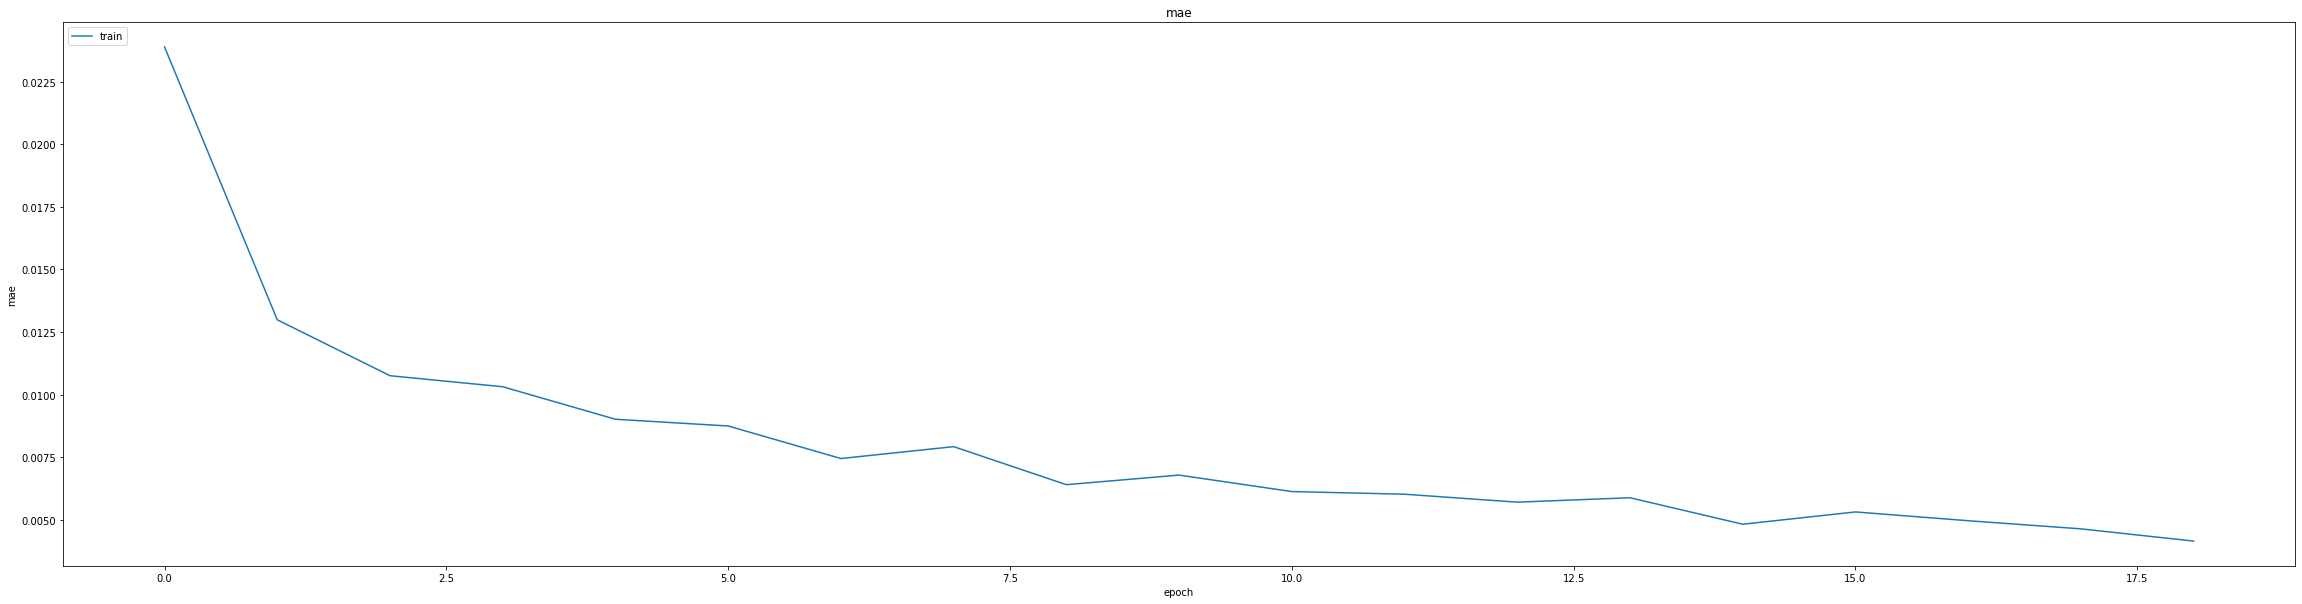

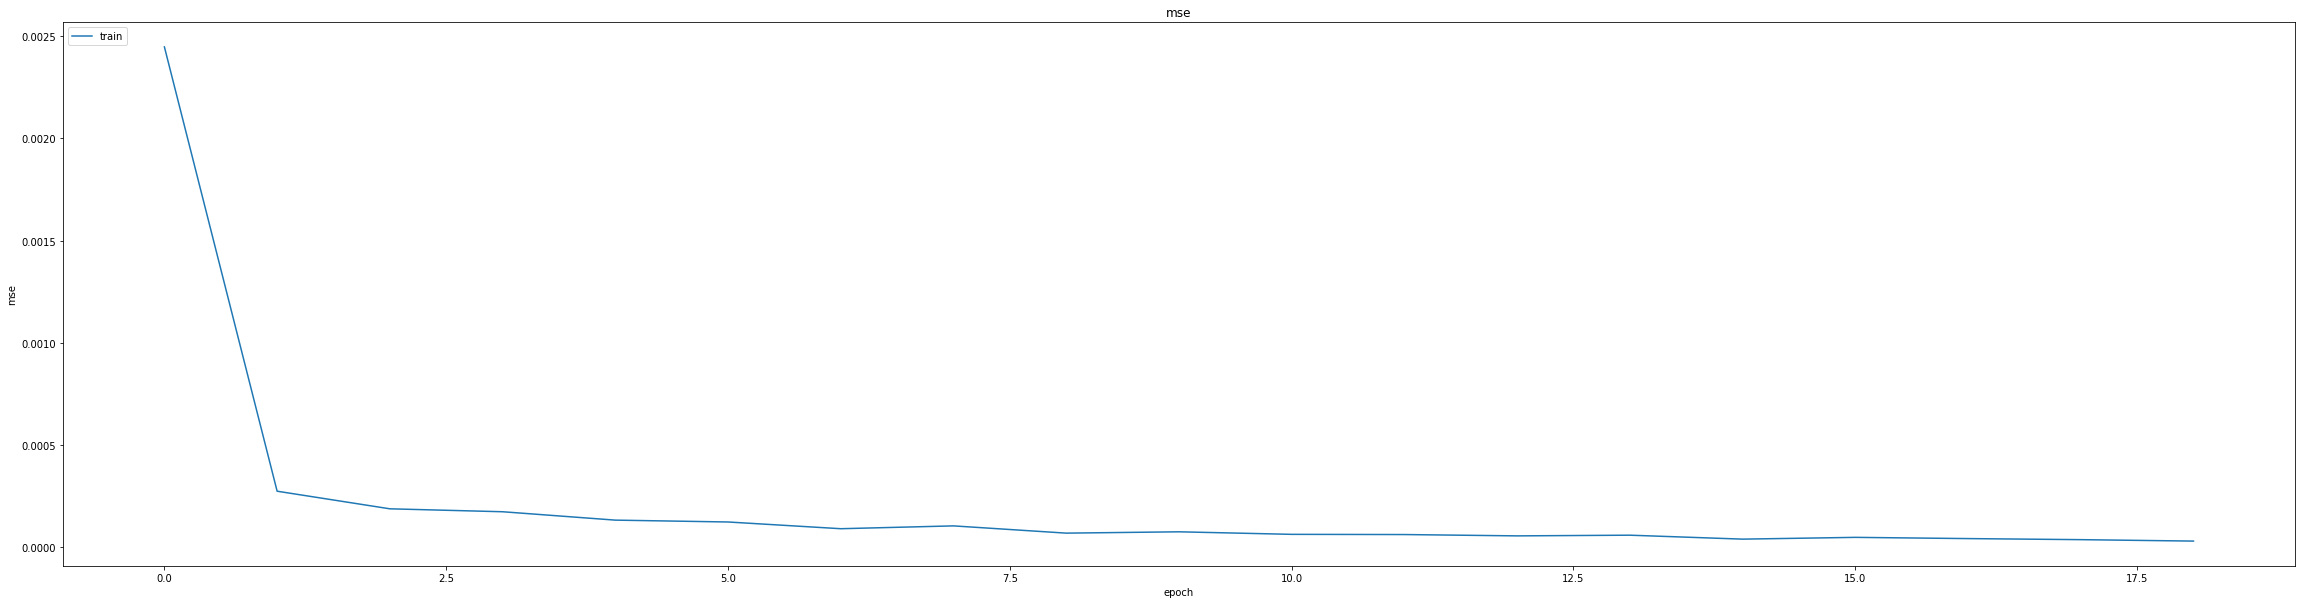

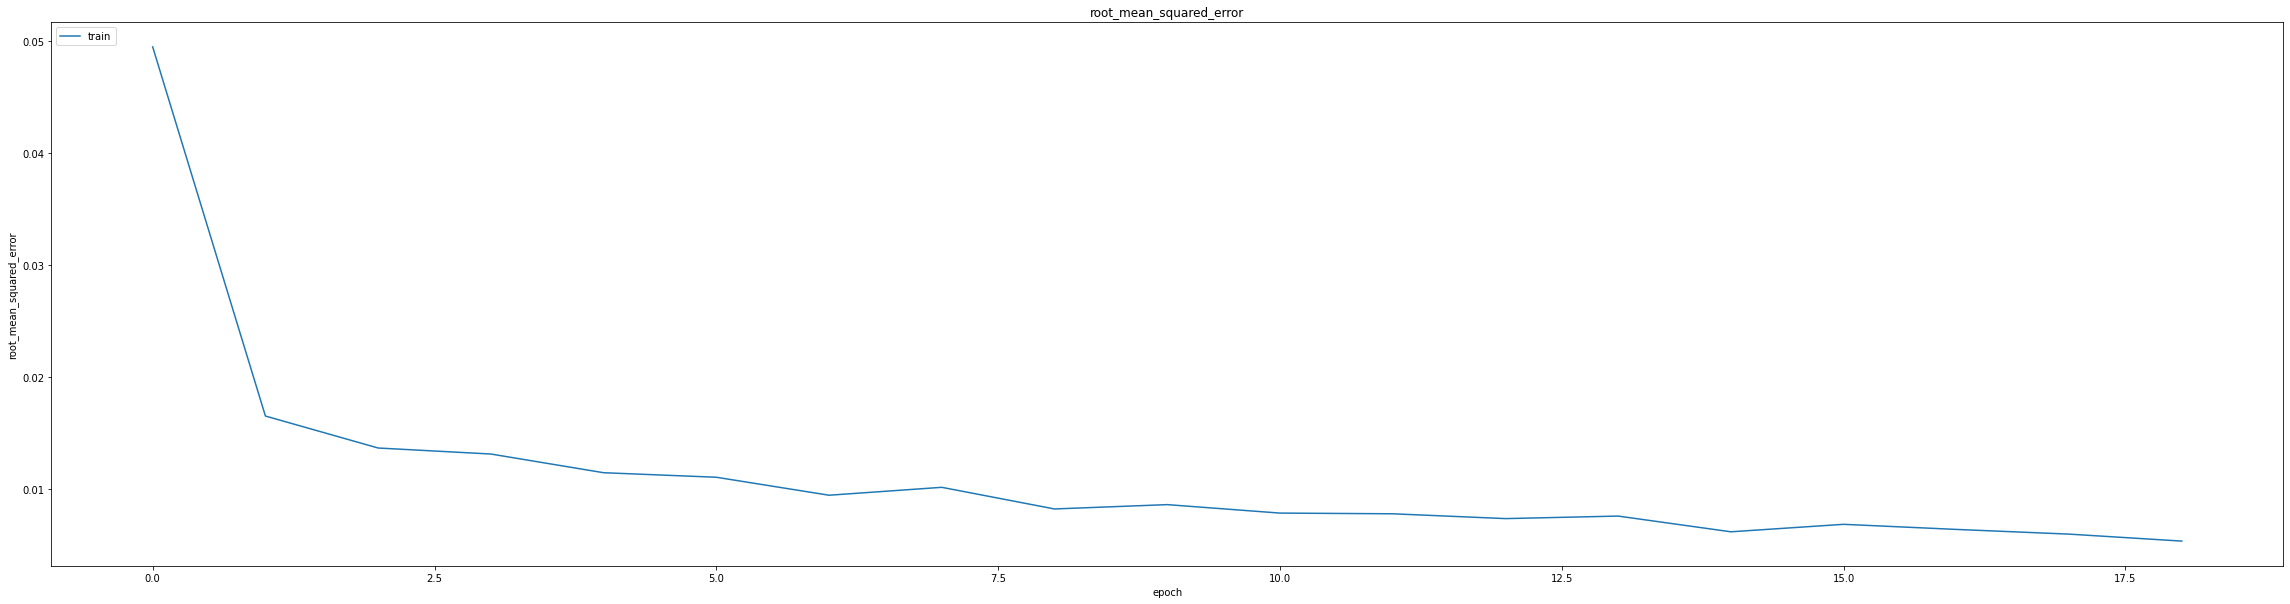

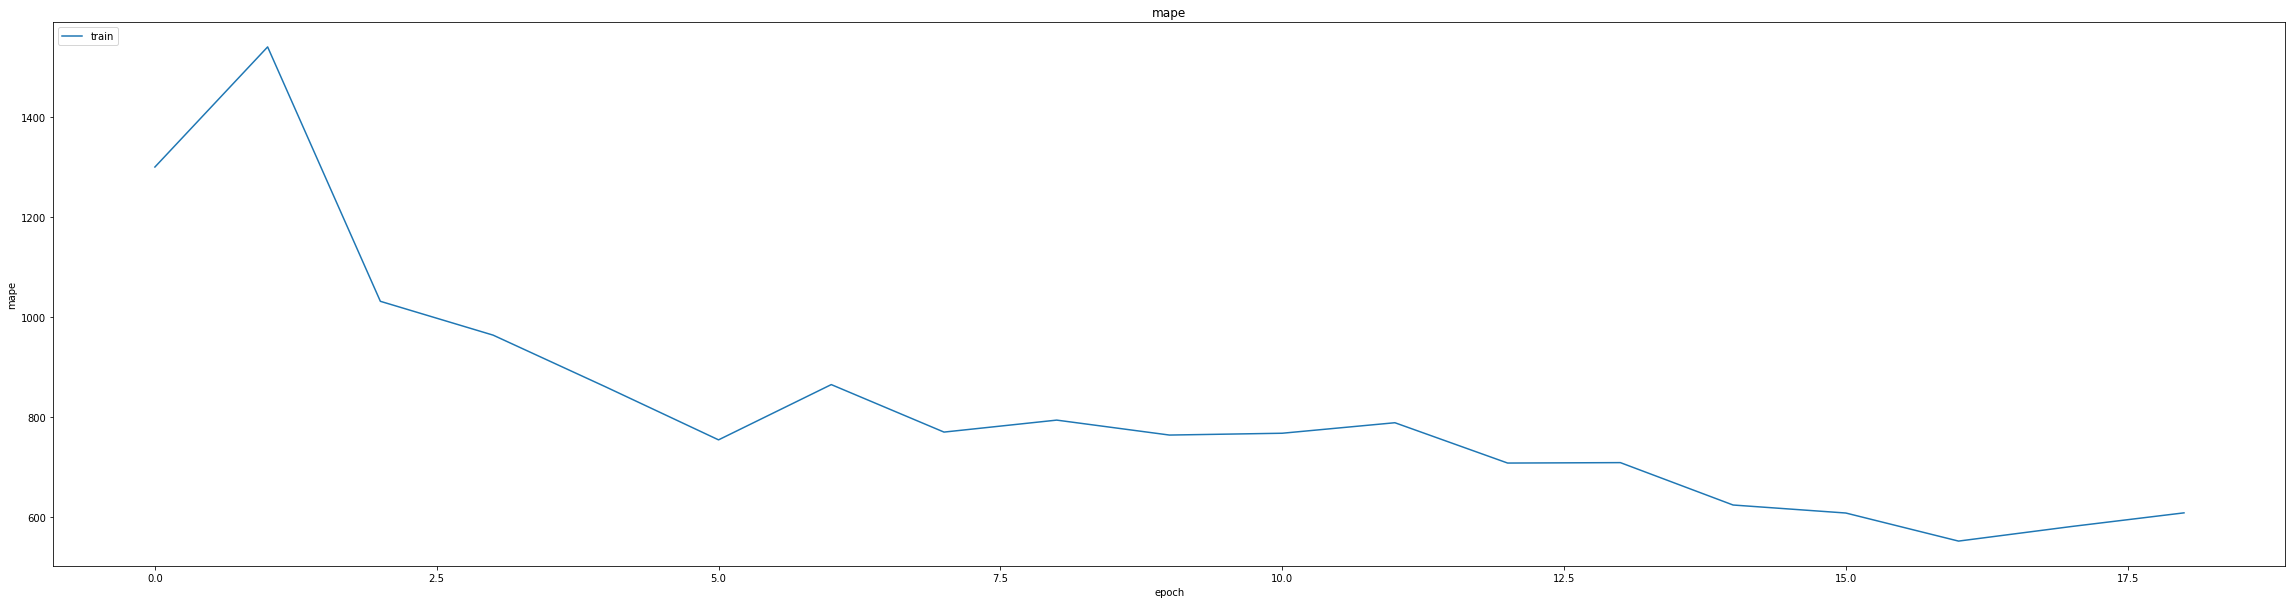

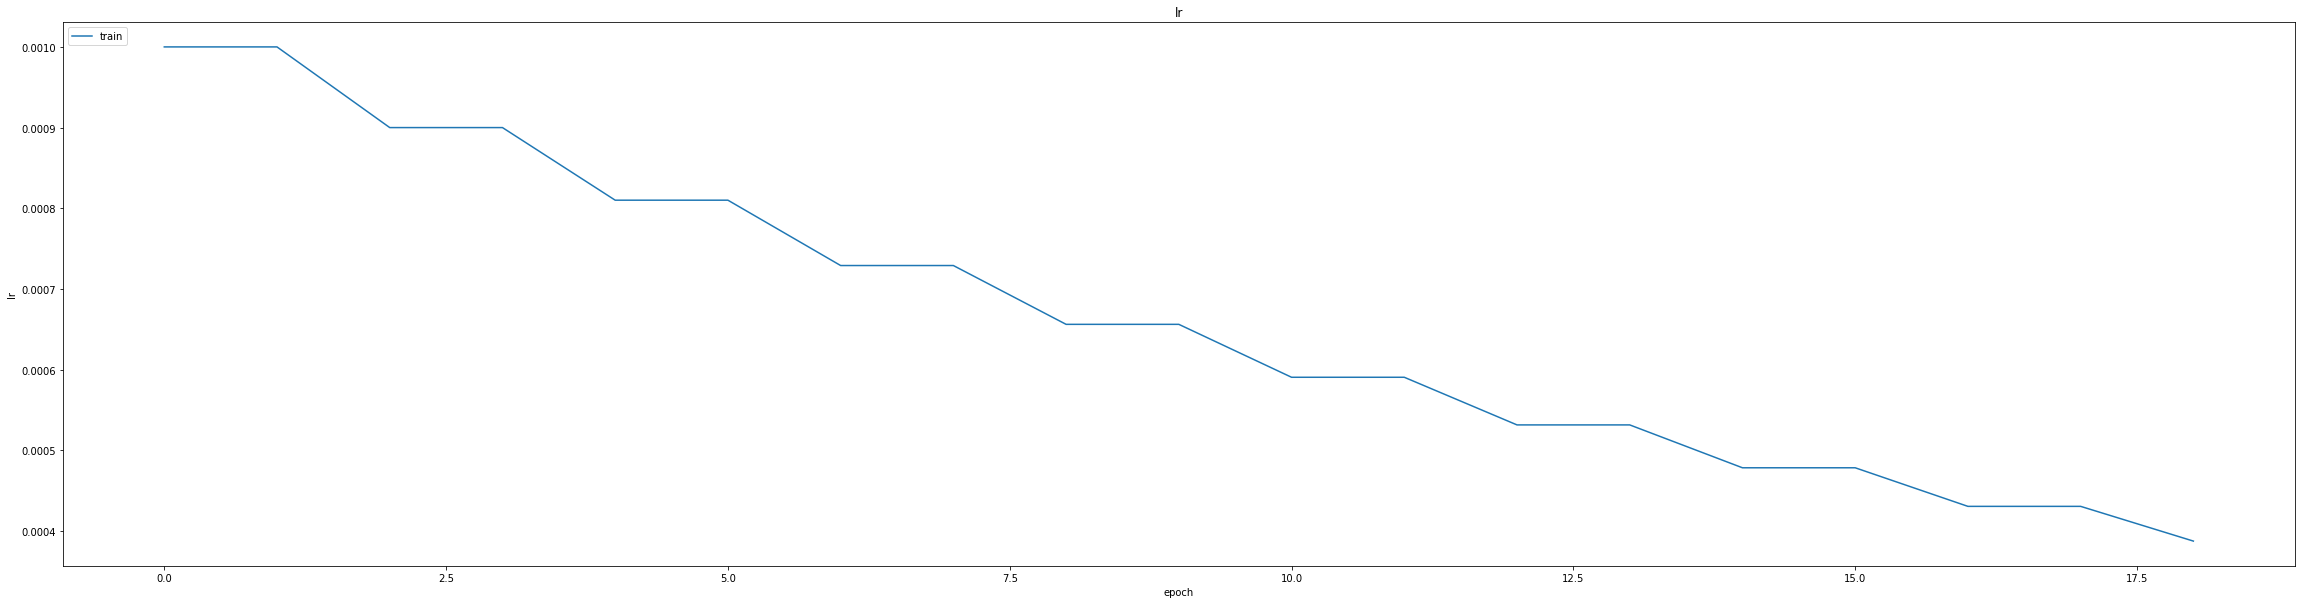

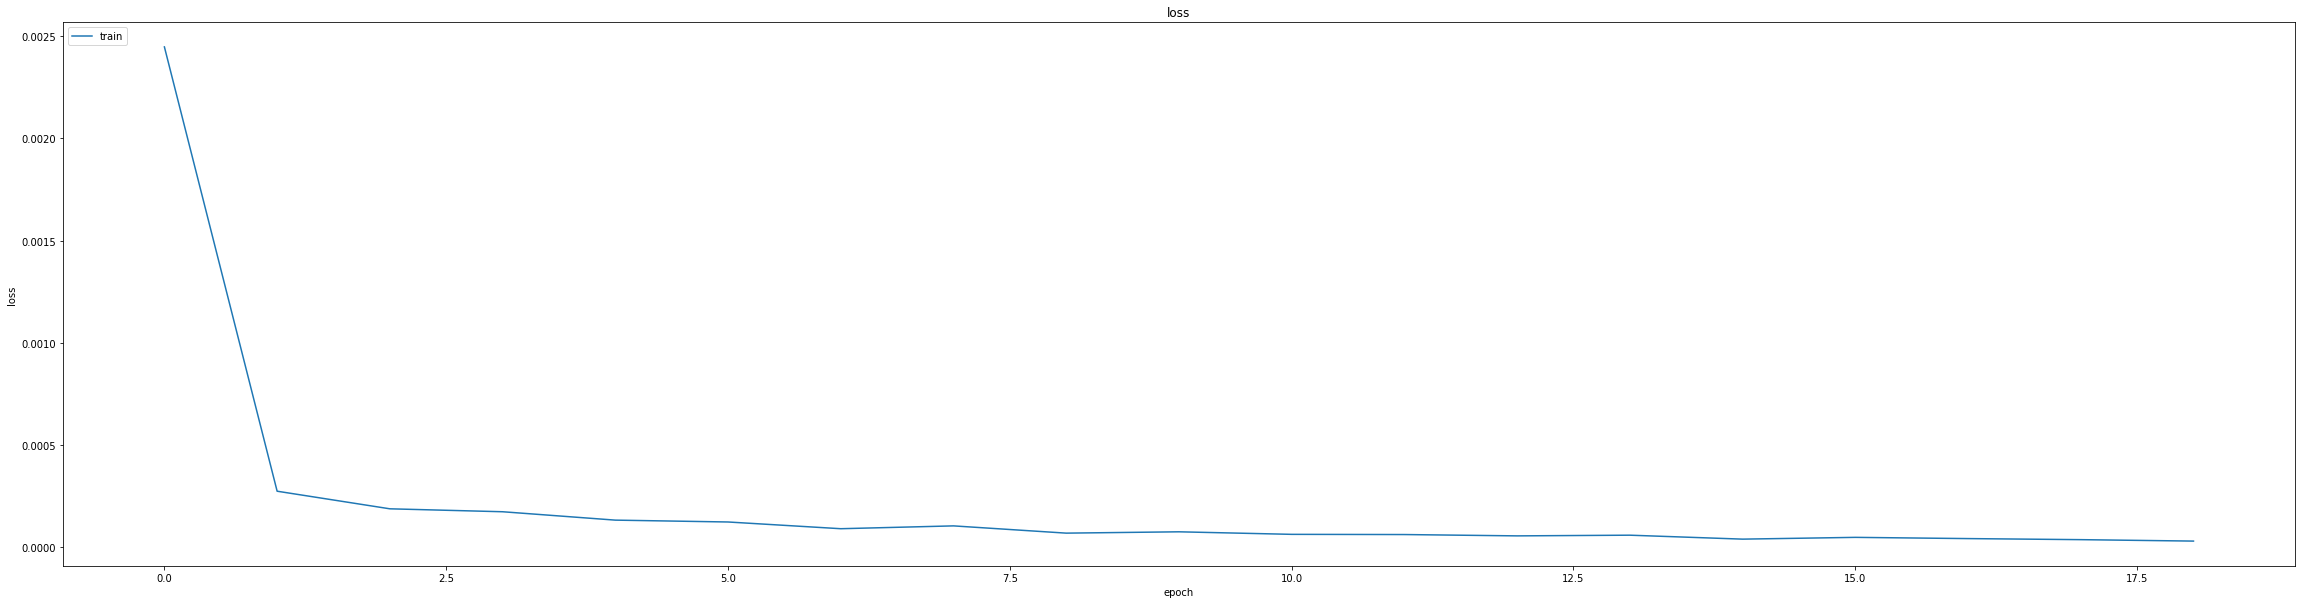

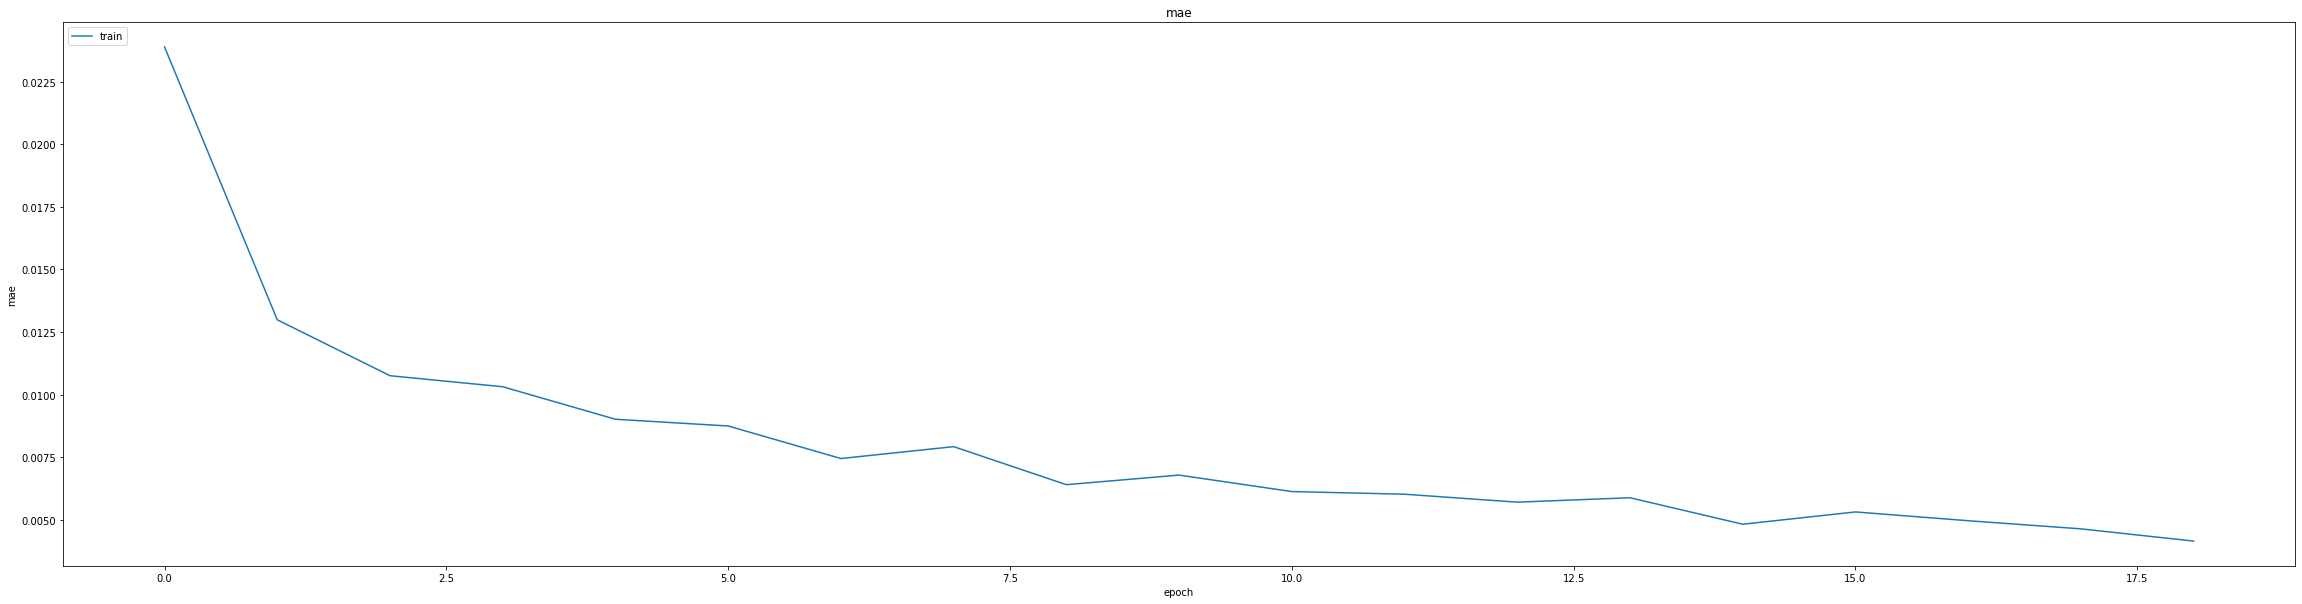

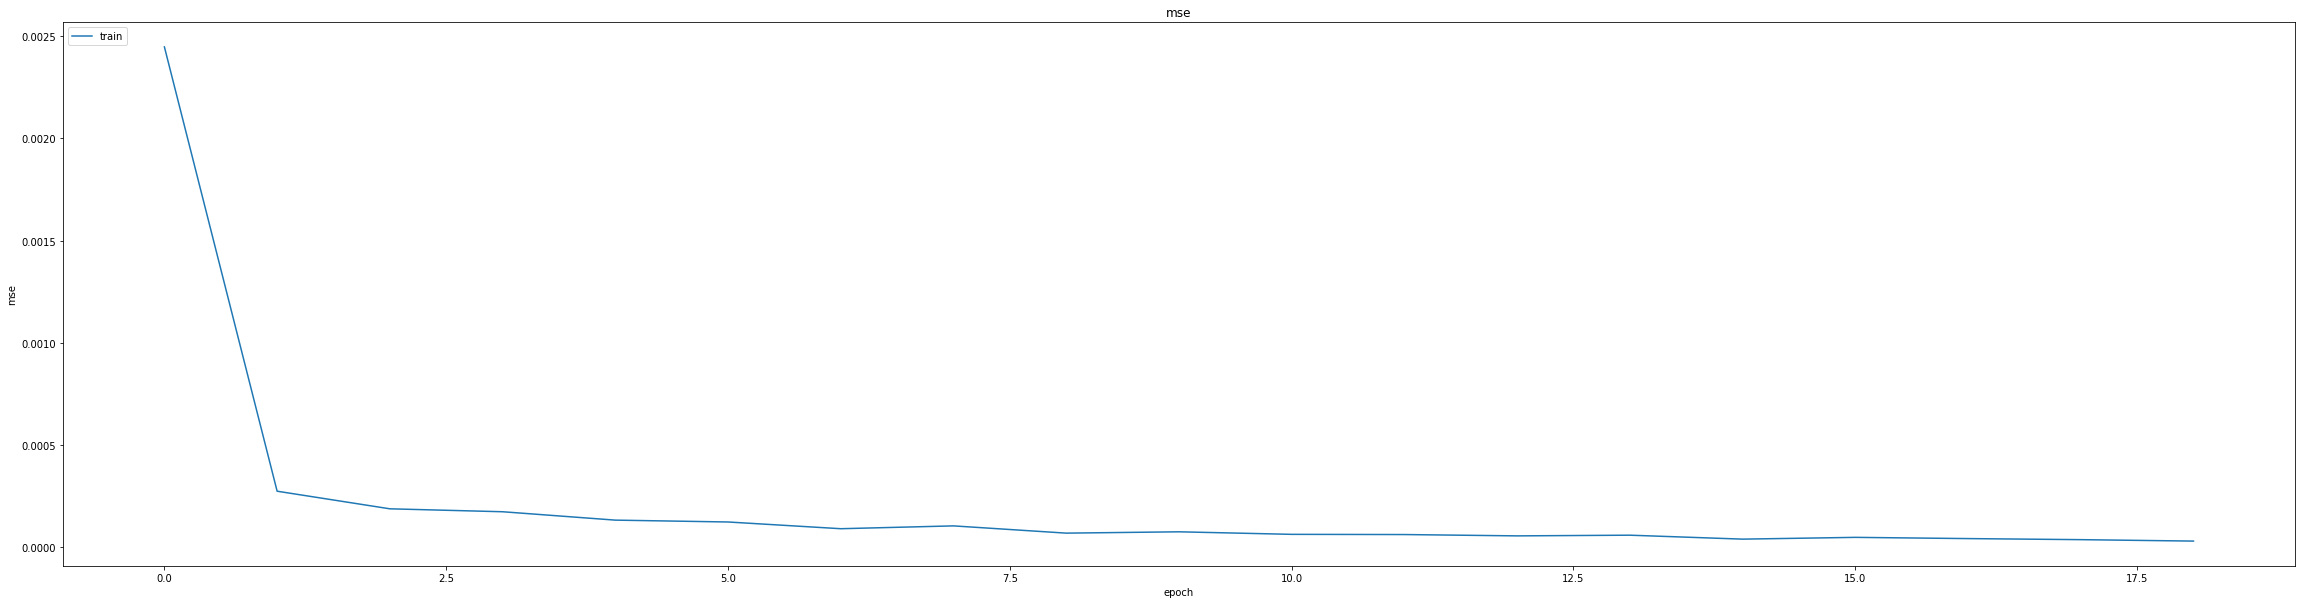

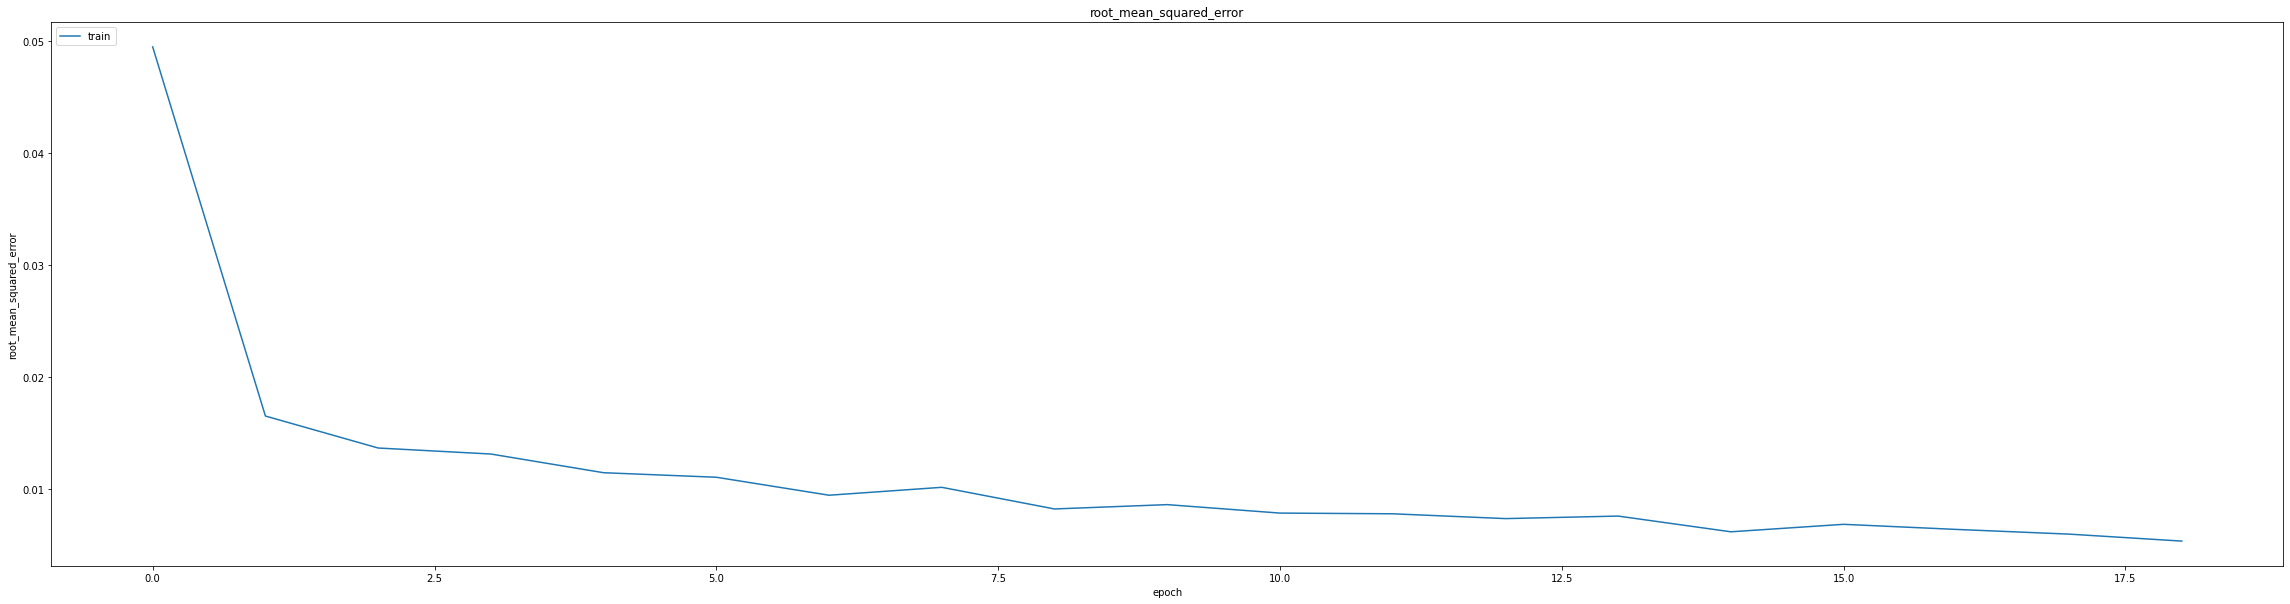

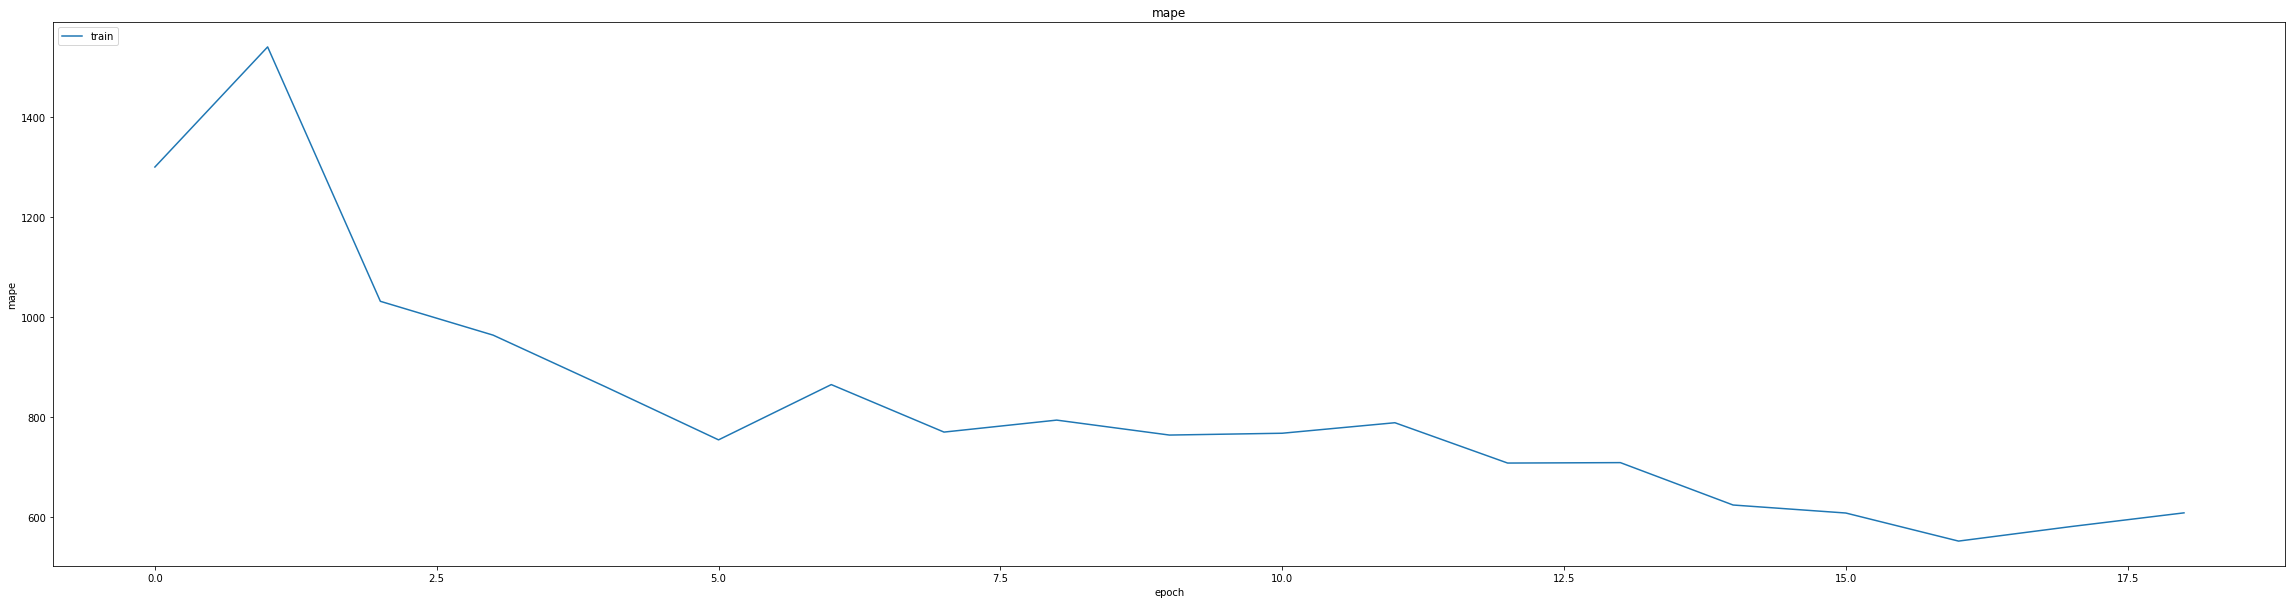

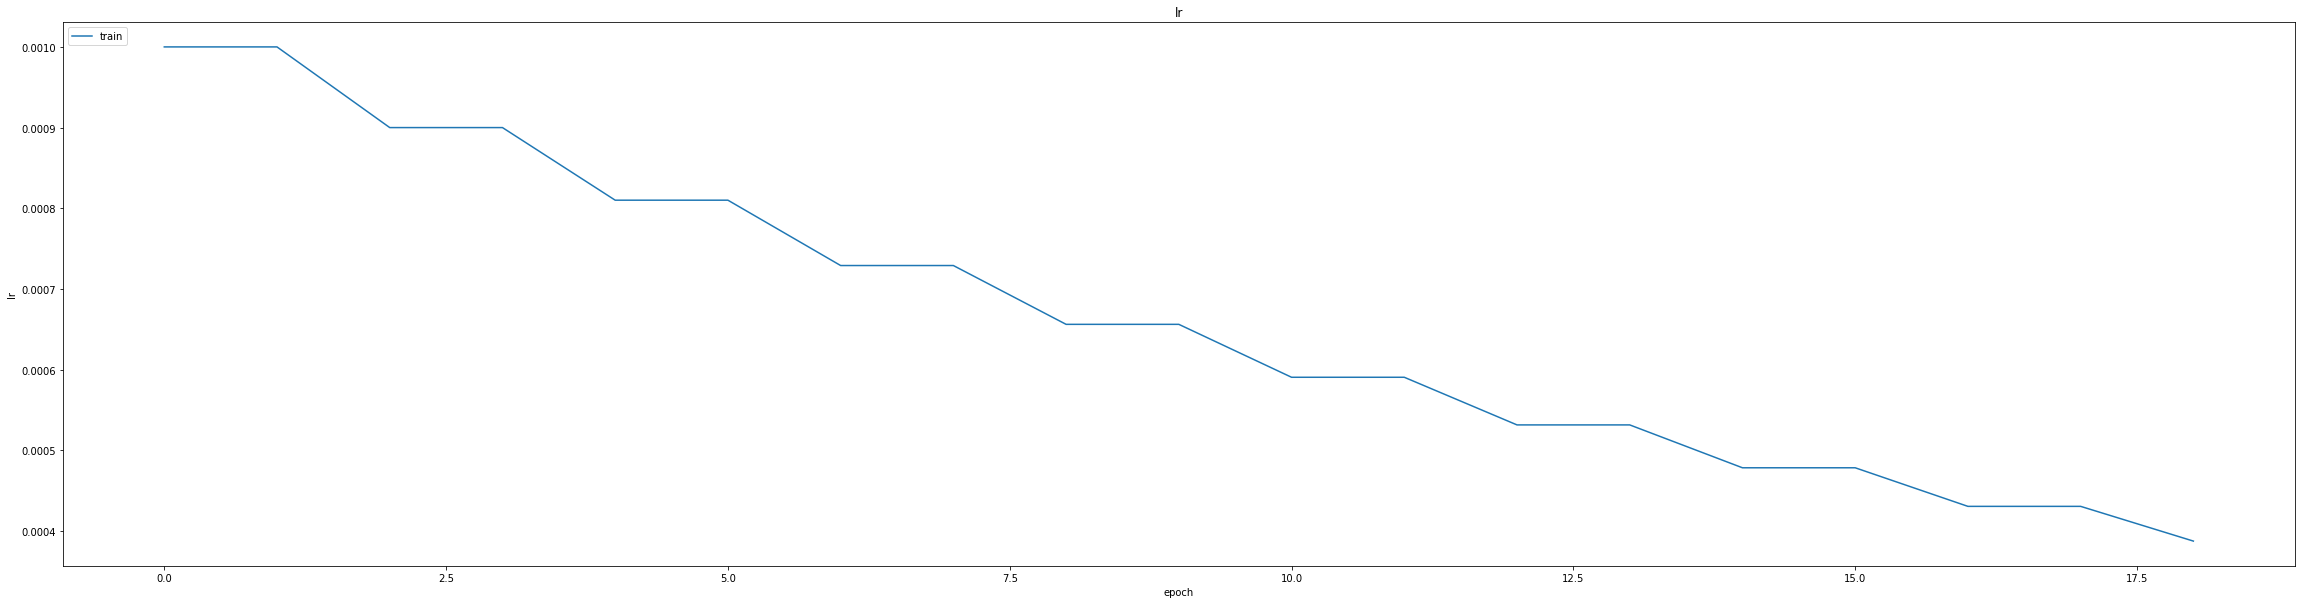

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.013653235509991646
0.017986061051487923
234/234 [==============================] - 13s 42ms/step
0.9840831515297609
0.013653235509991646
0.017986061051487923
234/234 [==============================] - 12s 52ms/step
0.9940754519326062


234/234 [==============================] - 10s 42ms/step


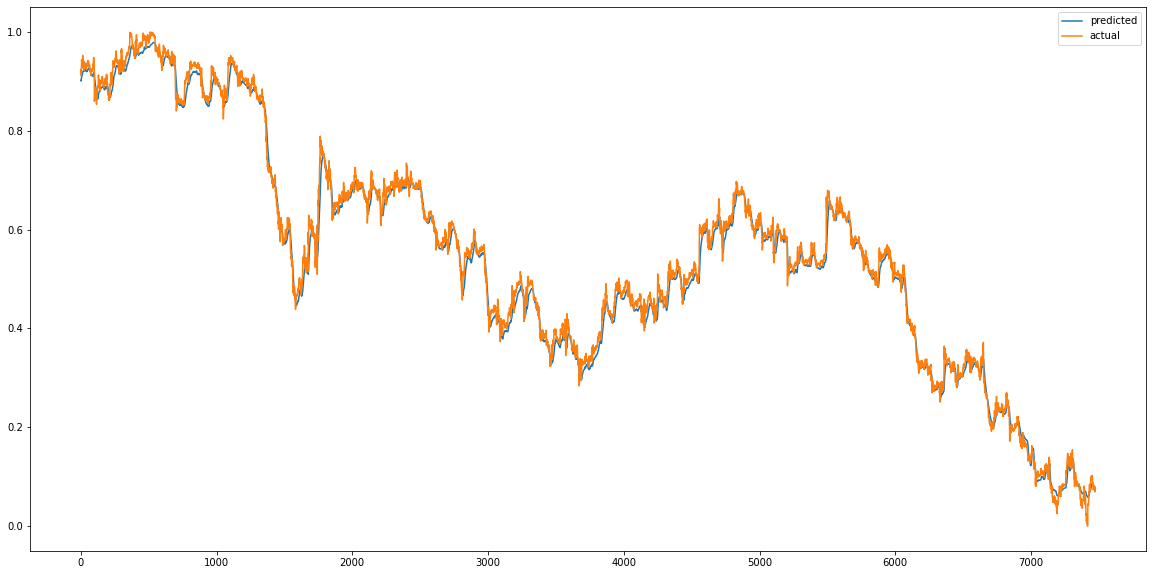

234/234 [==============================] - 12s 52ms/step


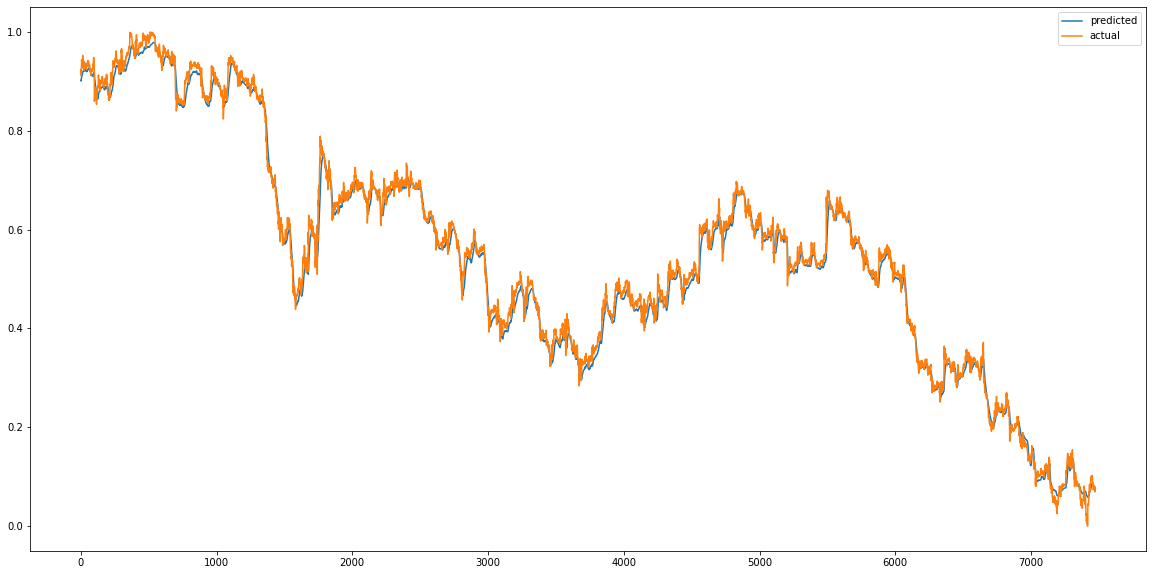

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/GBP_USD15_BiLSTM")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


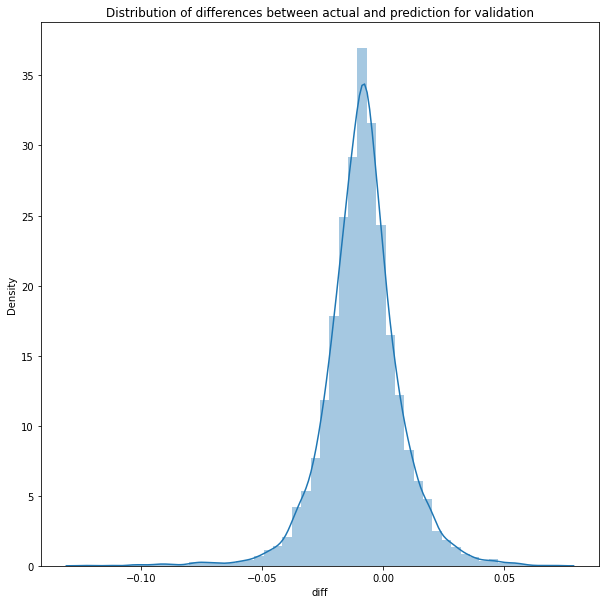

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


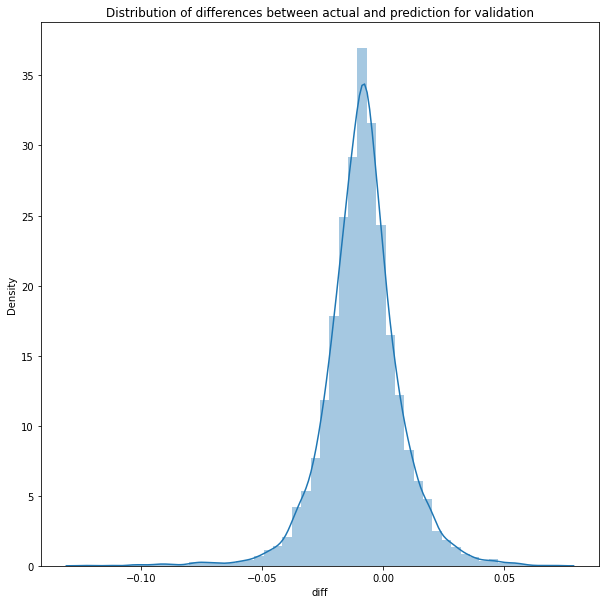

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 10s 43ms/step


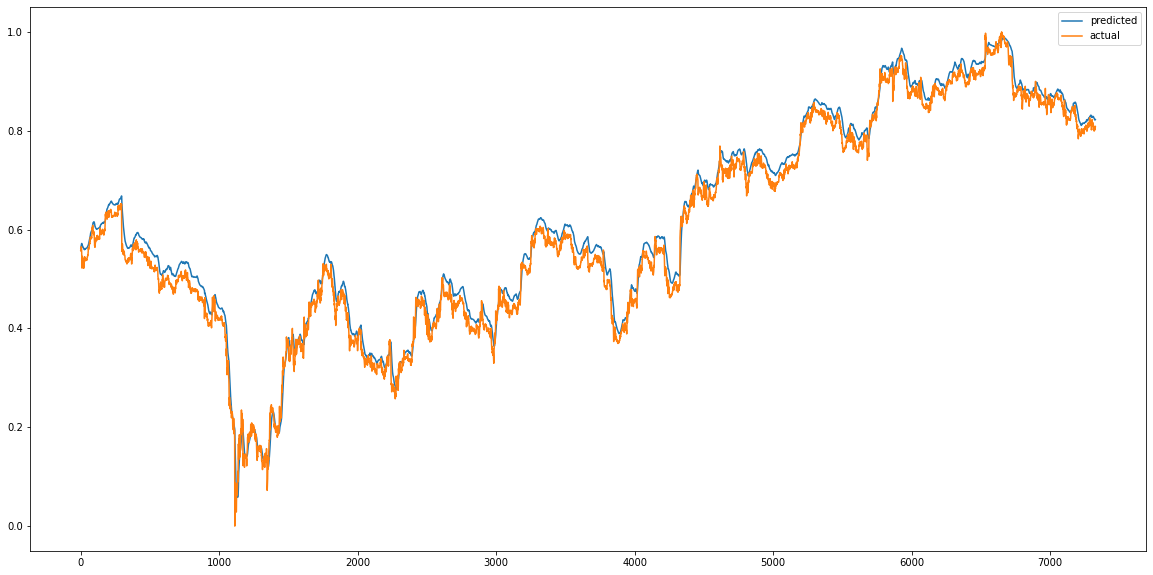

229/229 [==============================] - 10s 42ms/step


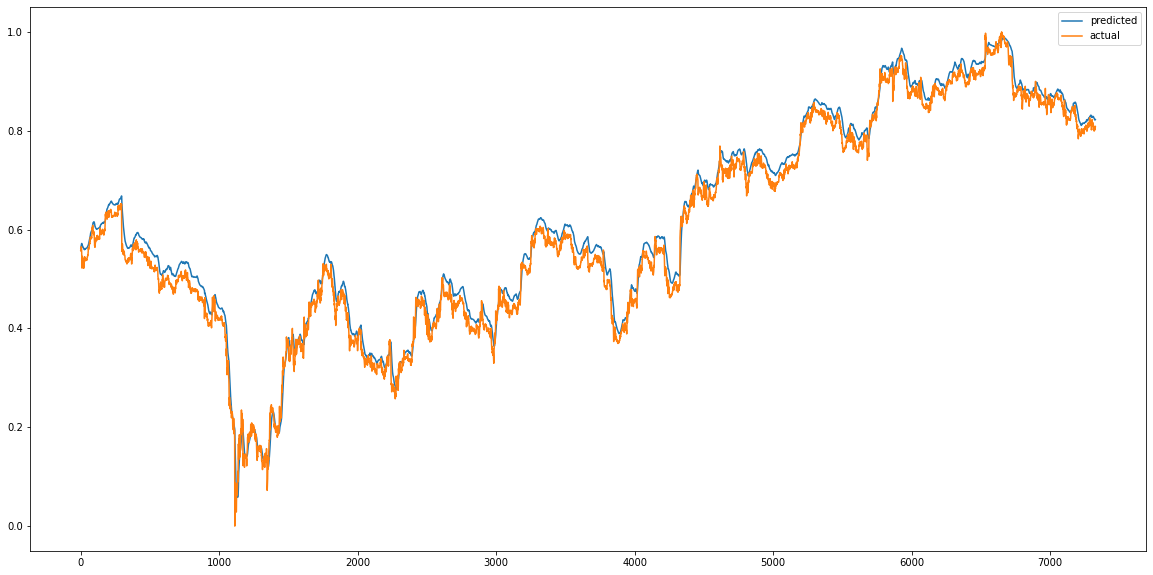

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


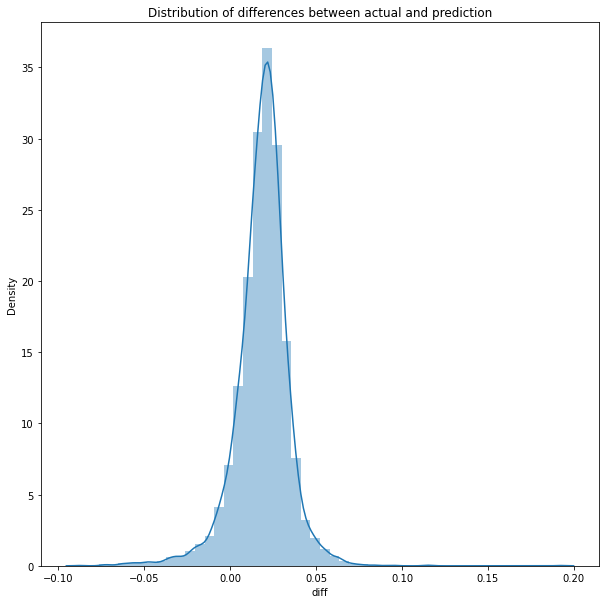

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


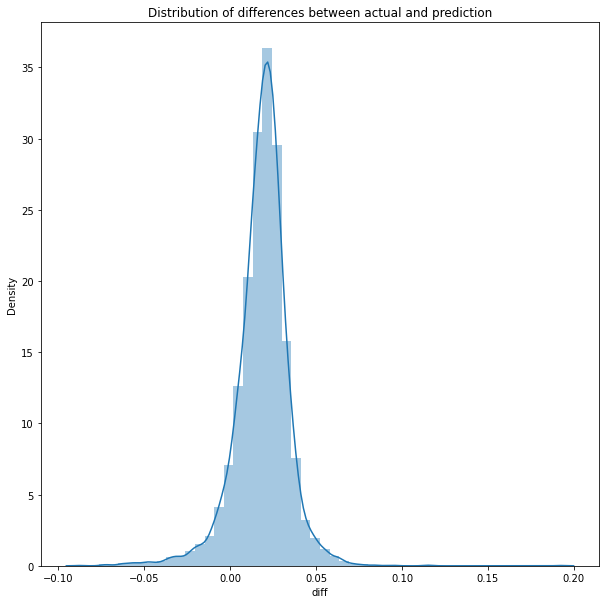

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0005841985989814969
MAE :  0.02097543685971446
RMSE  : 0.024170200640075308
229/229 [==============================] - 10s 43ms/step
R2_Score  : 0.9871789817689439


count    7327.000000
mean        0.018559
std         0.015485
min        -0.087612
25%         0.011624
50%         0.019812
75%         0.026959
max         0.192028
Name: diff, dtype: float64

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 256)           275456    
                                                                 
 lstm_1 (LSTM)               (None, 24, 64)            82176     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 412.9665 - mae: 5.8791 - mse: 412.9665 - root_mean_squared_error: 20.3216 - mape: 28716.9863
Epoch 1: val_mse improved from inf to 0.47593, saving model to weights.best.hdf5
464/464 [==============================] - 132s 270ms/step - loss: 412.9665 - mae: 5.8791 - mse: 412.9665 - root_mean_squared_error: 20.3216 - mape: 28716.9863 - val_loss: 0.4759 - val_mae: 0.6490 - val_mse: 0.4759 - val_root_mean_squared_error: 0.6899 - val_mape: 161387.0781
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.1635 - mae: 0.3318 - mse: 0.1635 - root_mean_squared_error: 0.4044 - mape: 18144.5664
Epoch 2: val_mse improved from 0.47593 to 0.10159, saving model to weights.best.hdf5
464/464 [==============================] - 124s 268ms/step - loss: 0.1635 - mae: 0.3318 - mse: 0.1635 - root_mean_squared_error: 0.4044 - mape: 18144.5664 - val_loss: 0.1016 - val_mae: 0.2708 - val_mse: 0.1016 - val_root_mean_squared_er

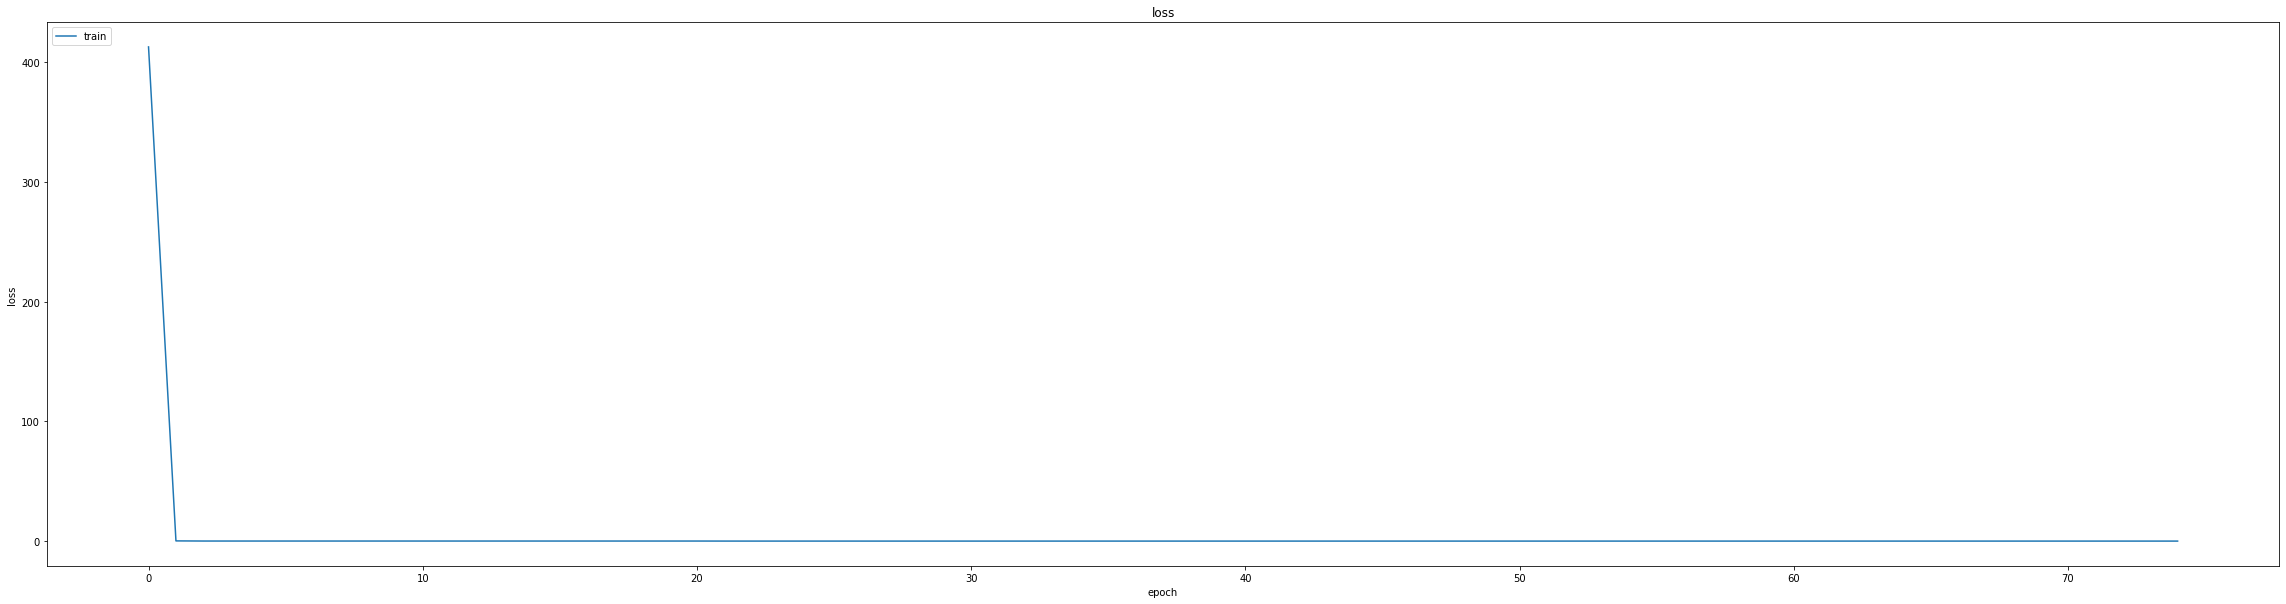

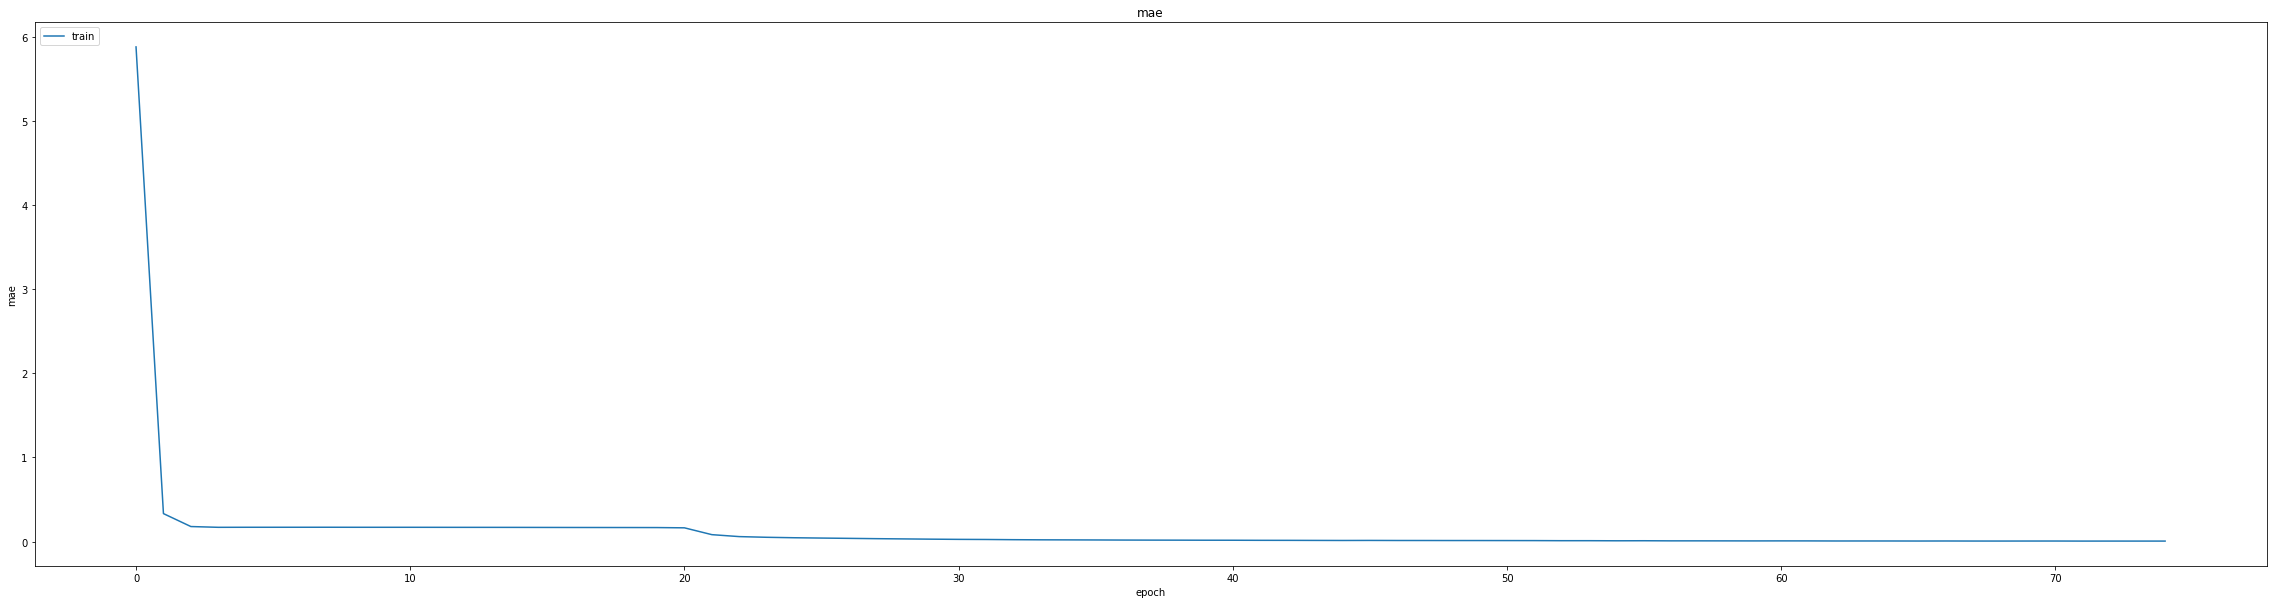

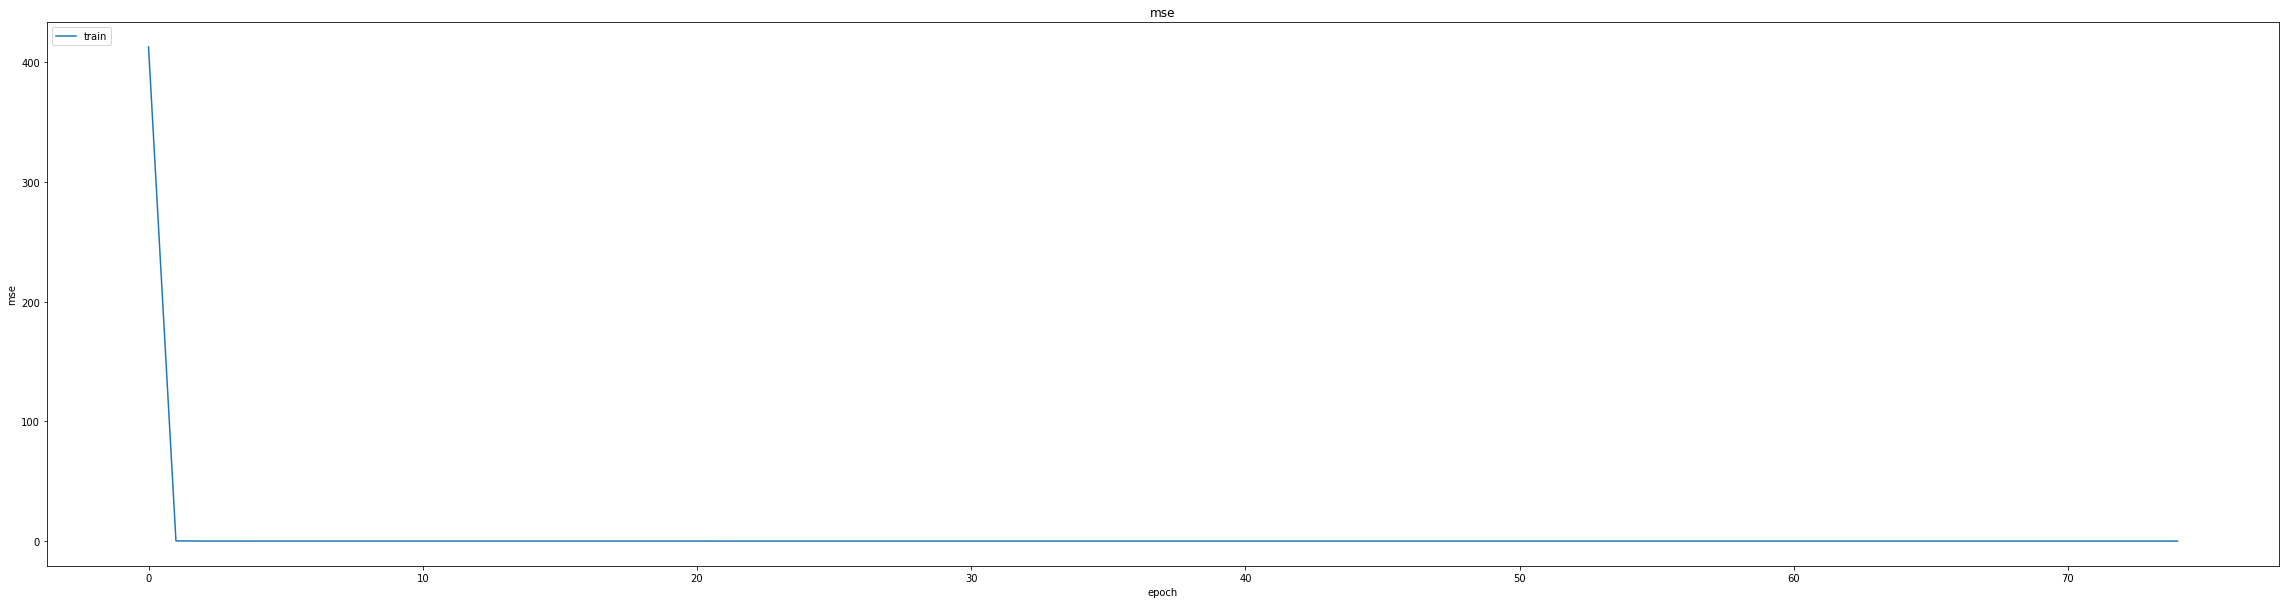

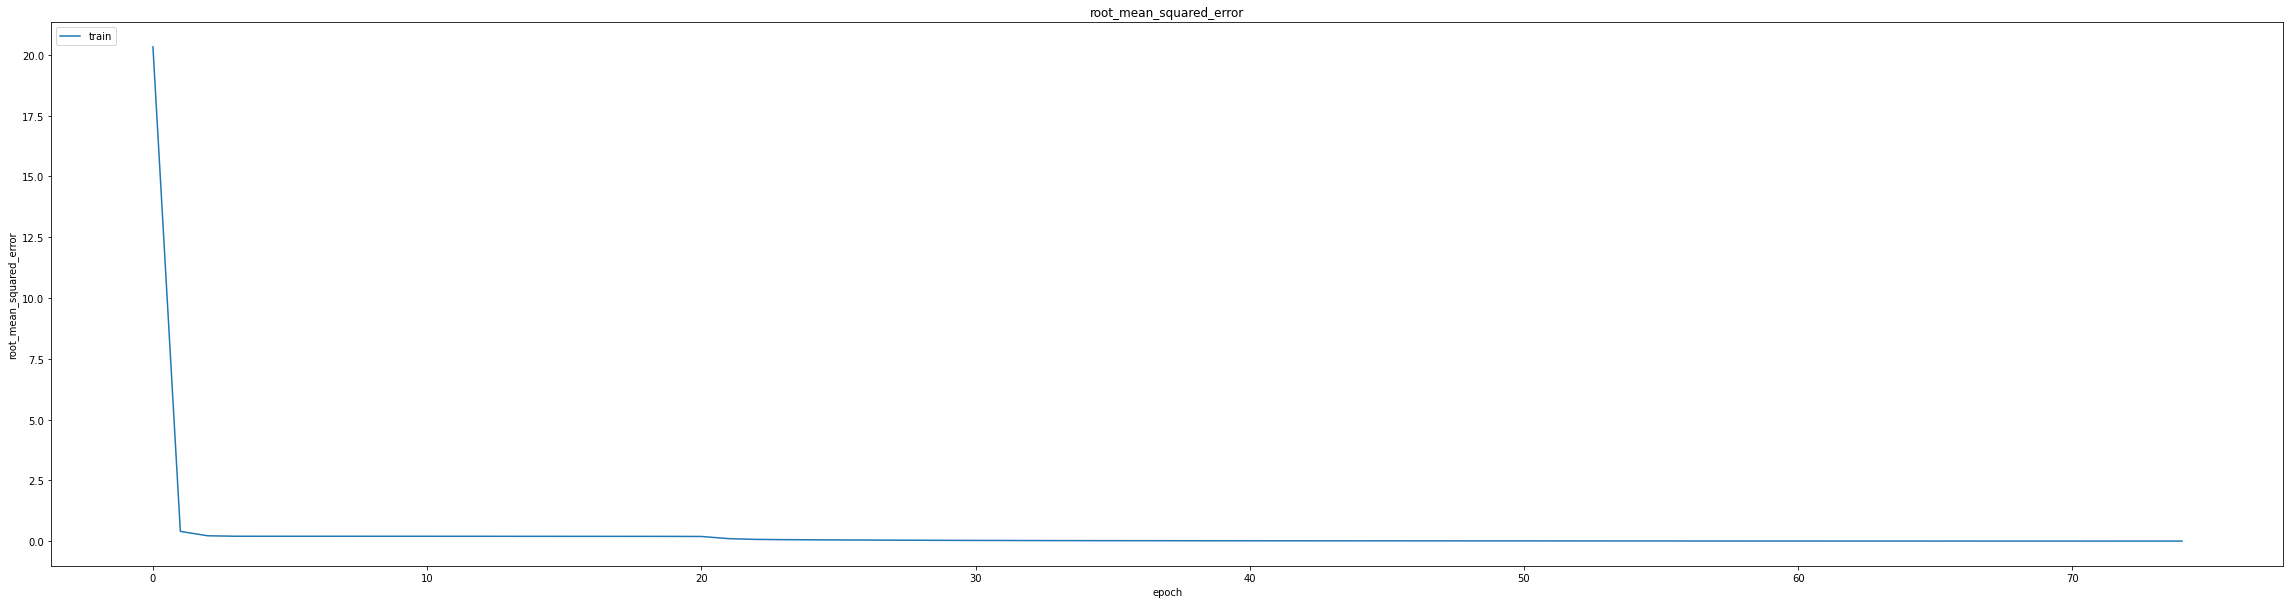

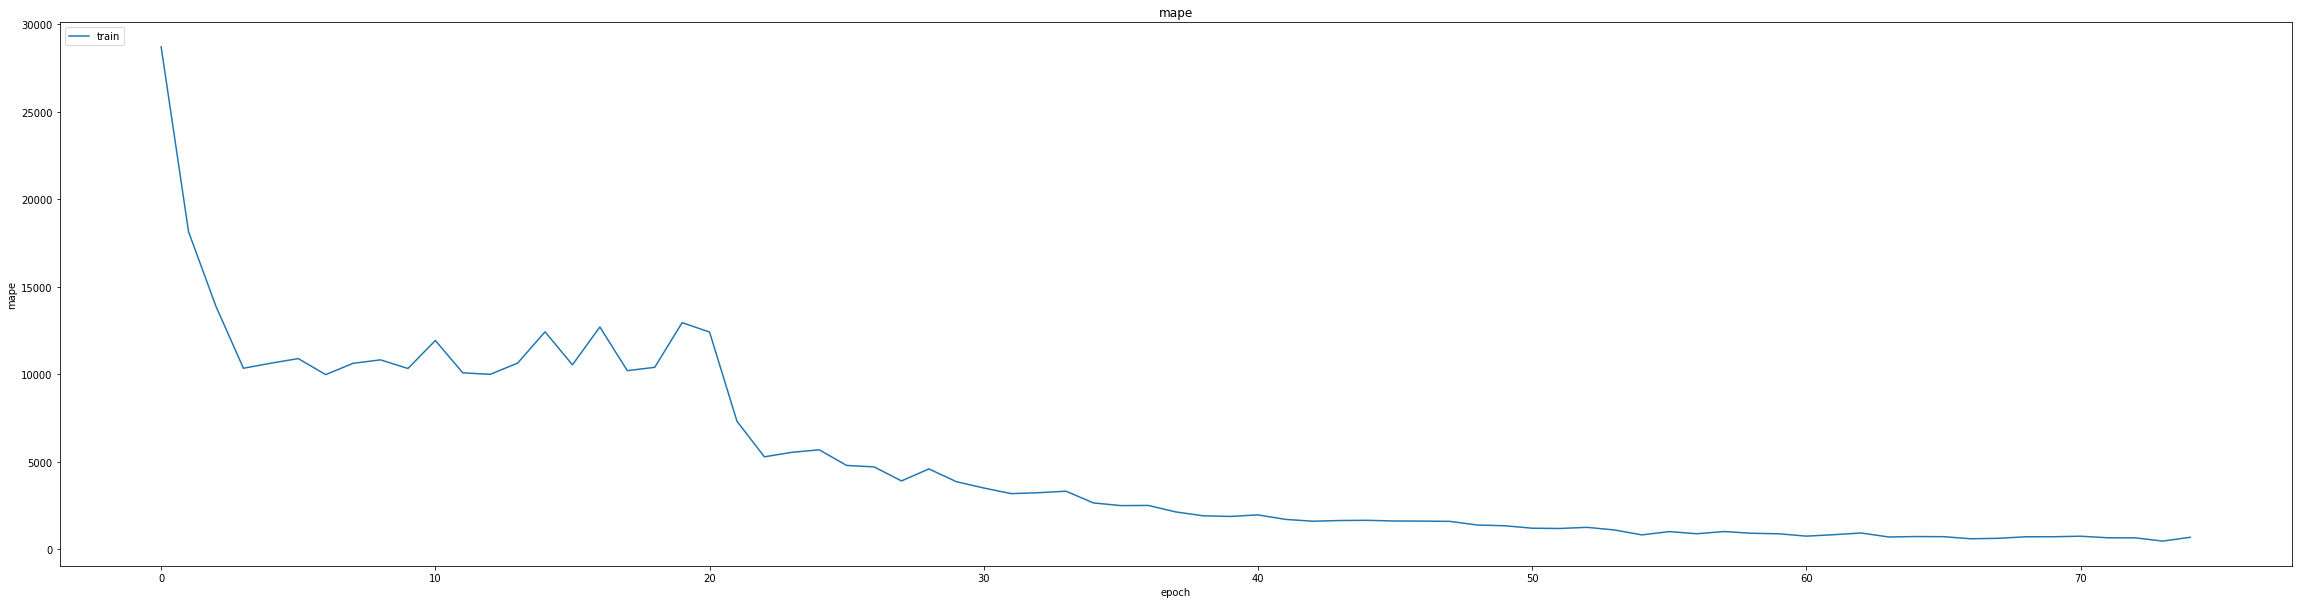

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.023454248905181885
0.028956236317753792
234/234 [==============================] - 9s 38ms/step
0.9846443850198603


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 3.7754e-04 - mae: 0.0107 - mse: 3.7754e-04 - root_mean_squared_error: 0.0194 - mape: 824.0282
Epoch 1: val_mse did not improve from 0.00084
464/464 [==============================] - 131s 269ms/step - loss: 3.7754e-04 - mae: 0.0107 - mse: 3.7754e-04 - root_mean_squared_error: 0.0194 - mape: 824.0282 - val_loss: 0.0012 - val_mae: 0.0299 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0348 - val_mape: 6566.9507 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 9.0966e-05 - mae: 0.0074 - mse: 9.0966e-05 - root_mean_squared_error: 0.0095 - mape: 806.1848
Epoch 2: val_mse did not improve from 0.00084
464/464 [==============================] - 117s 253ms/step - loss: 9.0966e-05 - mae: 0.0074 - mse: 9.0966e-05 - root_mean_squared_error: 0.0095 - mape: 806.1848 - val_loss: 0.0013 - val_mae: 0.0323 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0361 - val_mape: 5908.1987 - lr: 0.0010
lr

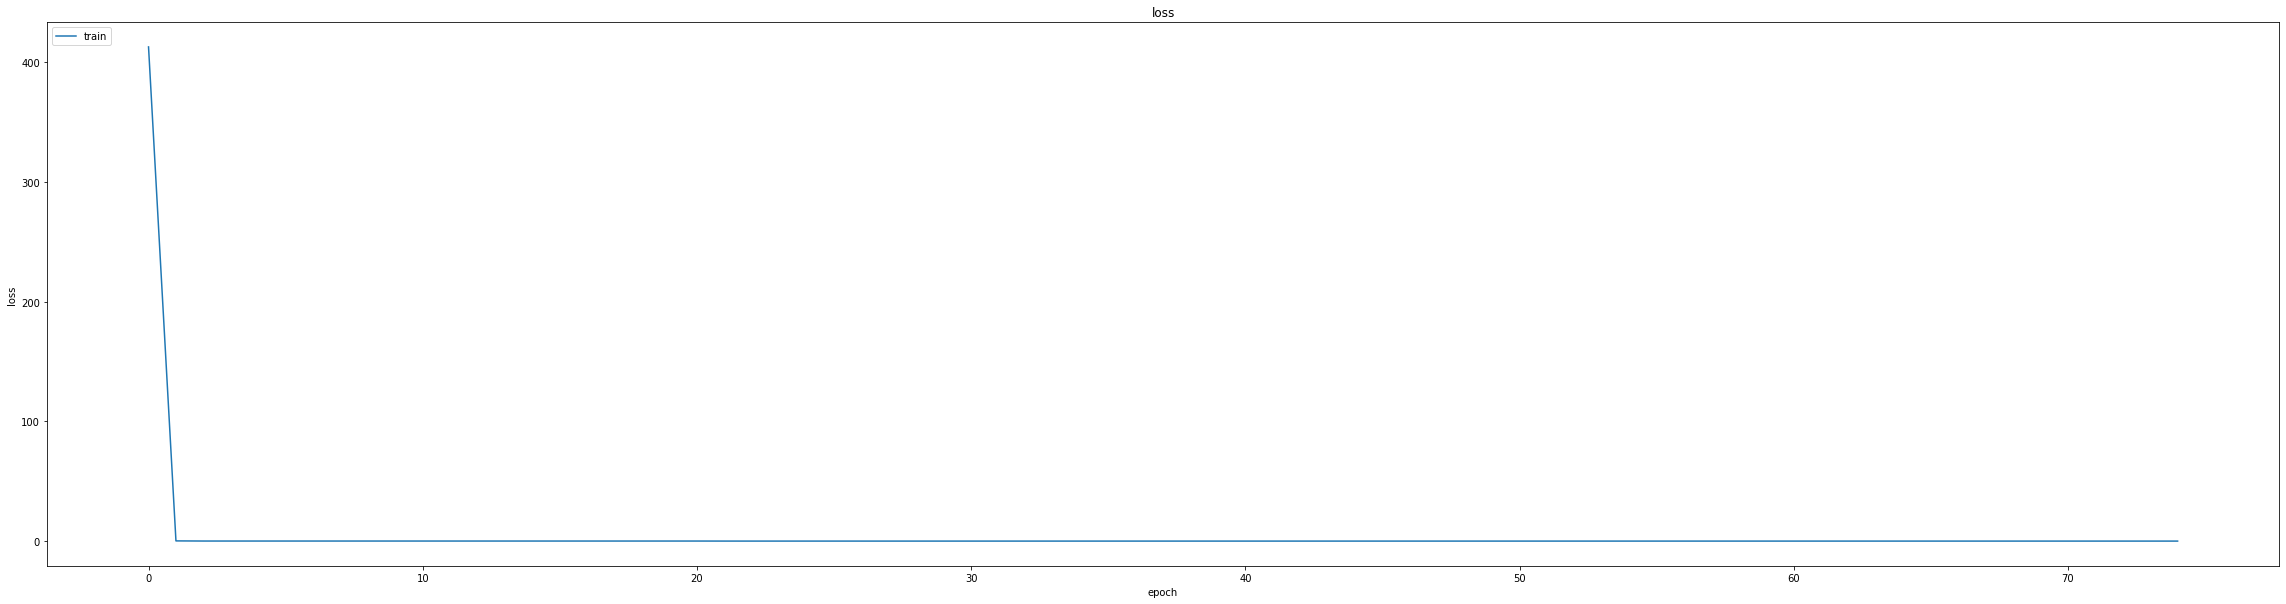

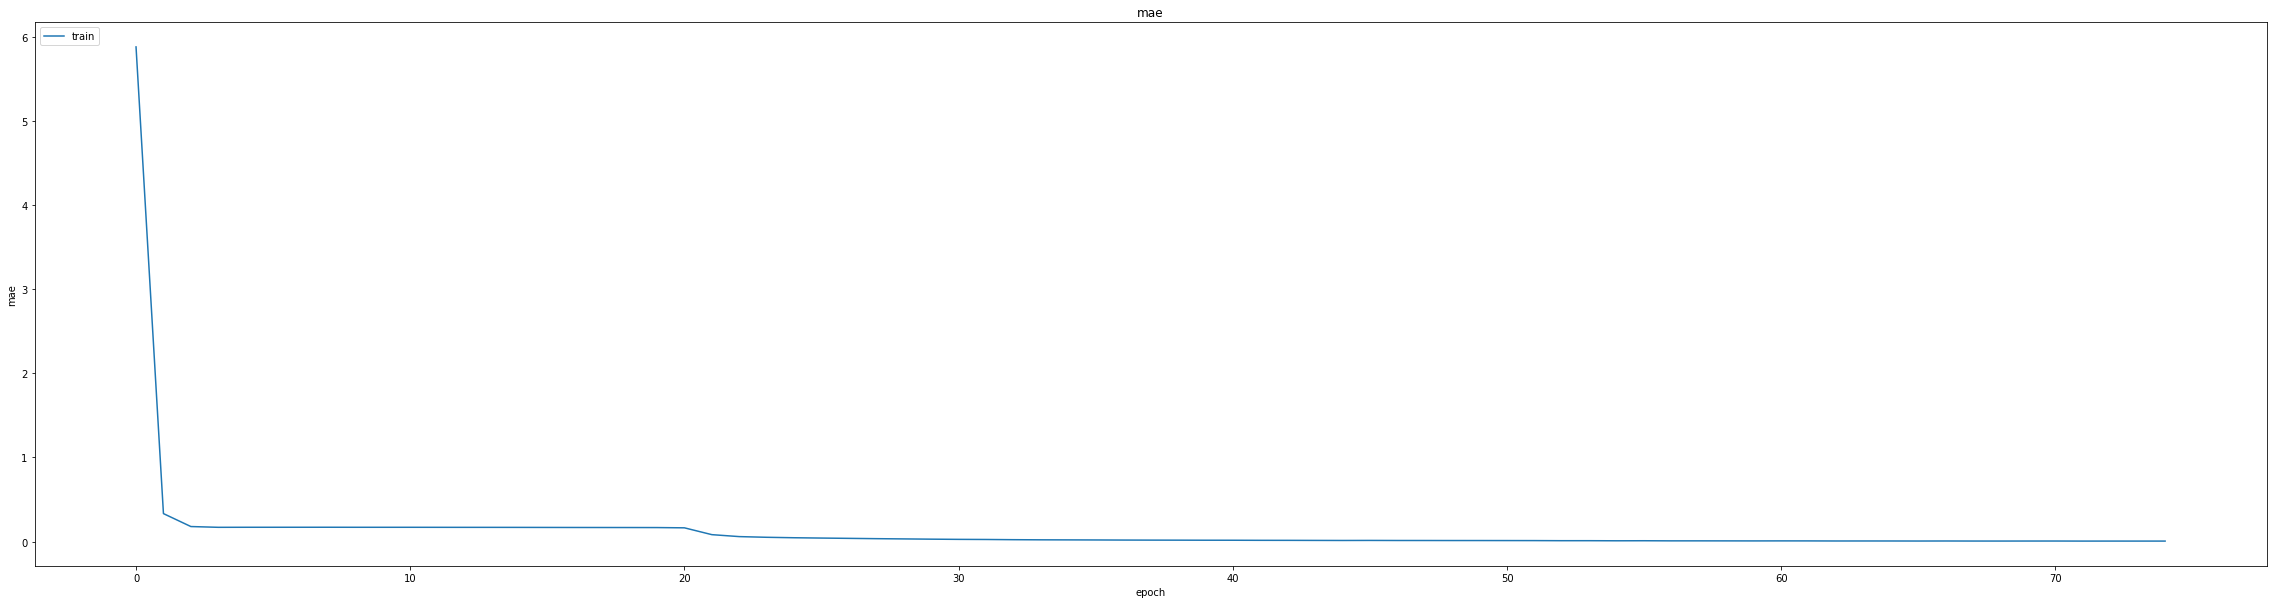

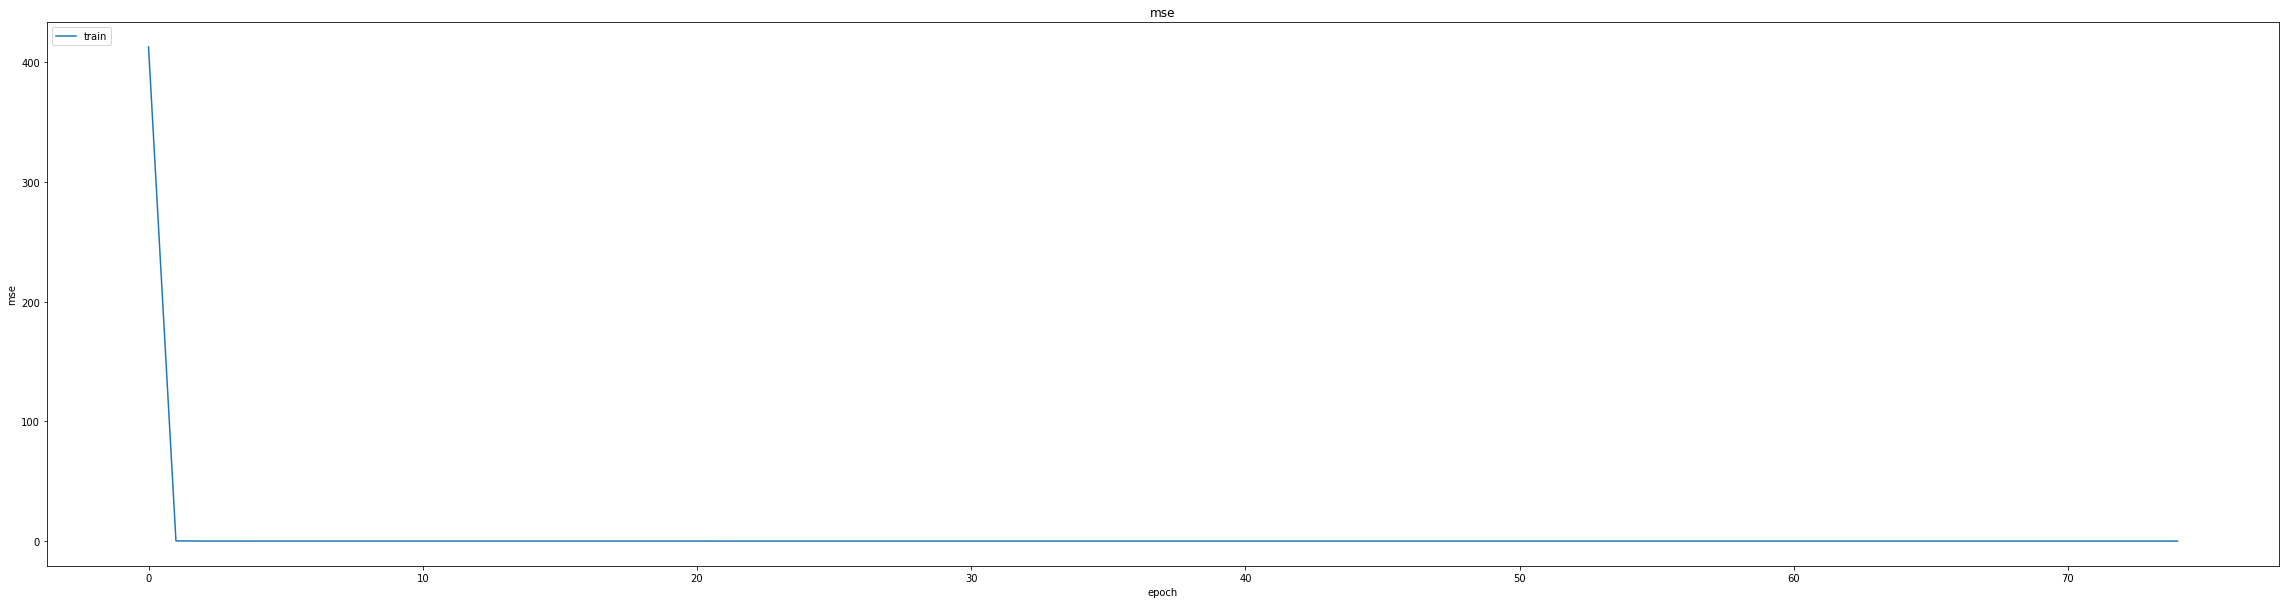

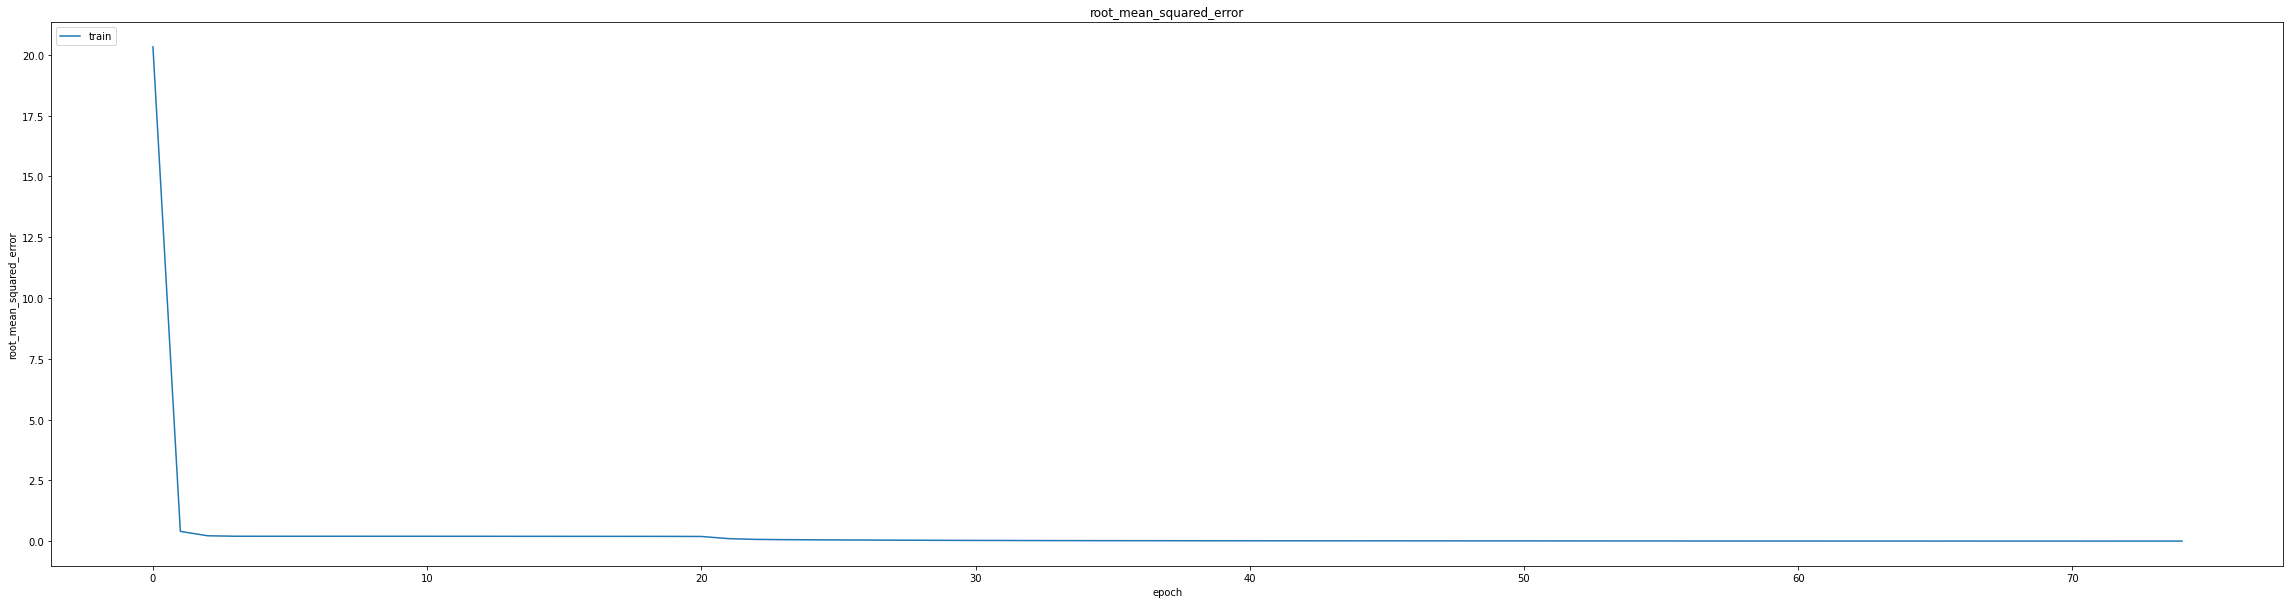

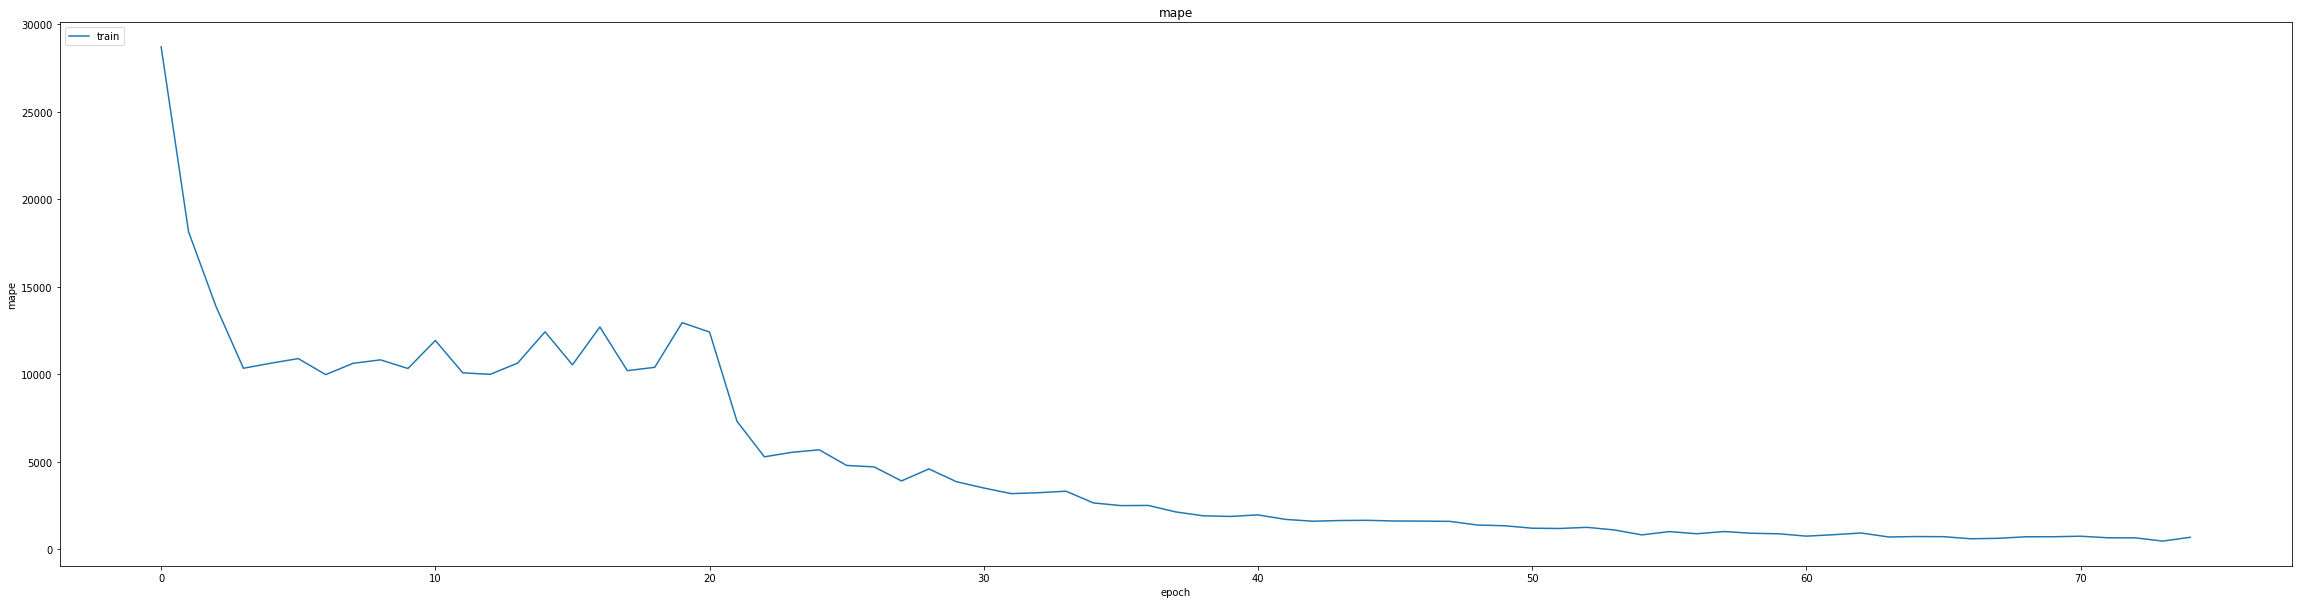

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.023454248905181885
0.028956236317753792
234/234 [==============================] - 15s 56ms/step
0.9699135750643774


234/234 [==============================] - 14s 58ms/step


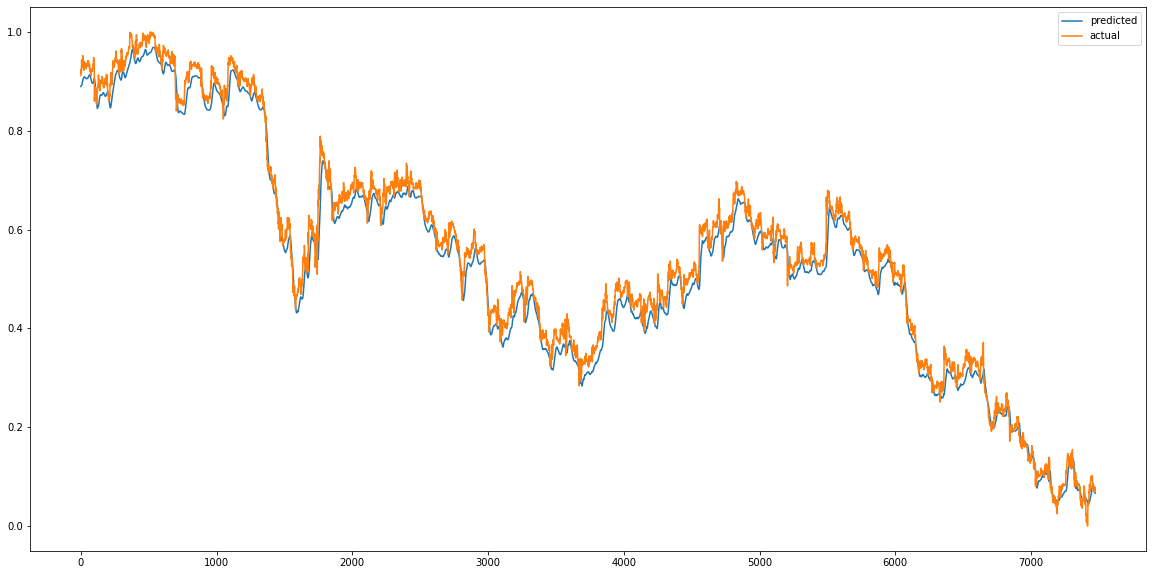

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


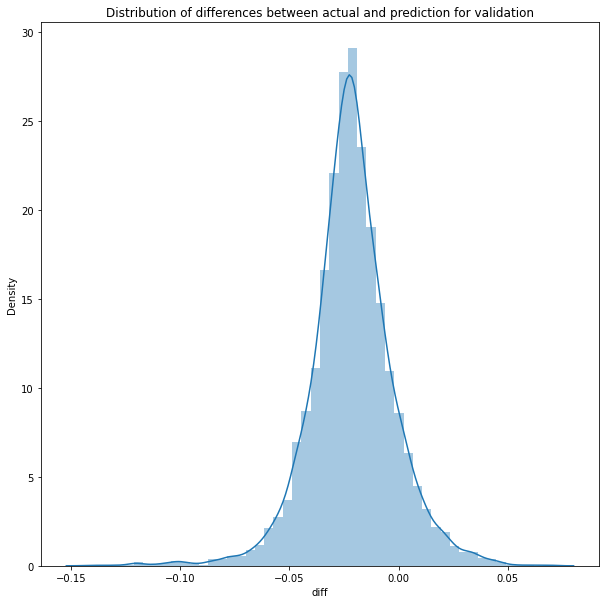

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 8s 37ms/step


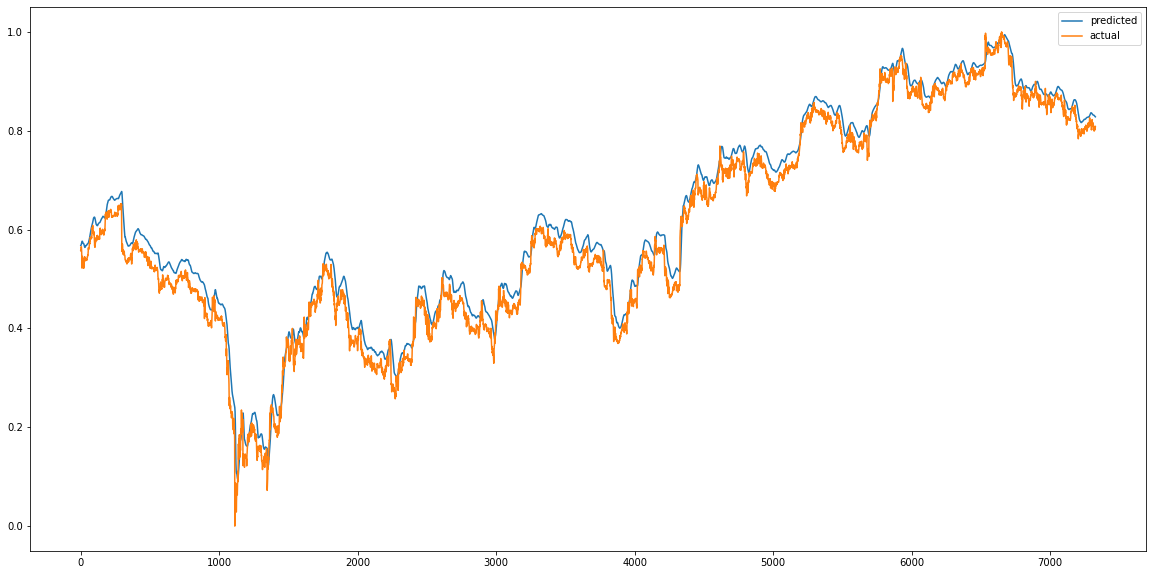

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


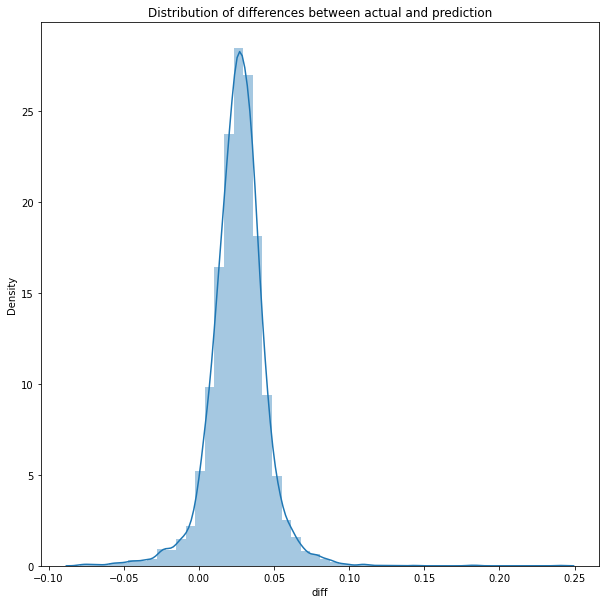

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0010201951508820599
MAE :  0.027988316147799574
RMSE  : 0.031940493904792075
229/229 [==============================] - 9s 38ms/step
R2_Score  : 0.9776104553511532


count    7327.000000
mean        0.026241
std         0.018211
min        -0.078986
25%         0.016974
50%         0.026713
75%         0.035865
max         0.240140
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          197632    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 401.6674 - mae: 2.8619 - mse: 401.6674 - root_mean_squared_error: 20.0416 - mape: 9784.6016
Epoch 1: val_mse improved from inf to 0.03101, saving model to weights.best.hdf5
464/464 [==============================] - 148s 300ms/step - loss: 401.6674 - mae: 2.8619 - mse: 401.6674 - root_mean_squared_error: 20.0416 - mape: 9784.6016 - val_loss: 0.0310 - val_mae: 0.1313 - val_mse: 0.0310 - val_root_mean_squared_error: 0.1761 - val_mape: 42498.4414
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0170 - mae: 0.0952 - mse: 0.0170 - root_mean_squared_error: 0.1305 - mape: 5159.4883
Epoch 2: val_mse improved from 0.03101 to 0.01562, saving model to weights.best.hdf5
464/464 [==============================] - 133s 288ms/step - loss: 0.0170 - mae: 0.0952 - mse: 0.0170 - root_mean_squared_error: 0.1305 - mape: 5159.4883 - val_loss: 0.0156 - val_mae: 0.1108 - val_mse: 0.0156 - val_root_mean_squared_error: 

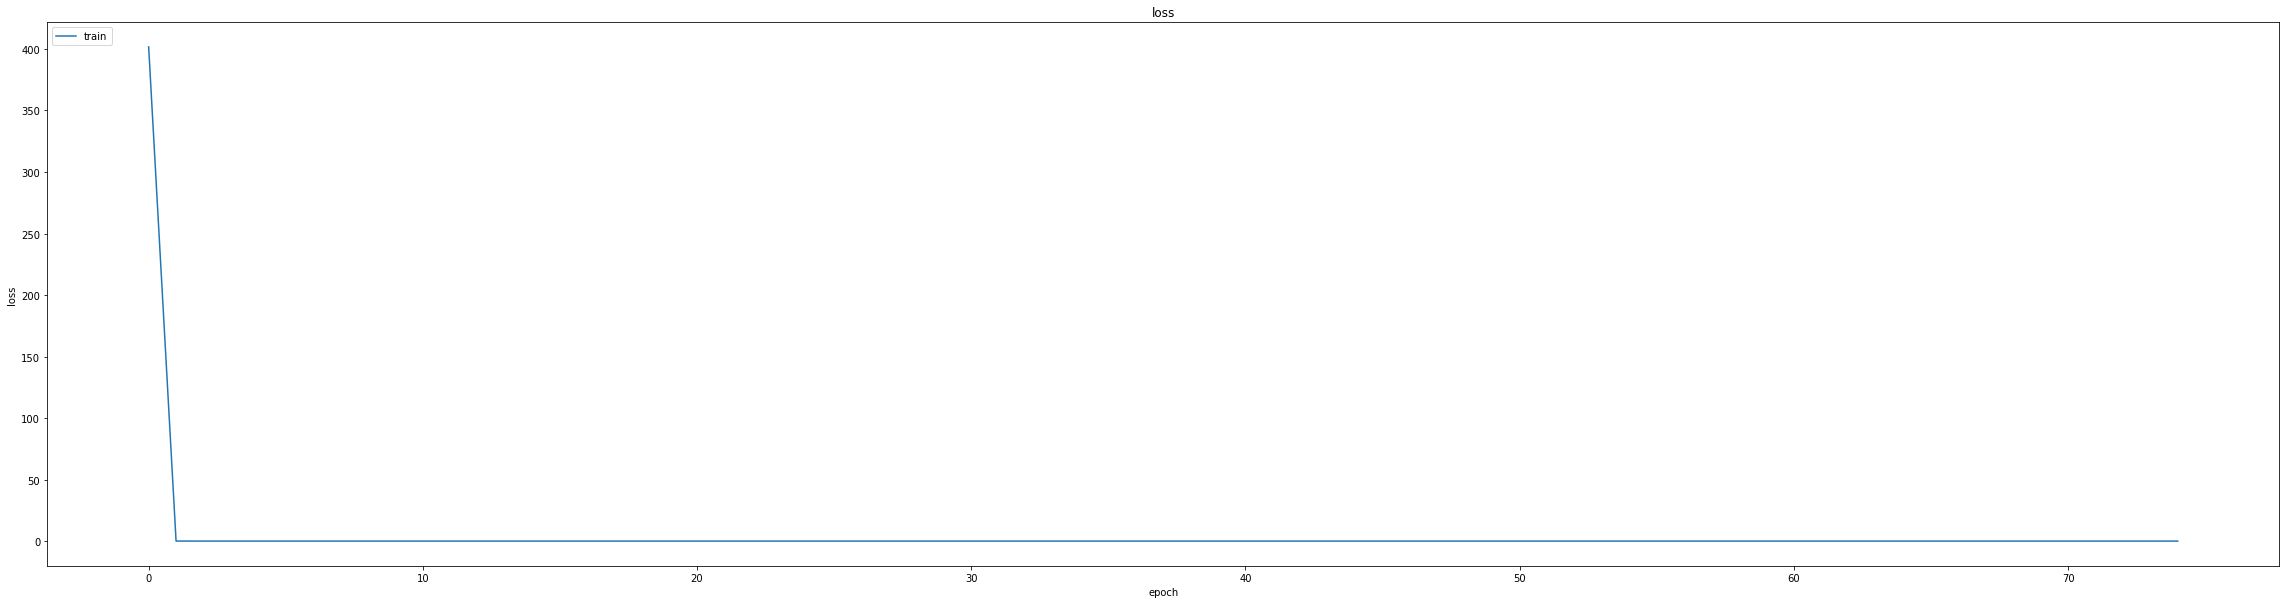

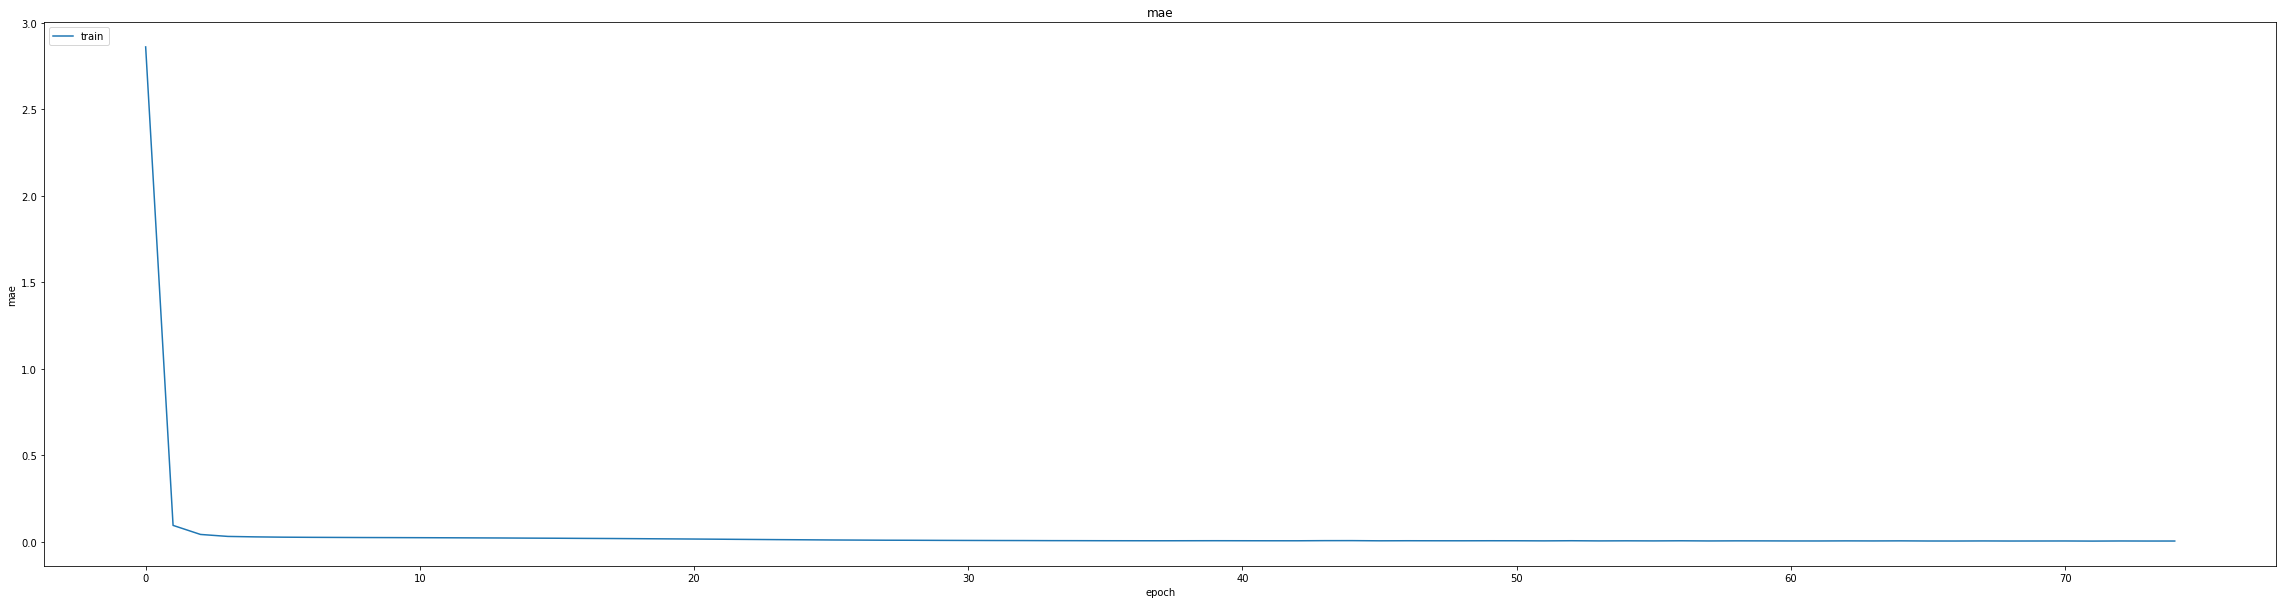

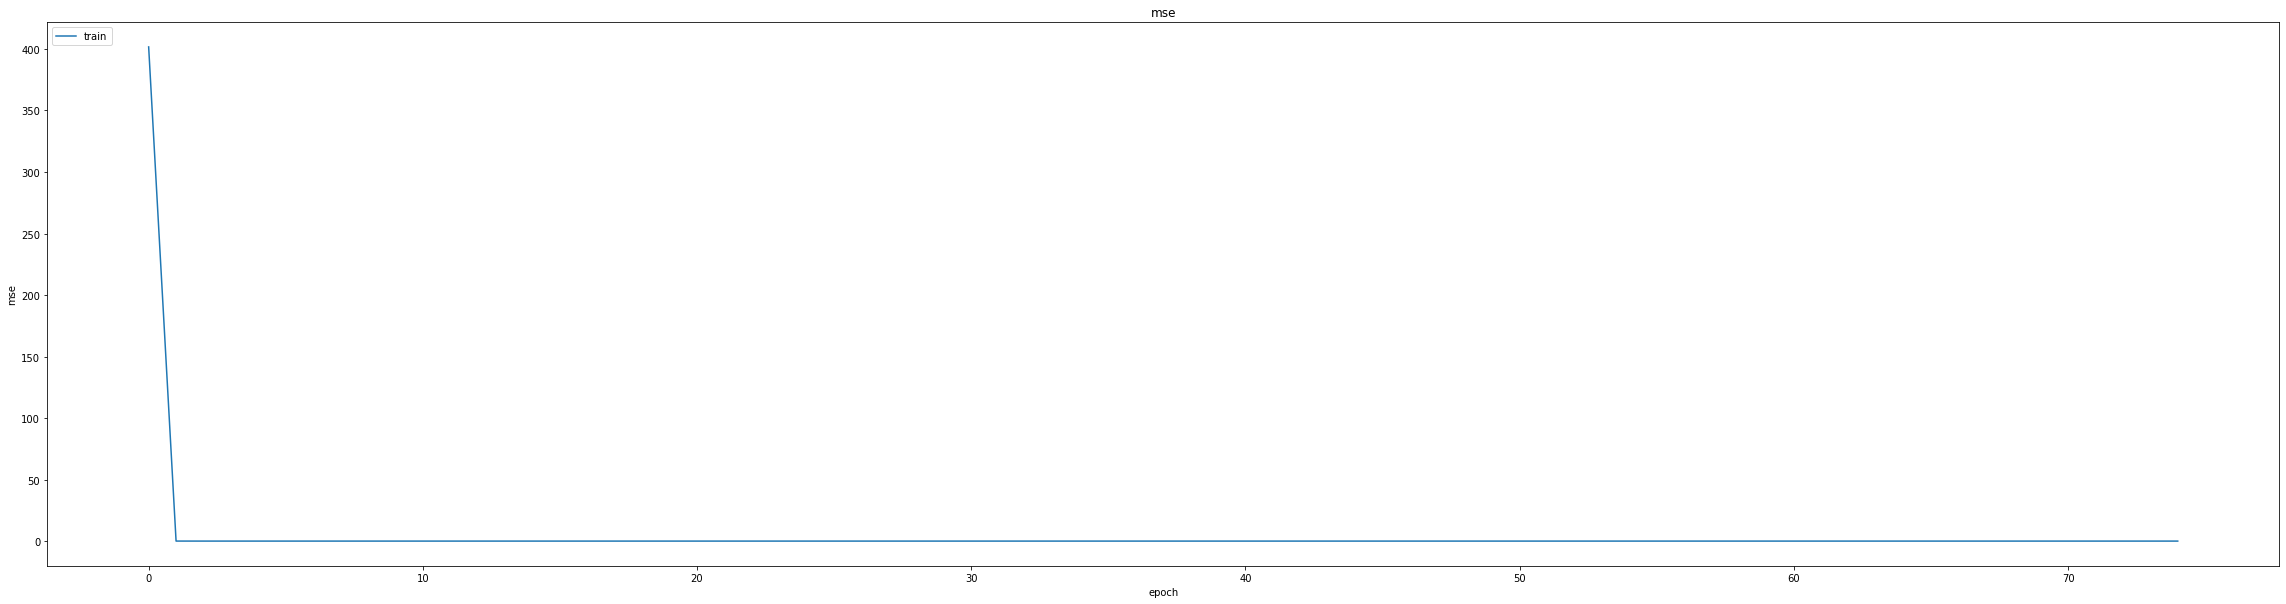

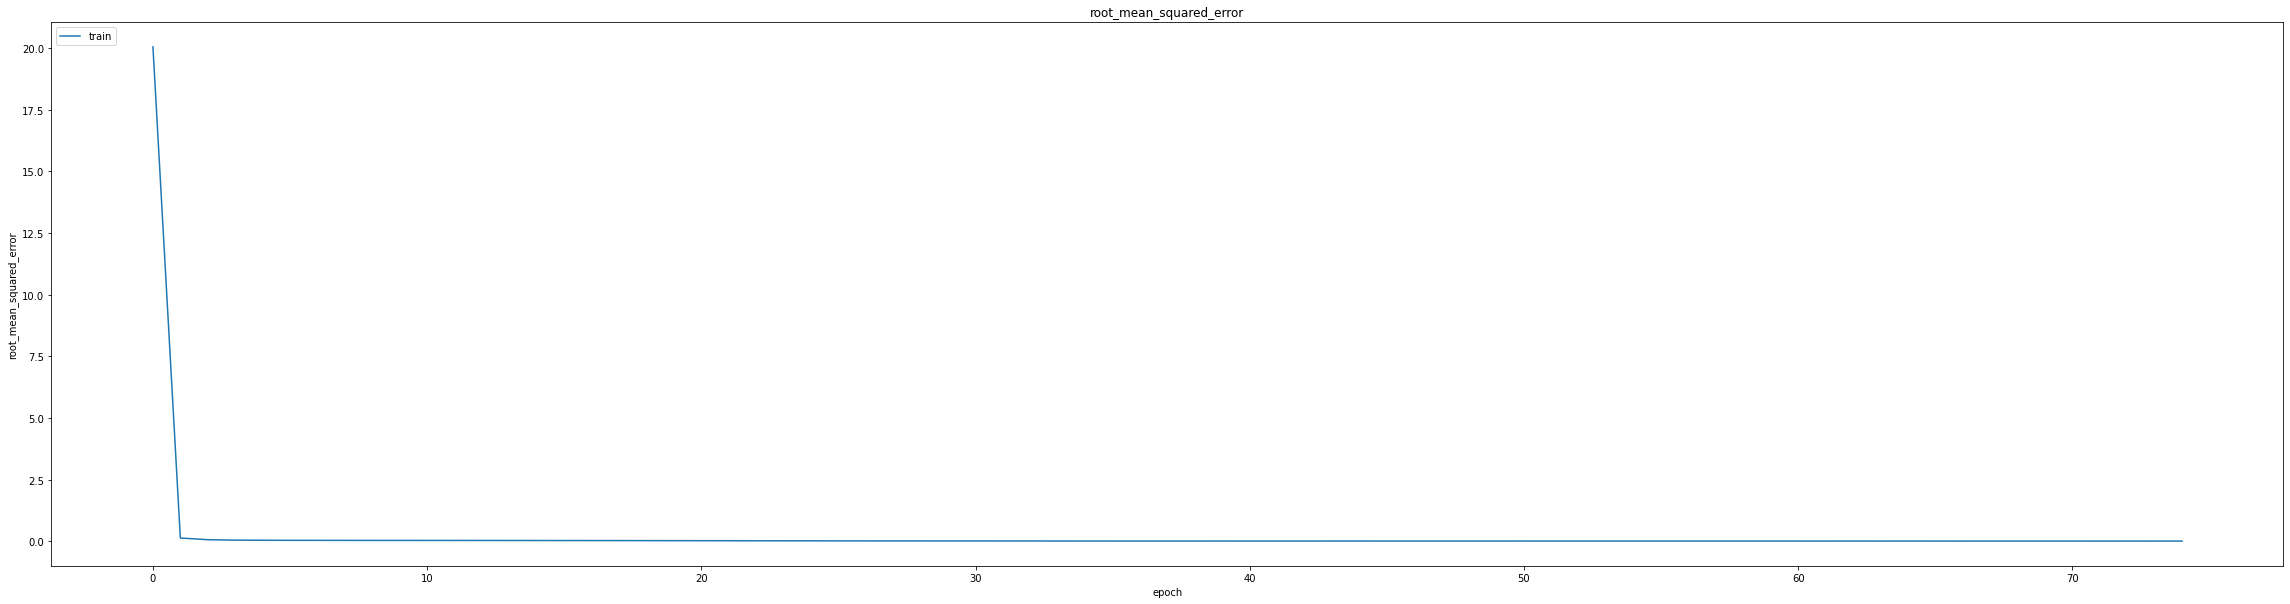

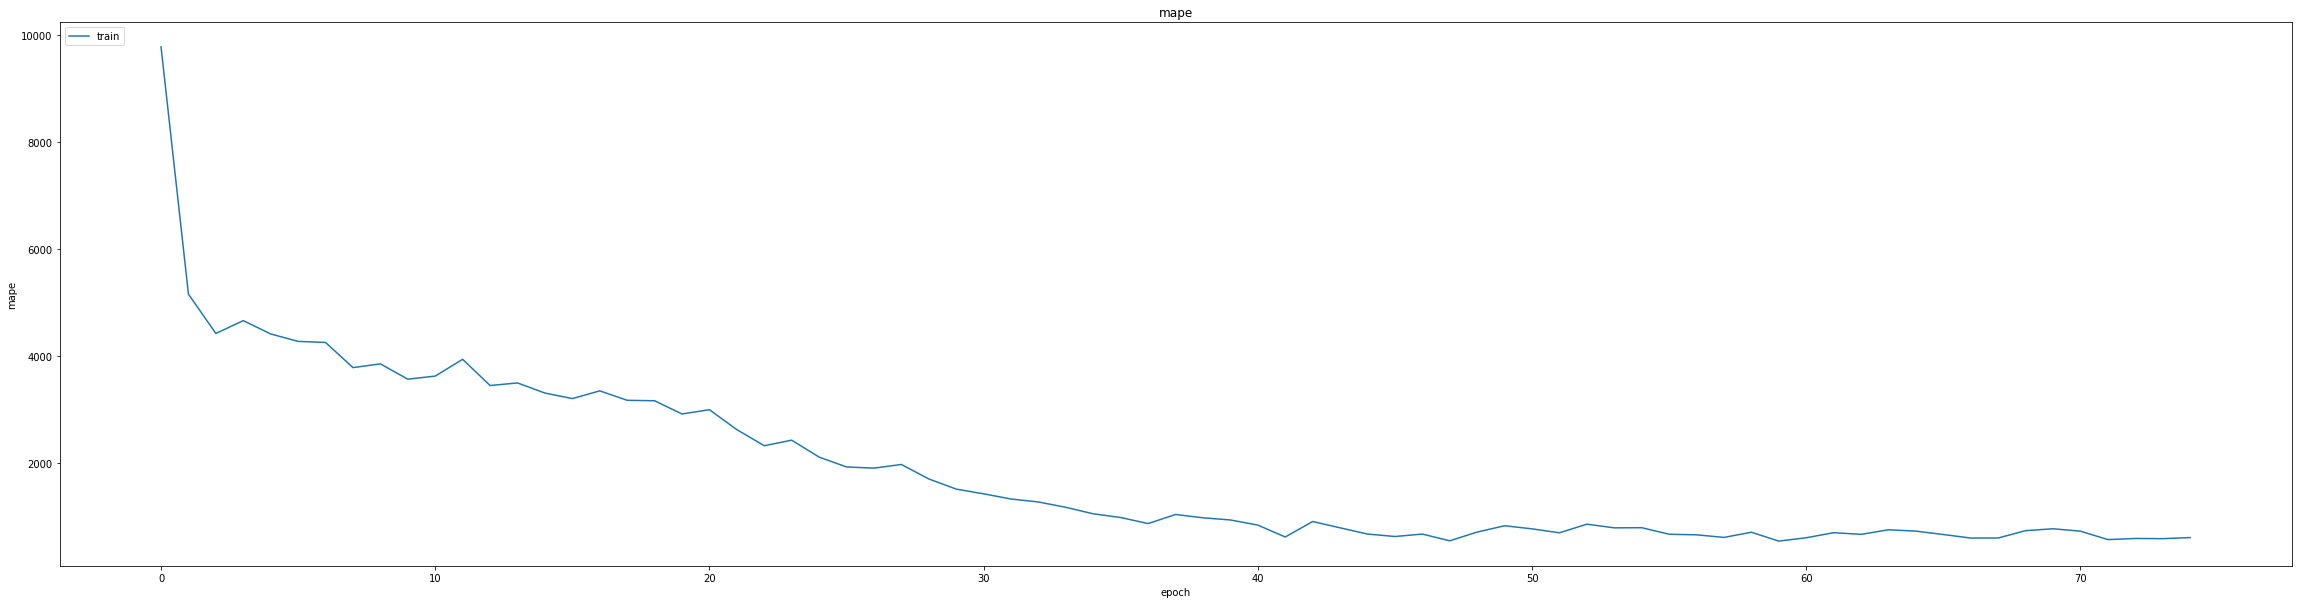

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.05907534435391426
0.06017246097326279
234/234 [==============================] - 10s 37ms/step
0.9262014234786524


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 1.9781e-04 - mae: 0.0057 - mse: 1.9781e-04 - root_mean_squared_error: 0.0141 - mape: 587.4492
Epoch 1: val_mse did not improve from 0.00362
464/464 [==============================] - 146s 297ms/step - loss: 1.9781e-04 - mae: 0.0057 - mse: 1.9781e-04 - root_mean_squared_error: 0.0141 - mape: 587.4492 - val_loss: 0.0045 - val_mae: 0.0660 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0674 - val_mape: 3309.4753 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.7667e-05 - mae: 0.0031 - mse: 1.7667e-05 - root_mean_squared_error: 0.0042 - mape: 421.7517
Epoch 2: val_mse did not improve from 0.00362
464/464 [==============================] - 136s 292ms/step - loss: 1.7667e-05 - mae: 0.0031 - mse: 1.7667e-05 - root_mean_squared_error: 0.0042 - mape: 421.7517 - val_loss: 0.0048 - val_mae: 0.0680 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0693 - val_mape: 2750.9048 - lr: 0.0010
lr

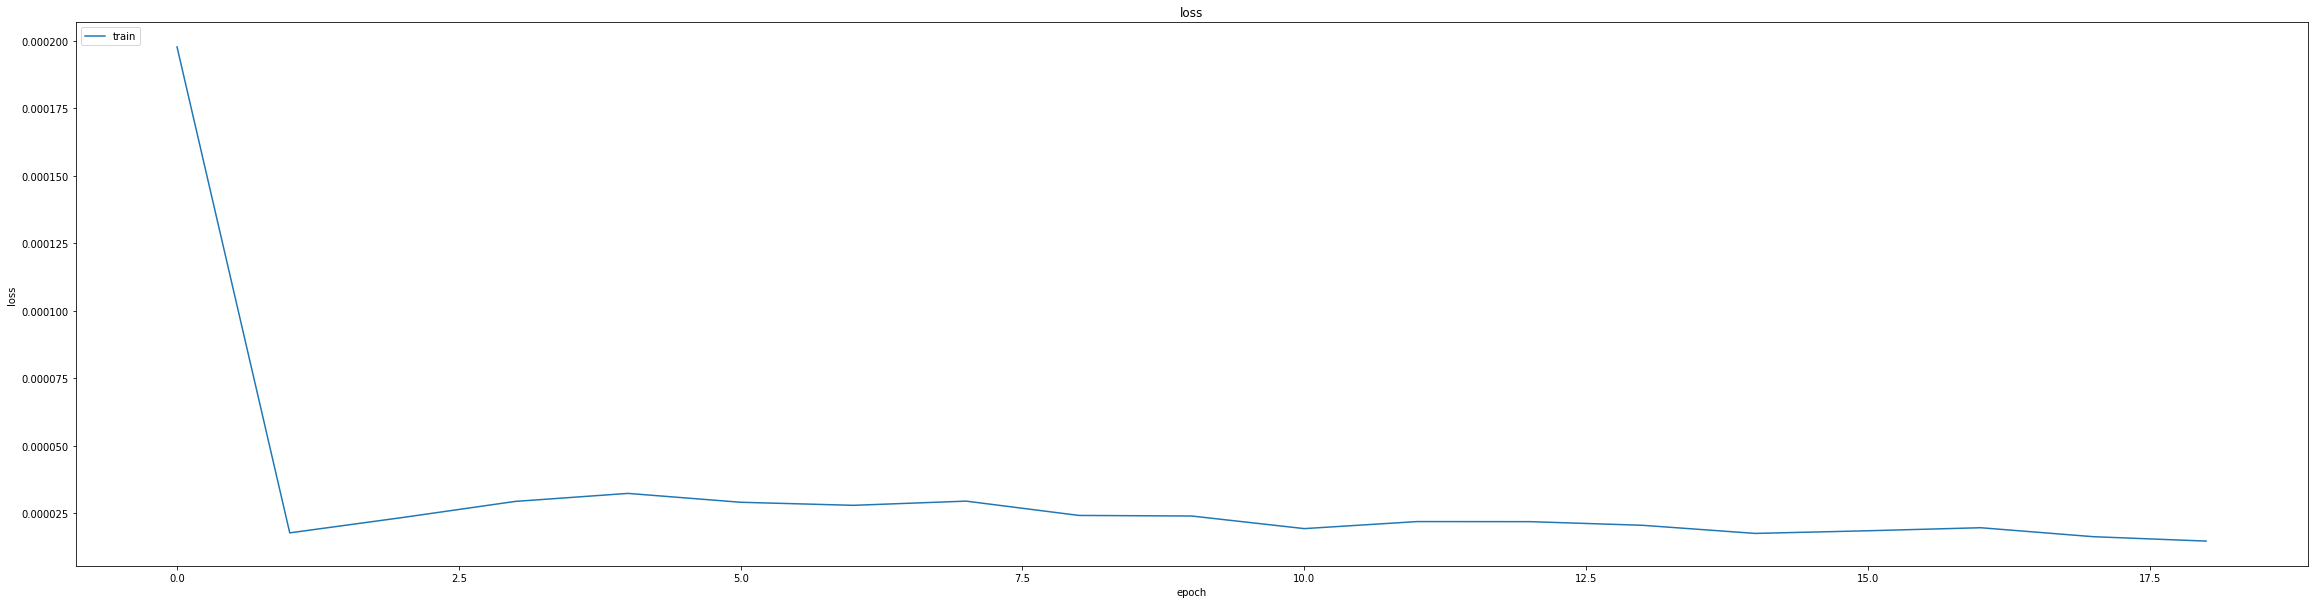

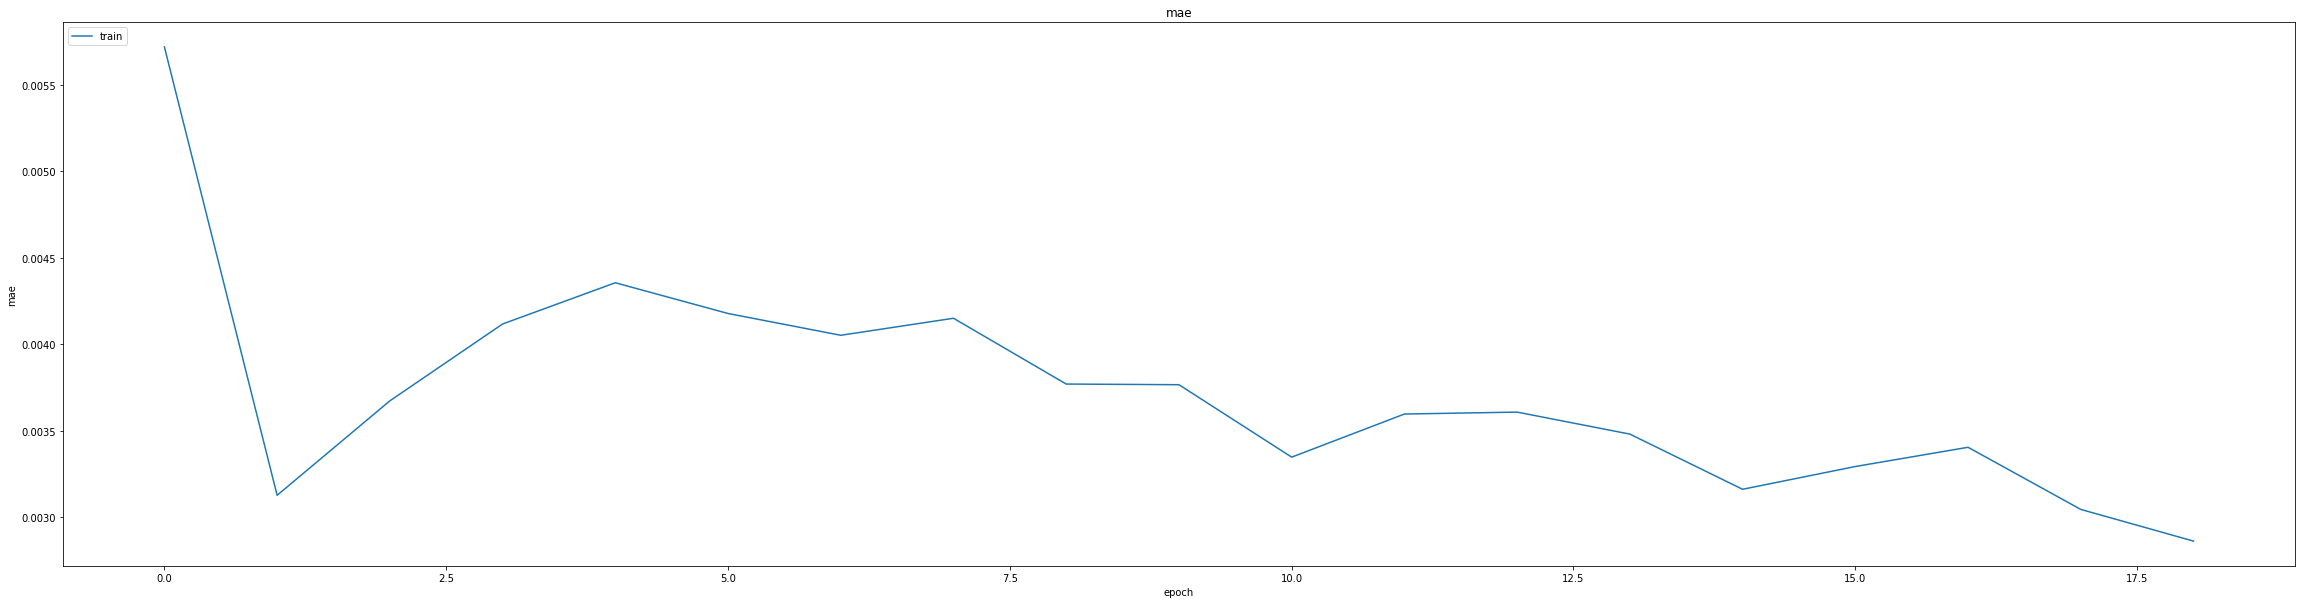

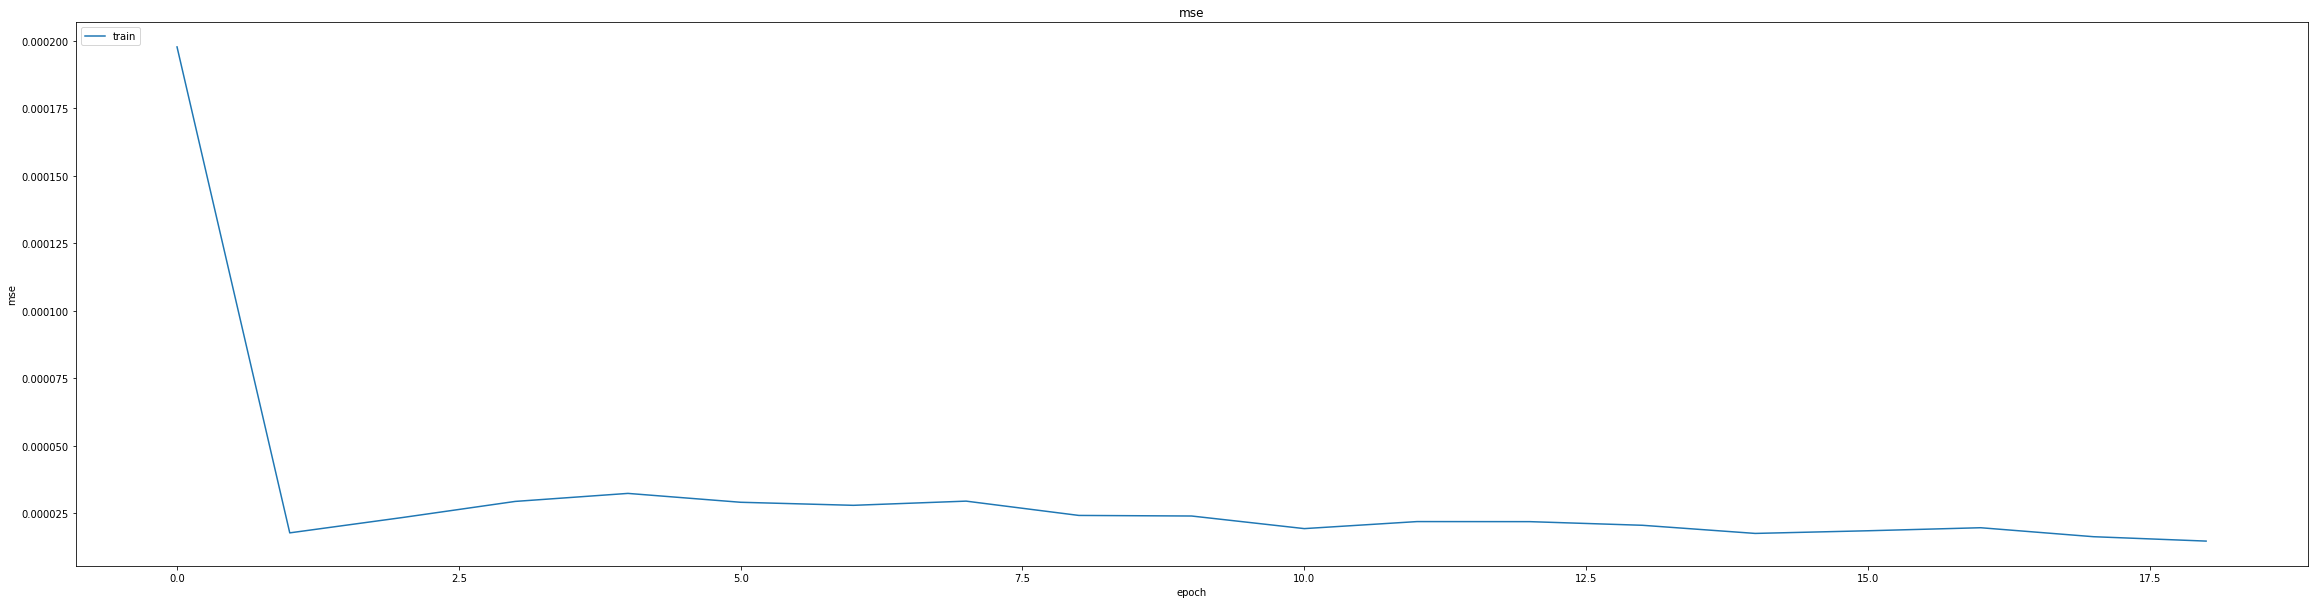

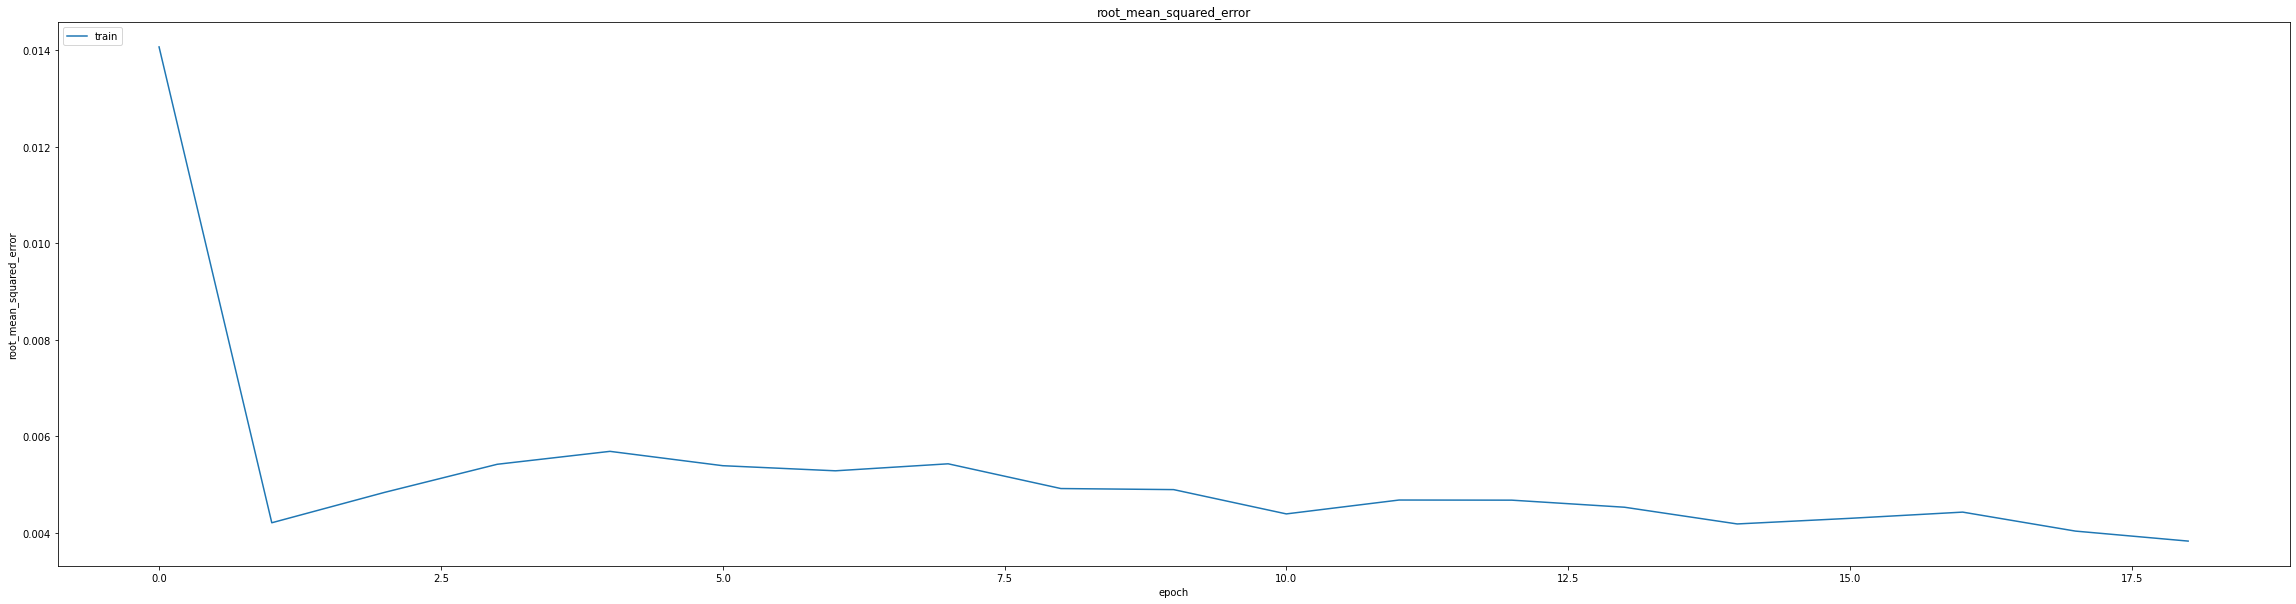

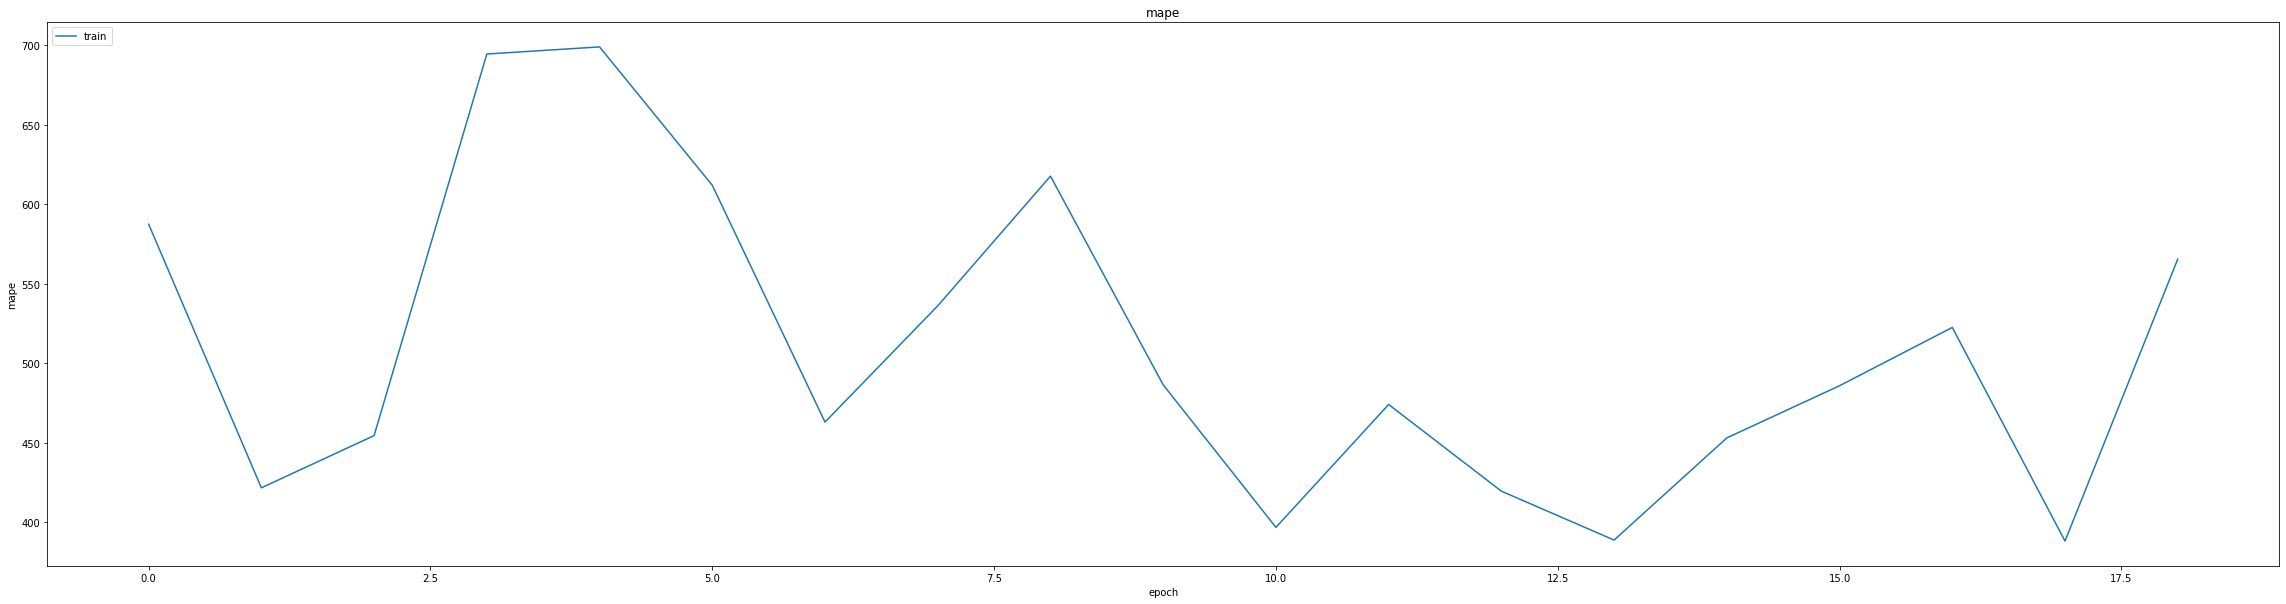

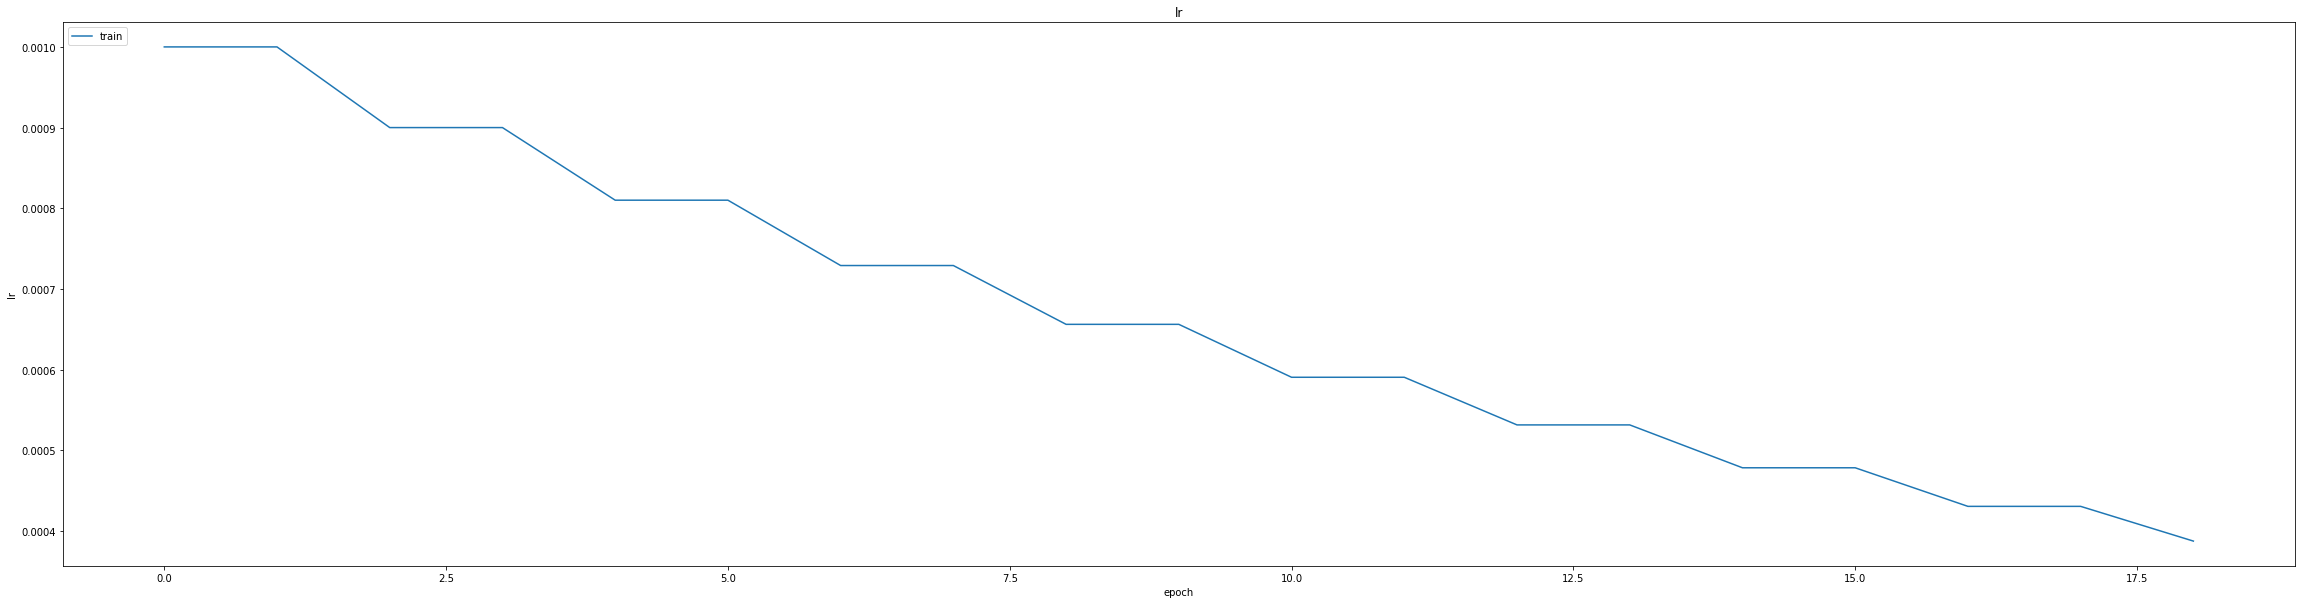

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.057456135749816895
0.0592995323240757
234/234 [==============================] - 10s 36ms/step
0.923476407363727


234/234 [==============================] - 11s 47ms/step


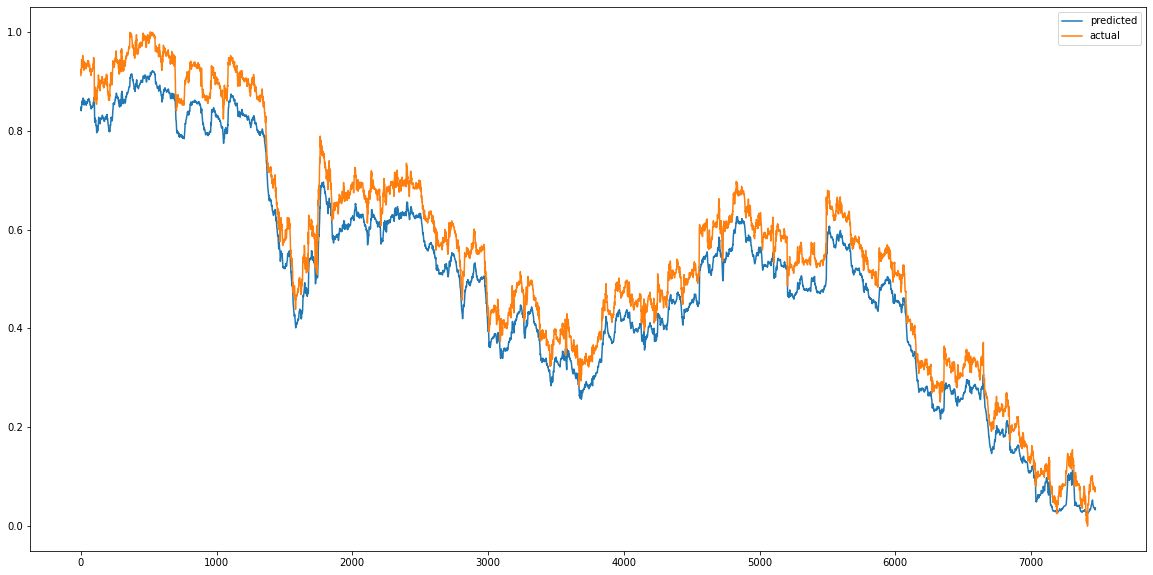

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


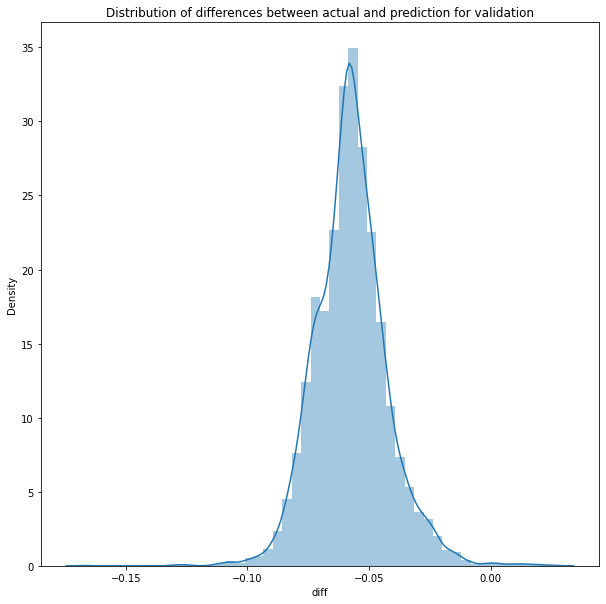

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 11s 49ms/step


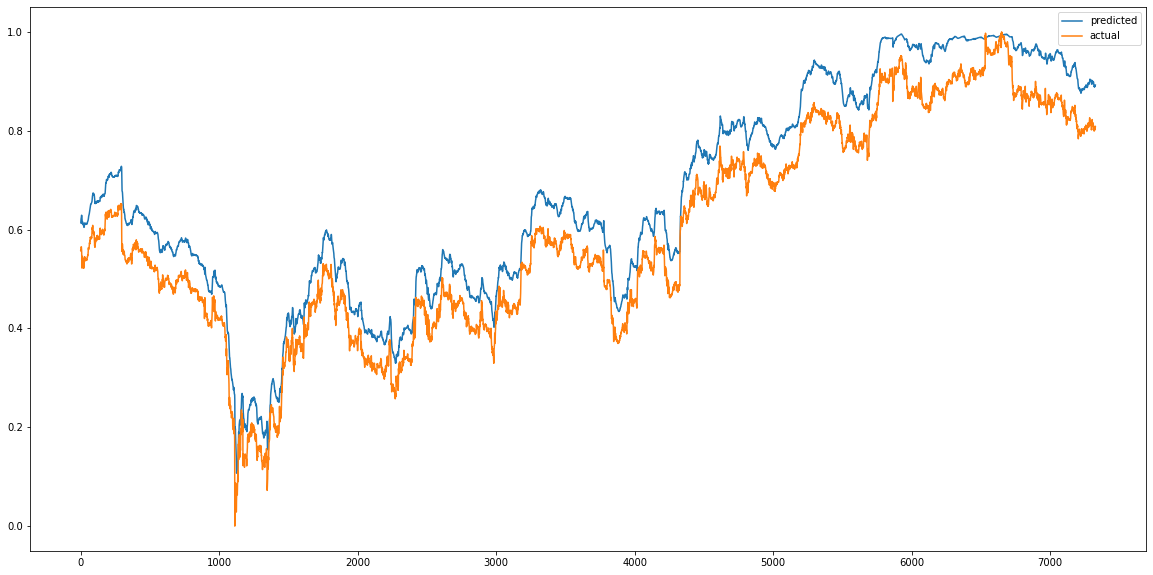

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


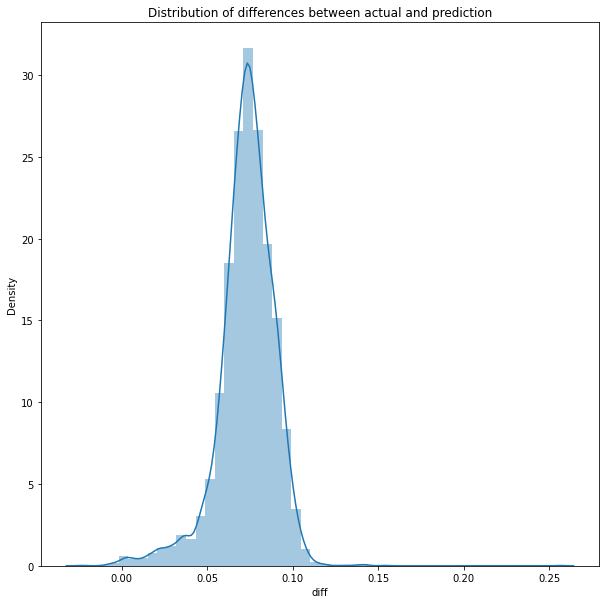

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.005604781910965431
MAE :  0.07303772375986164
RMSE  : 0.07486509140424148
229/229 [==============================] - 9s 37ms/step
R2_Score  : 0.8769955779195526


count    7327.000000
mean        0.073018
std         0.016529
min        -0.023959
25%         0.065329
50%         0.074145
75%         0.083301
max         0.255775
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 gru (GRU)                   (None, 24, 256)           247296    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 378.3318 - mae: 2.8111 - mse: 378.3318 - root_mean_squared_error: 19.4508 - mape: 992864.3750
Epoch 1: val_mse improved from inf to 0.01918, saving model to weights.best.hdf5
464/464 [==============================] - 123s 253ms/step - loss: 378.3318 - mae: 2.8111 - mse: 378.3318 - root_mean_squared_error: 19.4508 - mape: 992864.3750 - val_loss: 0.0192 - val_mae: 0.1096 - val_mse: 0.0192 - val_root_mean_squared_error: 0.1385 - val_mape: 54237.9922
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0045 - mae: 0.0492 - mse: 0.0045 - root_mean_squared_error: 0.0669 - mape: 6161.2744
Epoch 2: val_mse did not improve from 0.01918
464/464 [==============================] - 113s 244ms/step - loss: 0.0045 - mae: 0.0492 - mse: 0.0045 - root_mean_squared_error: 0.0669 - mape: 6161.2744 - val_loss: 0.0201 - val_mae: 0.1286 - val_mse: 0.0201 - val_root_mean_squared_error: 0.1418 - val_mape: 44156.2500
Epoch

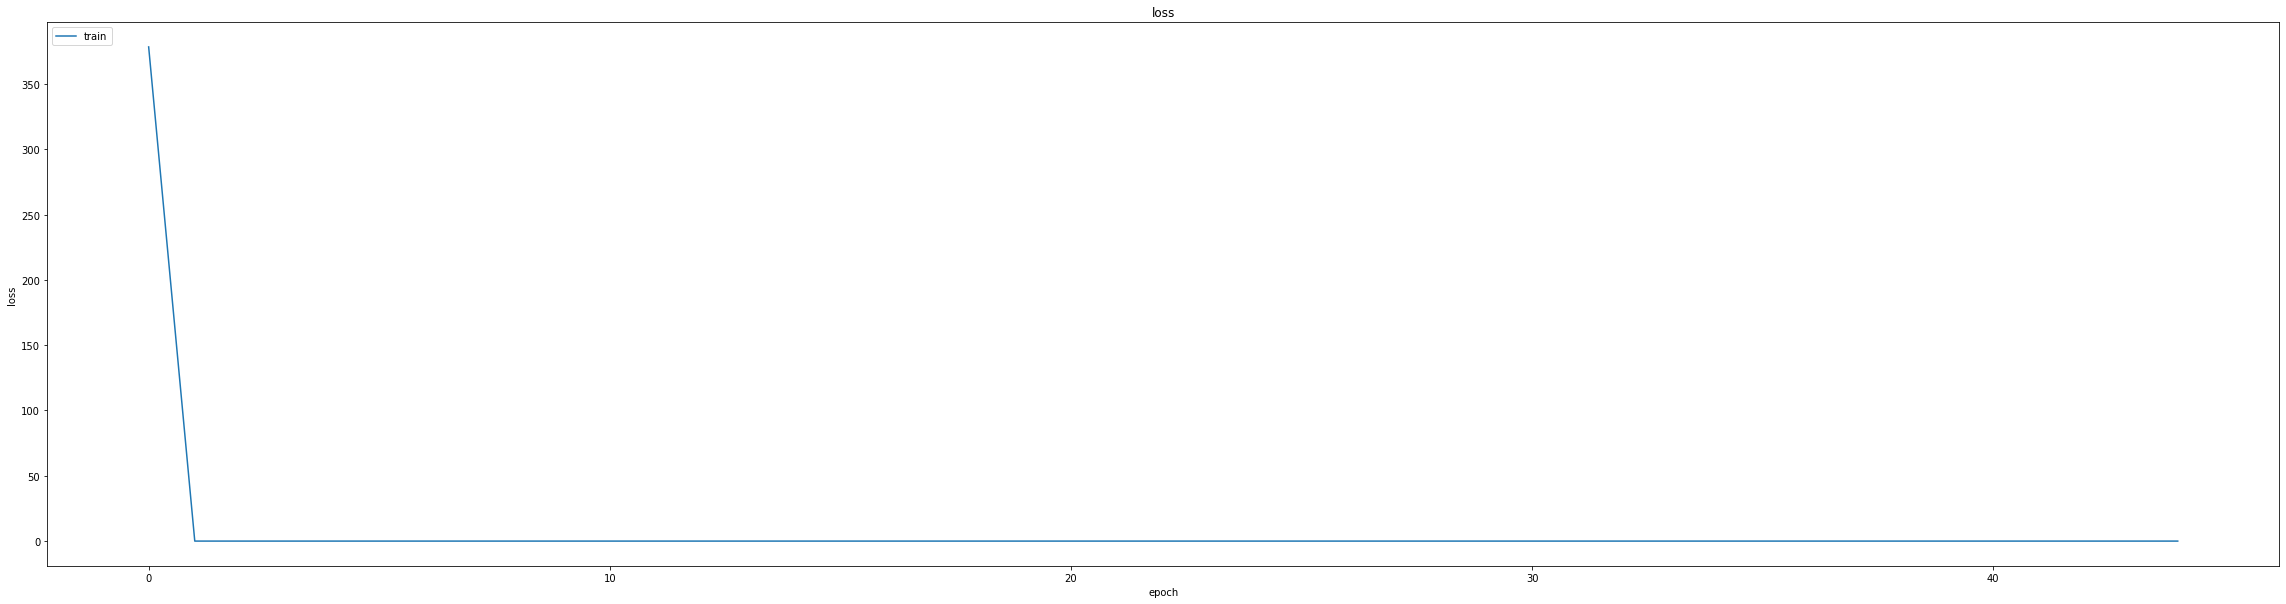

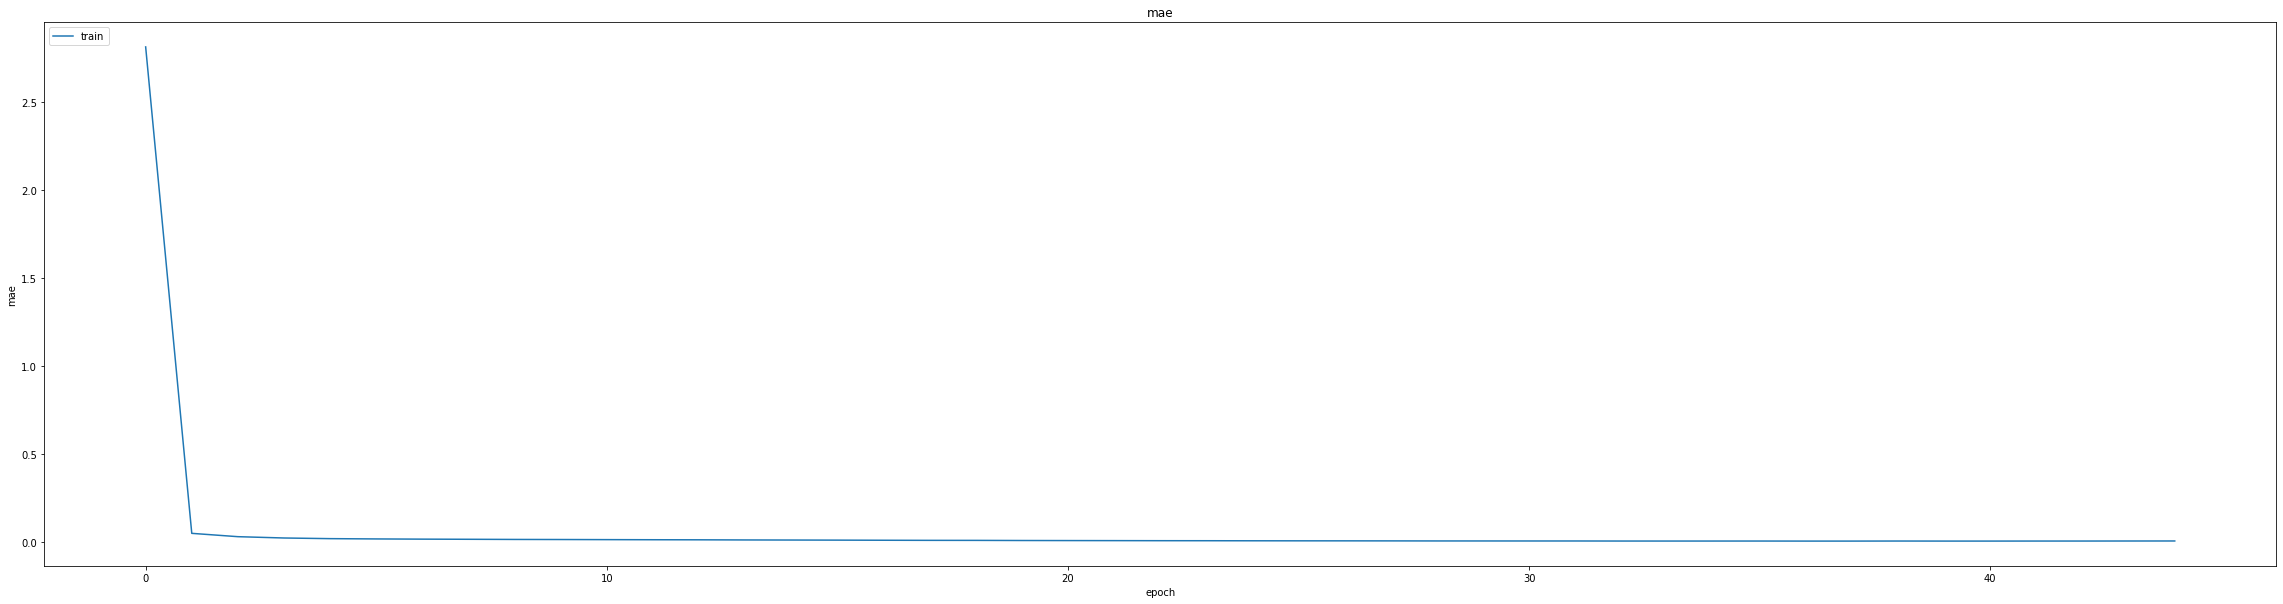

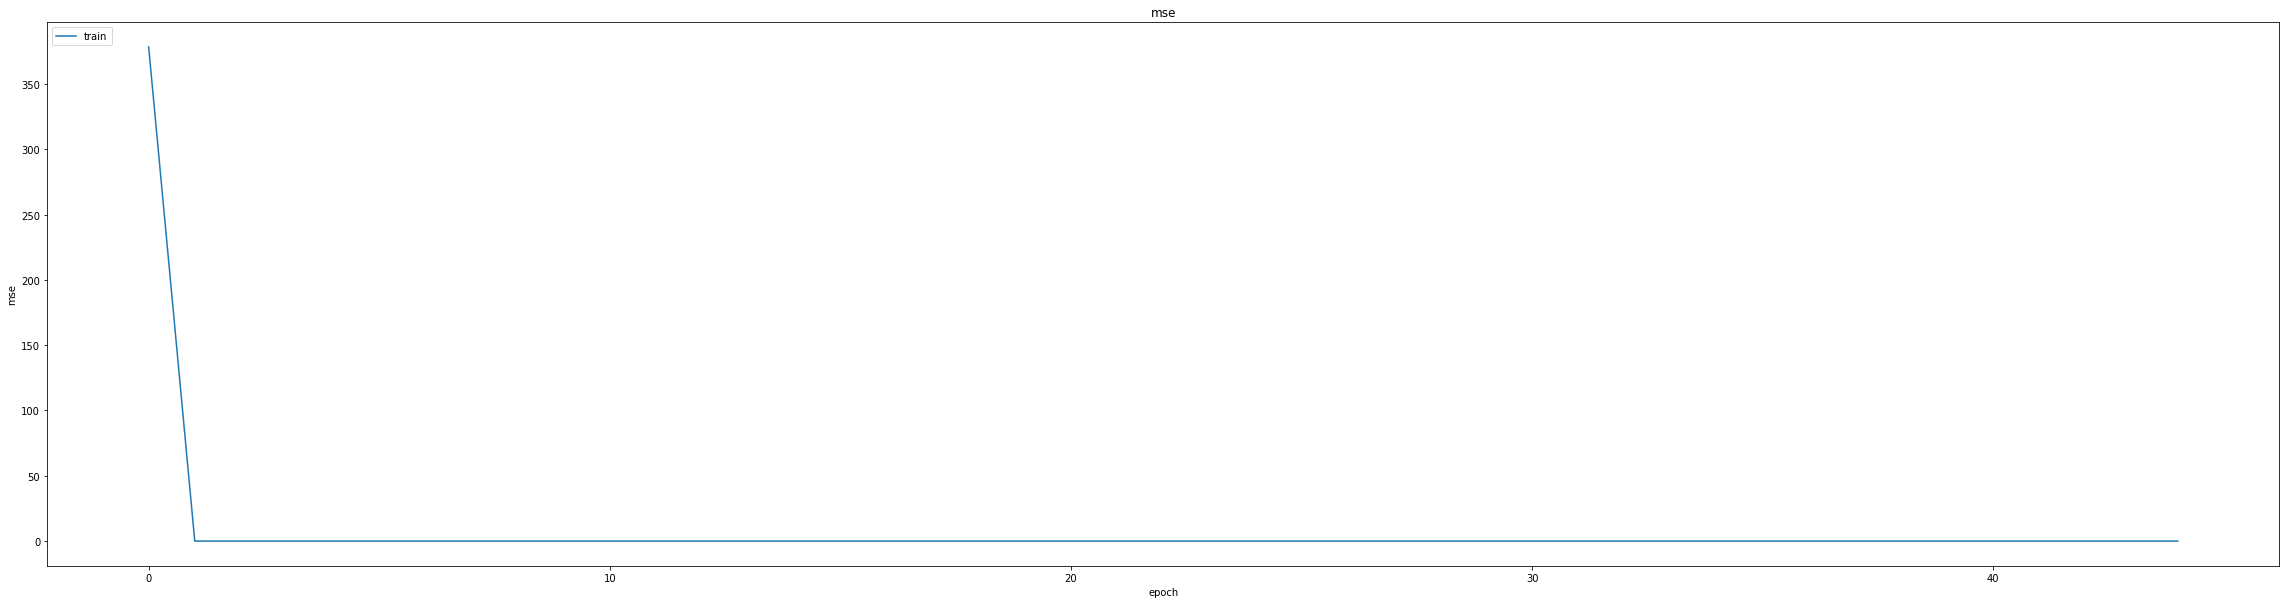

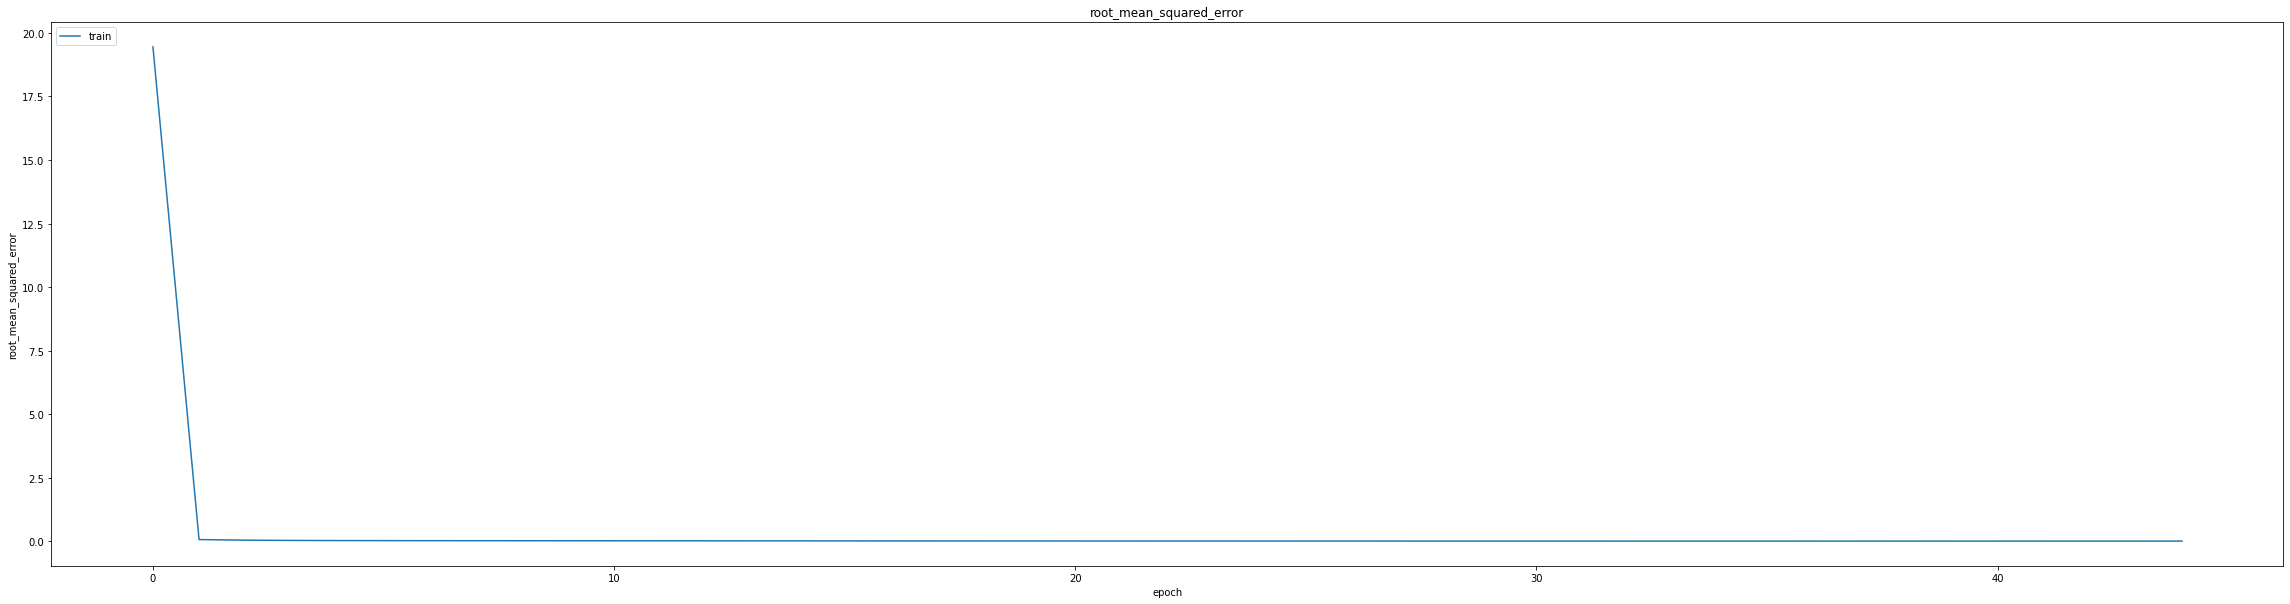

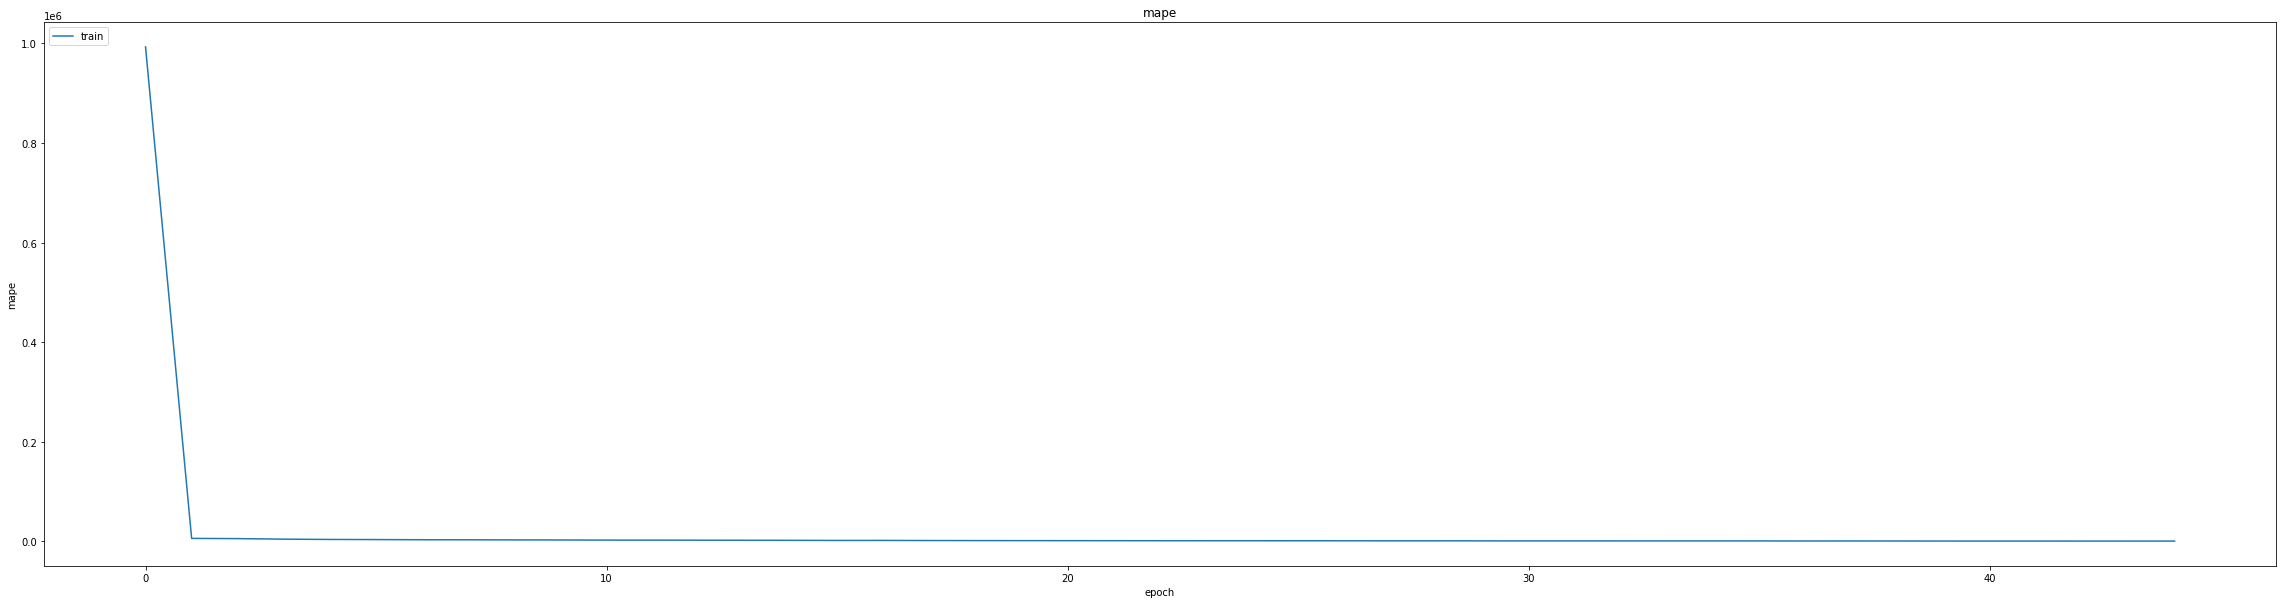

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.08306711912155151
0.08921326696872711
234/234 [==============================] - 8s 29ms/step
0.8369598489774893


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=12)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 7.7981e-04 - mae: 0.0137 - mse: 7.7981e-04 - root_mean_squared_error: 0.0279 - mape: 1946.2510
Epoch 1: val_mse did not improve from 0.00796
464/464 [==============================] - 110s 228ms/step - loss: 7.7981e-04 - mae: 0.0137 - mse: 7.7981e-04 - root_mean_squared_error: 0.0279 - mape: 1946.2510 - val_loss: 0.0083 - val_mae: 0.0847 - val_mse: 0.0083 - val_root_mean_squared_error: 0.0909 - val_mape: 13998.3389 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 9.9807e-05 - mae: 0.0075 - mse: 9.9807e-05 - root_mean_squared_error: 0.0100 - mape: 1305.8953
Epoch 2: val_mse did not improve from 0.00796
464/464 [==============================] - 112s 240ms/step - loss: 9.9807e-05 - mae: 0.0075 - mse: 9.9807e-05 - root_mean_squared_error: 0.0100 - mape: 1305.8953 - val_loss: 0.0101 - val_mae: 0.0971 - val_mse: 0.0101 - val_root_mean_squared_error: 0.1005 - val_mape: 10095.0020 - lr: 0.0

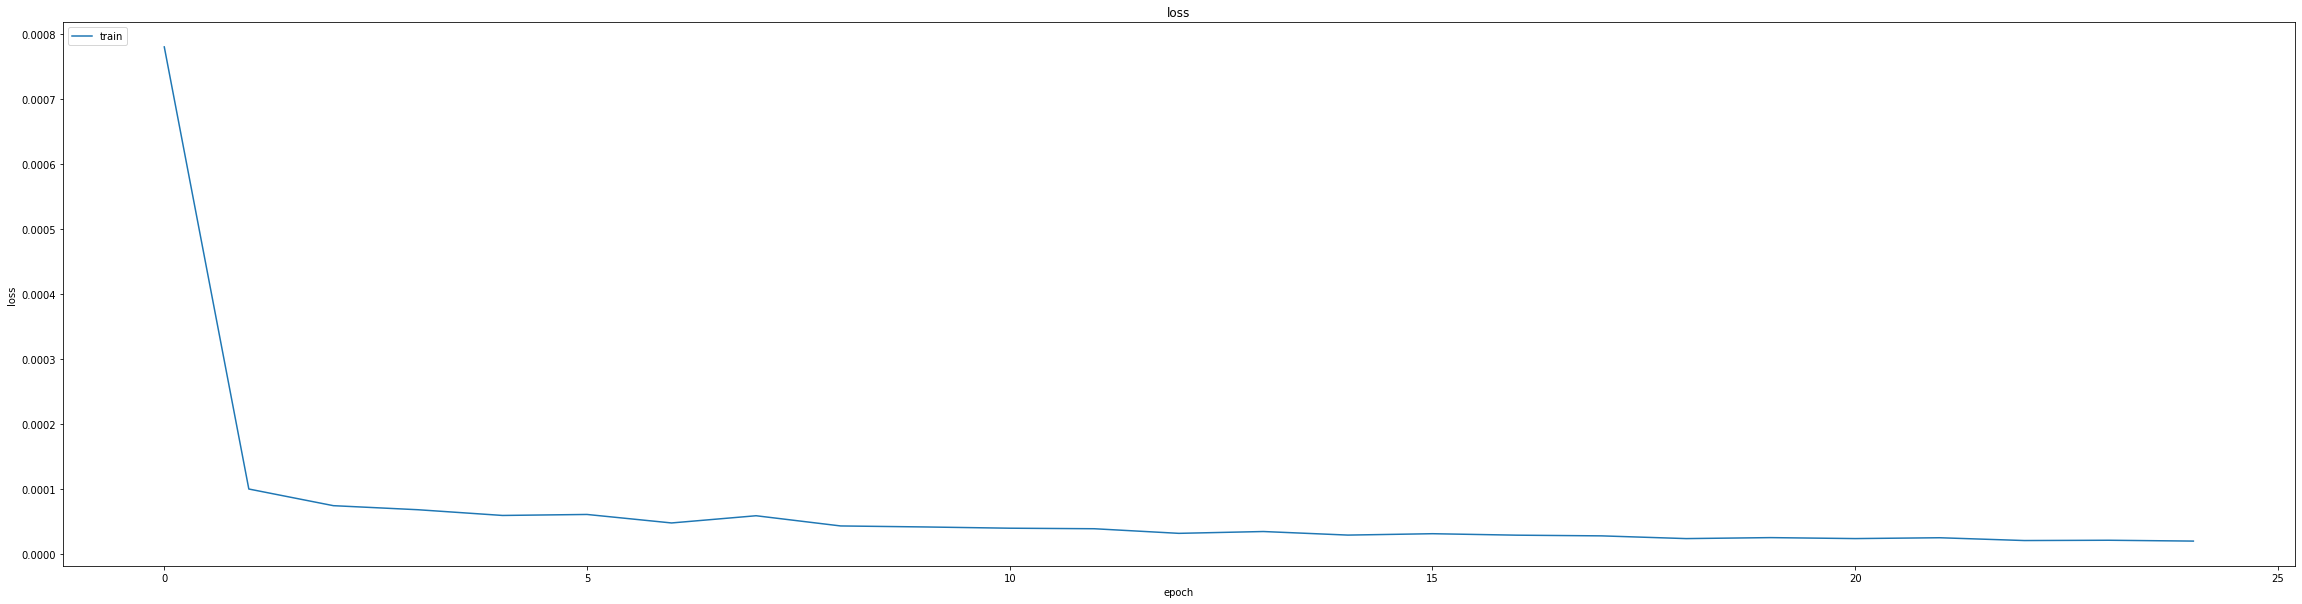

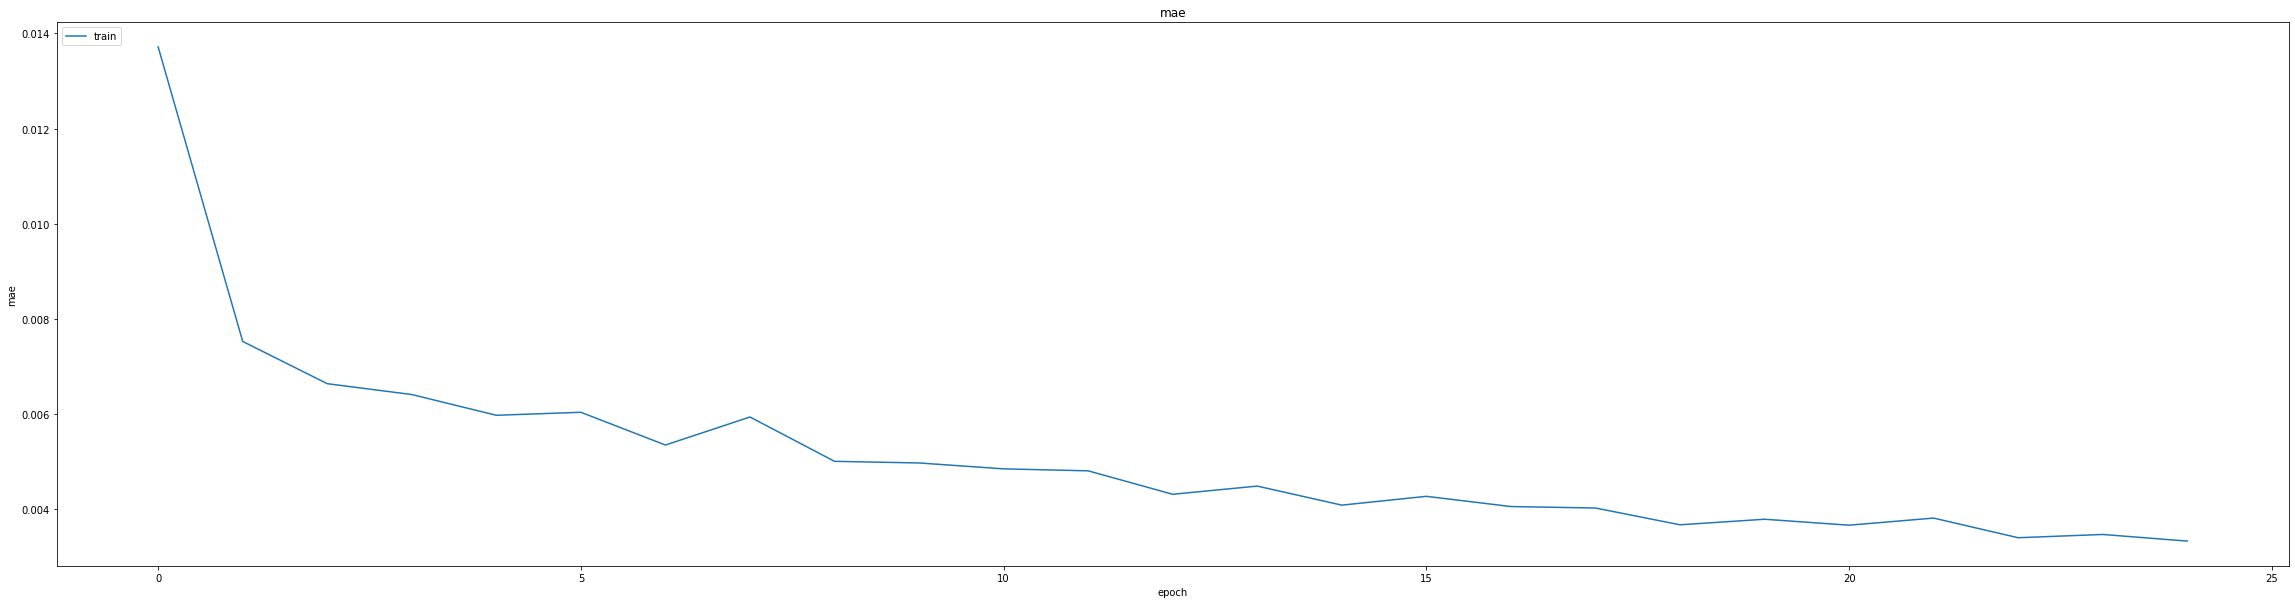

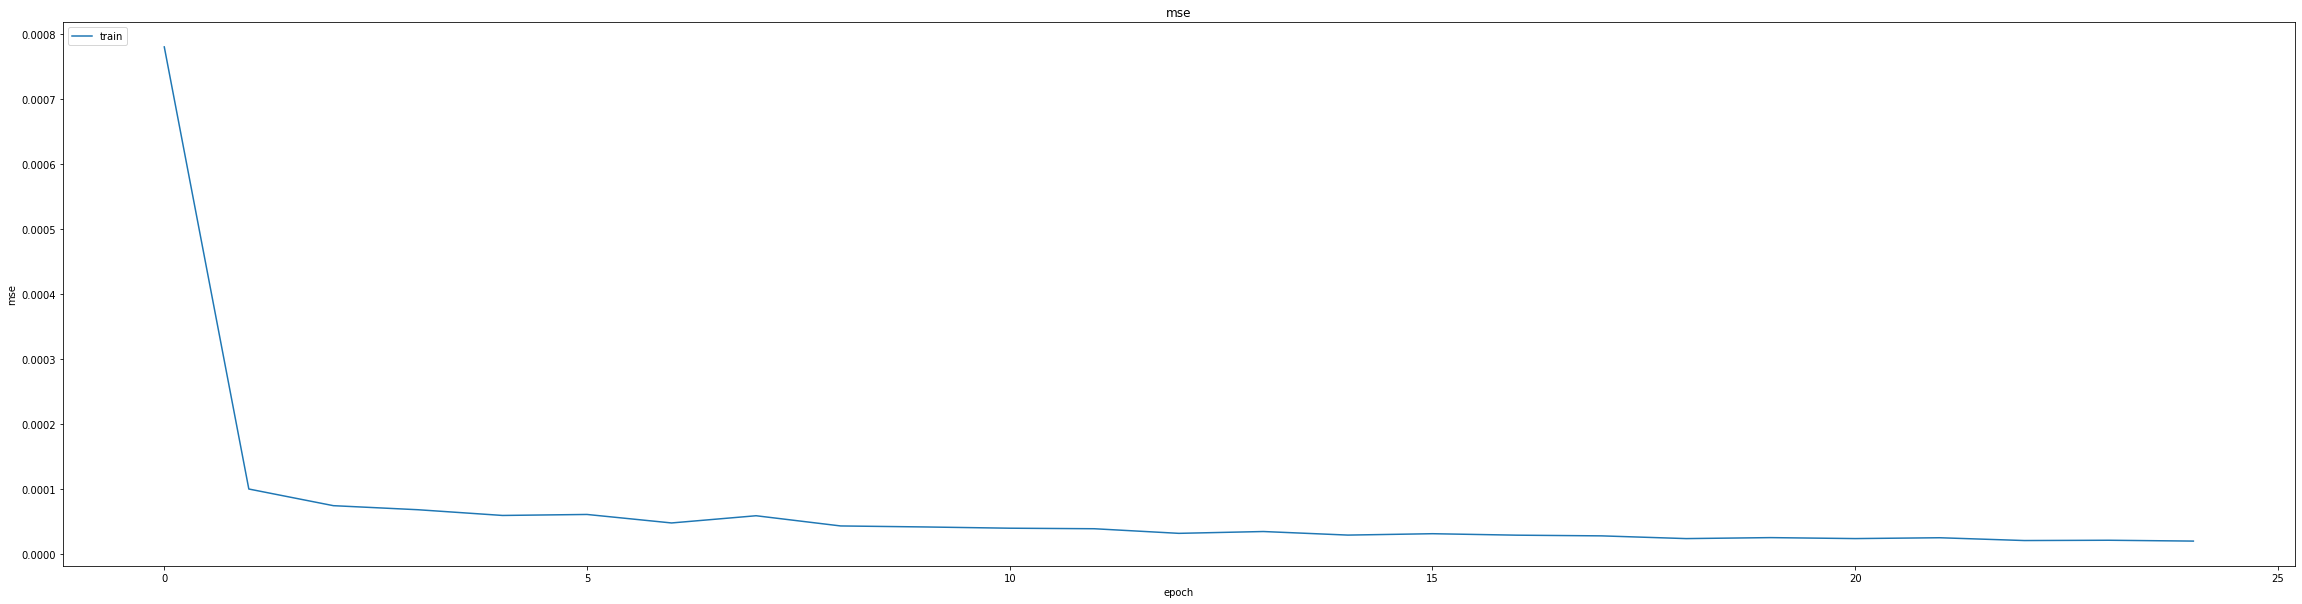

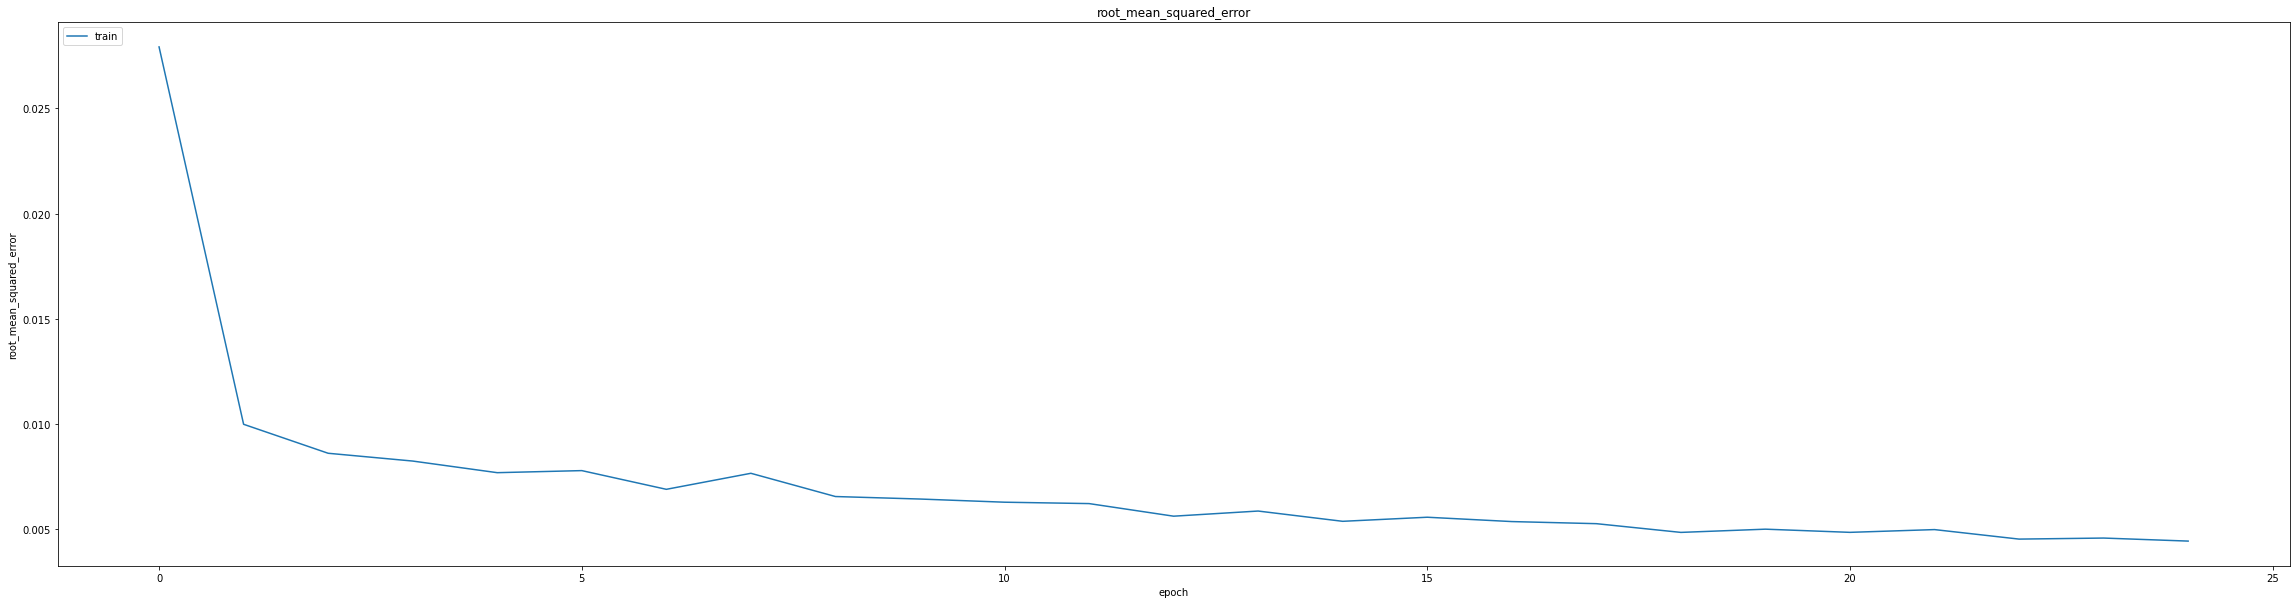

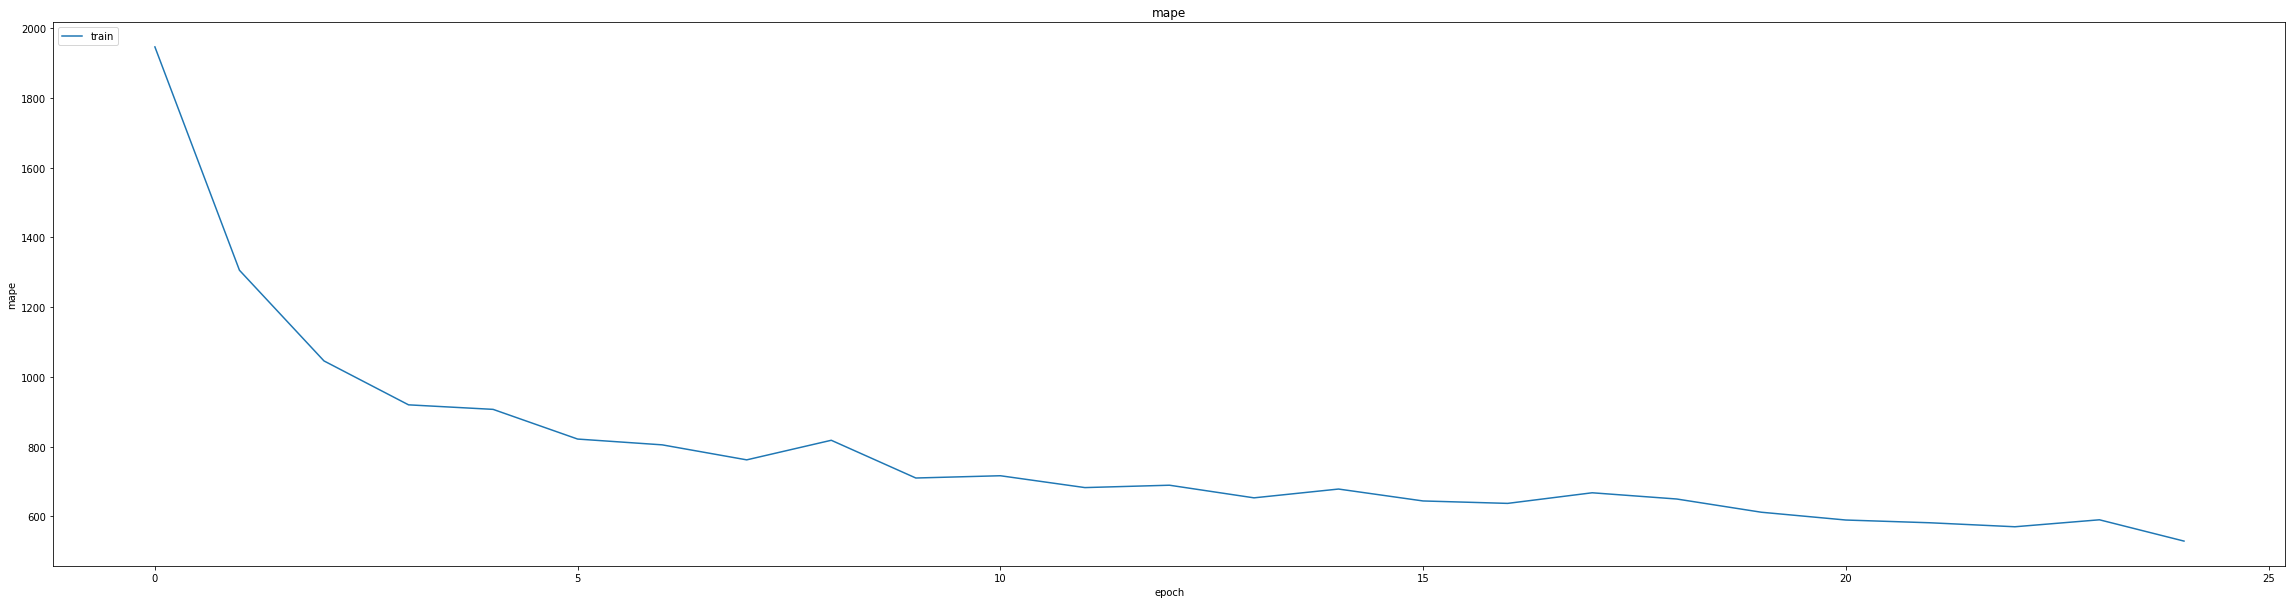

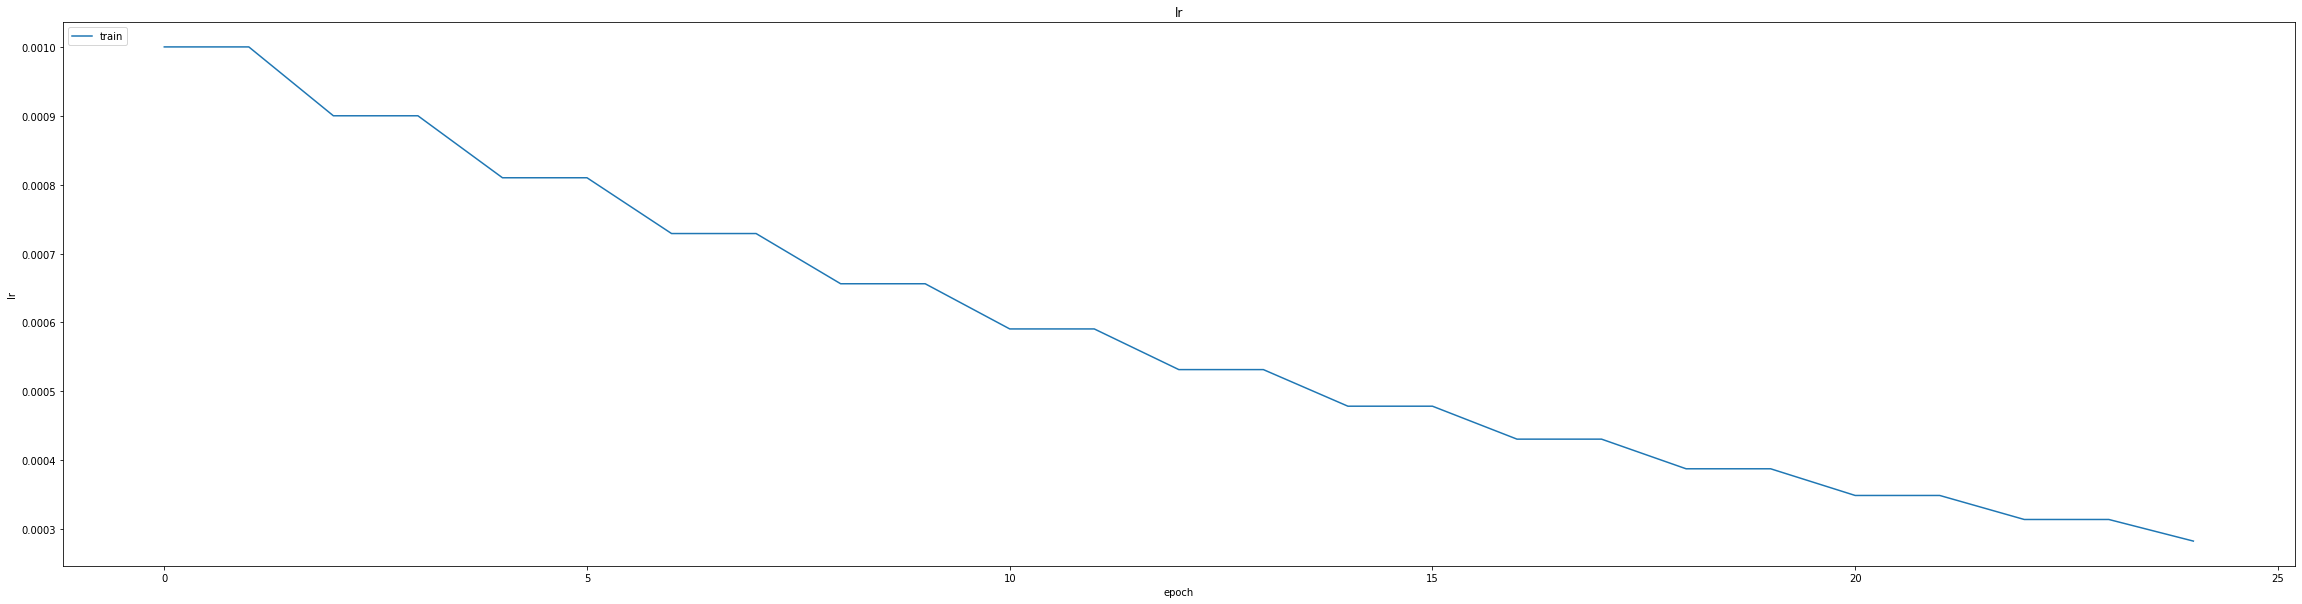

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.07693555951118469
0.0789790153503418
234/234 [==============================] - 8s 29ms/step
0.880109191094521


234/234 [==============================] - 7s 29ms/step


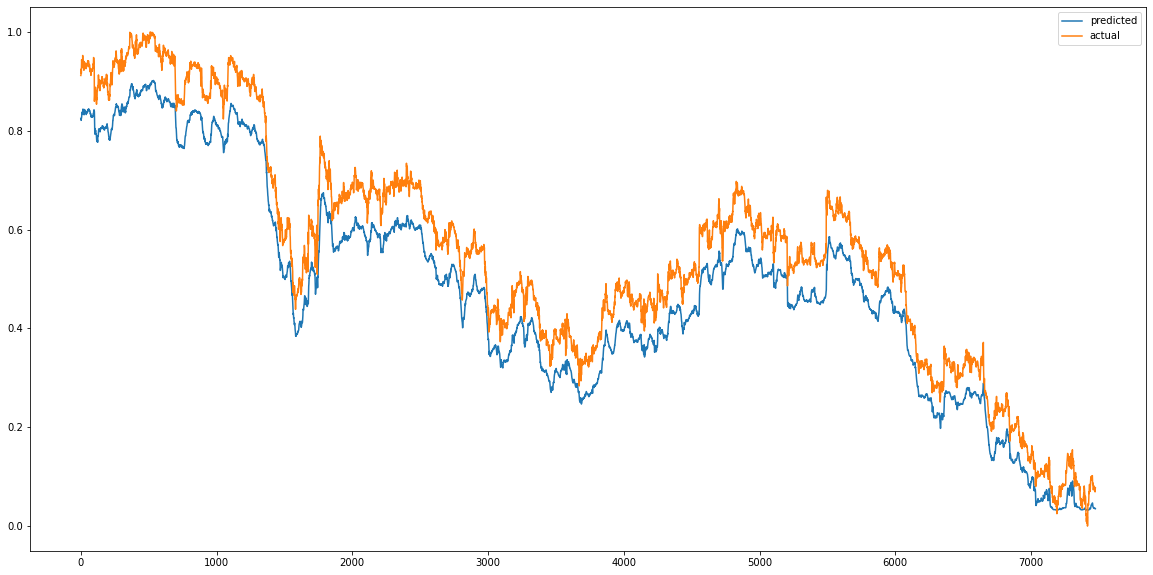

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


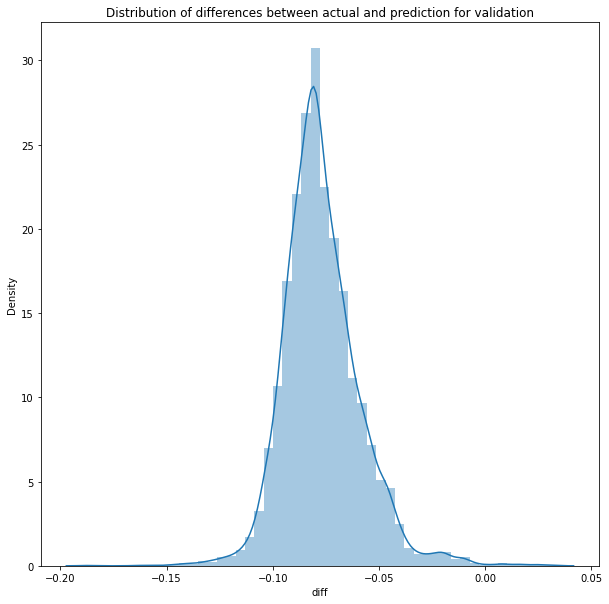

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 7s 29ms/step


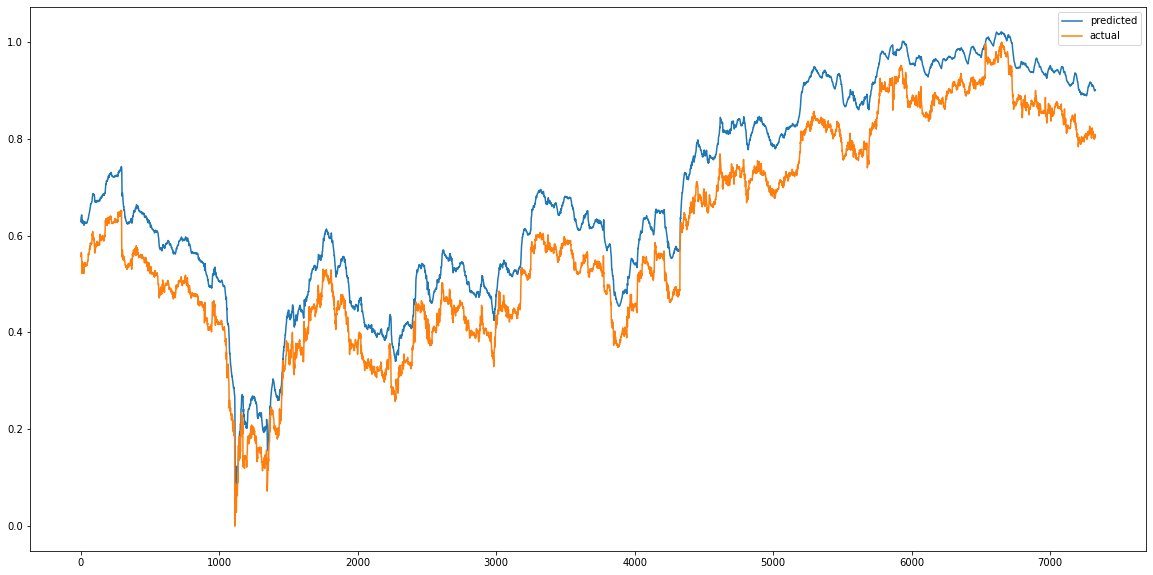

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


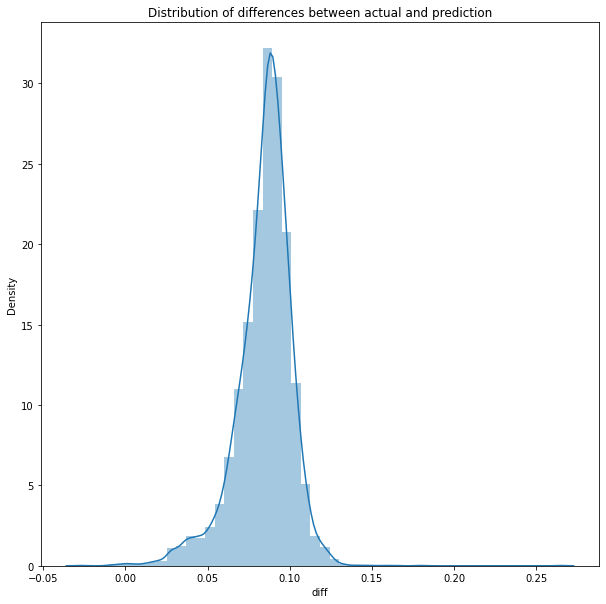

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0074077691110561224
MAE :  0.08435375264169445
RMSE  : 0.08606839786504755
229/229 [==============================] - 8s 33ms/step
R2_Score  : 0.837426616619833


count    7327.000000
mean        0.084337
std         0.017176
min        -0.027232
25%         0.076446
50%         0.086797
75%         0.094707
max         0.264015
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           328704    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint





checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 281.9137 - mae: 2.1989 - mse: 281.9137 - root_mean_squared_error: 16.7903 - mape: 11367.4756
Epoch 1: val_mse improved from inf to 0.05691, saving model to weights.best.hdf5
464/464 [==============================] - 133s 278ms/step - loss: 281.9137 - mae: 2.1989 - mse: 281.9137 - root_mean_squared_error: 16.7903 - mape: 11367.4756 - val_loss: 0.0569 - val_mae: 0.1882 - val_mse: 0.0569 - val_root_mean_squared_error: 0.2386 - val_mape: 80539.1016
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0388 - mae: 0.1654 - mse: 0.0388 - root_mean_squared_error: 0.1970 - mape: 10321.4209
Epoch 2: val_mse did not improve from 0.05691
464/464 [==============================] - 129s 277ms/step - loss: 0.0388 - mae: 0.1654 - mse: 0.0388 - root_mean_squared_error: 0.1970 - mape: 10321.4209 - val_loss: 0.0604 - val_mae: 0.1964 - val_mse: 0.0604 - val_root_mean_squared_error: 0.2458 - val_mape: 84650.5156
Epoch

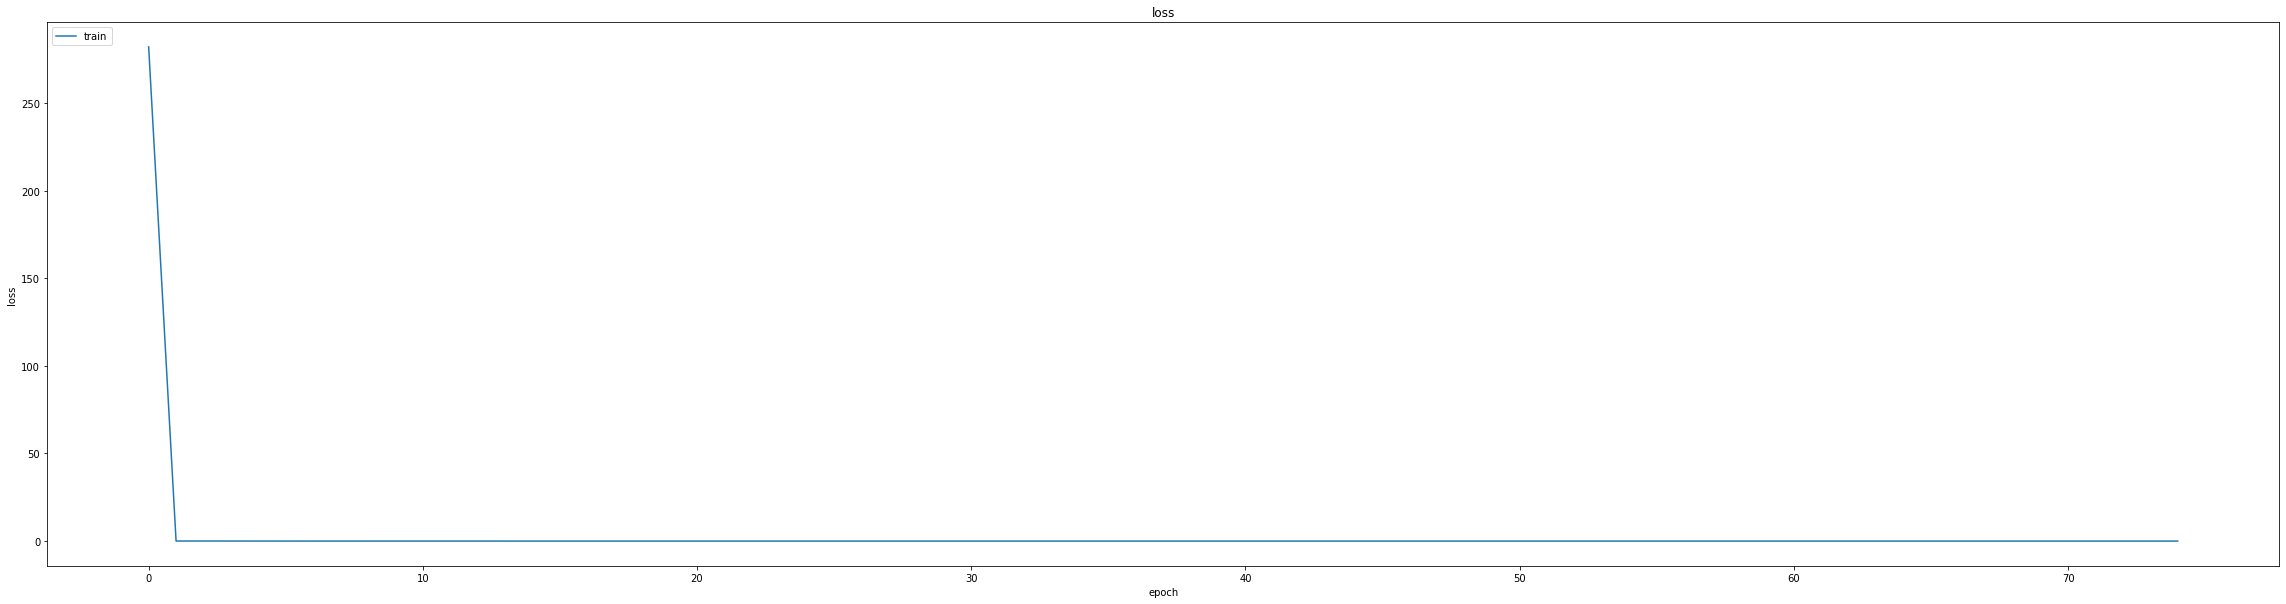

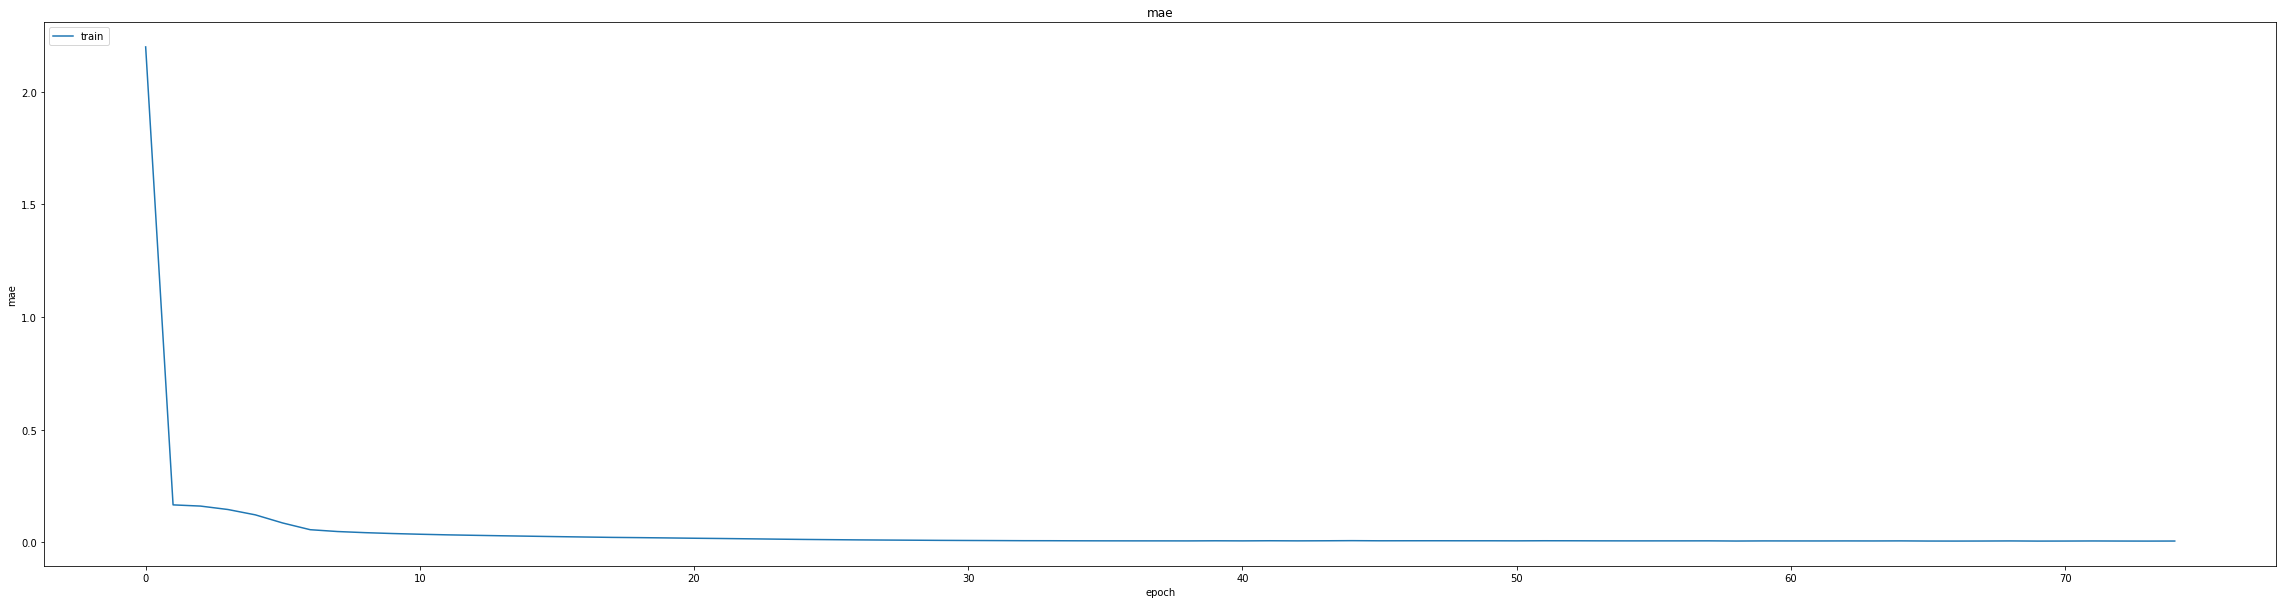

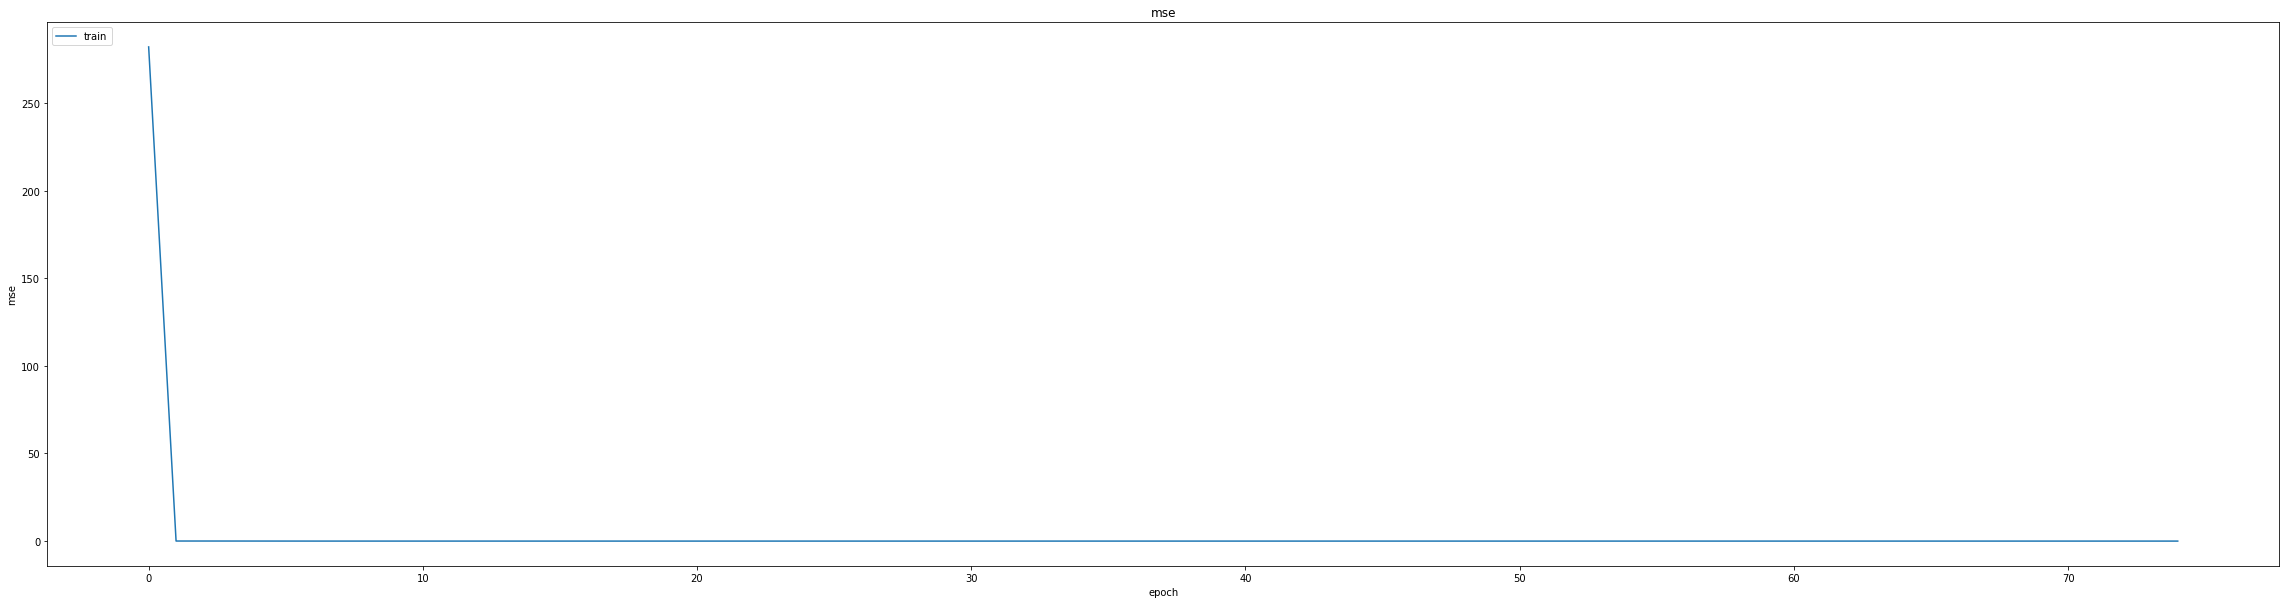

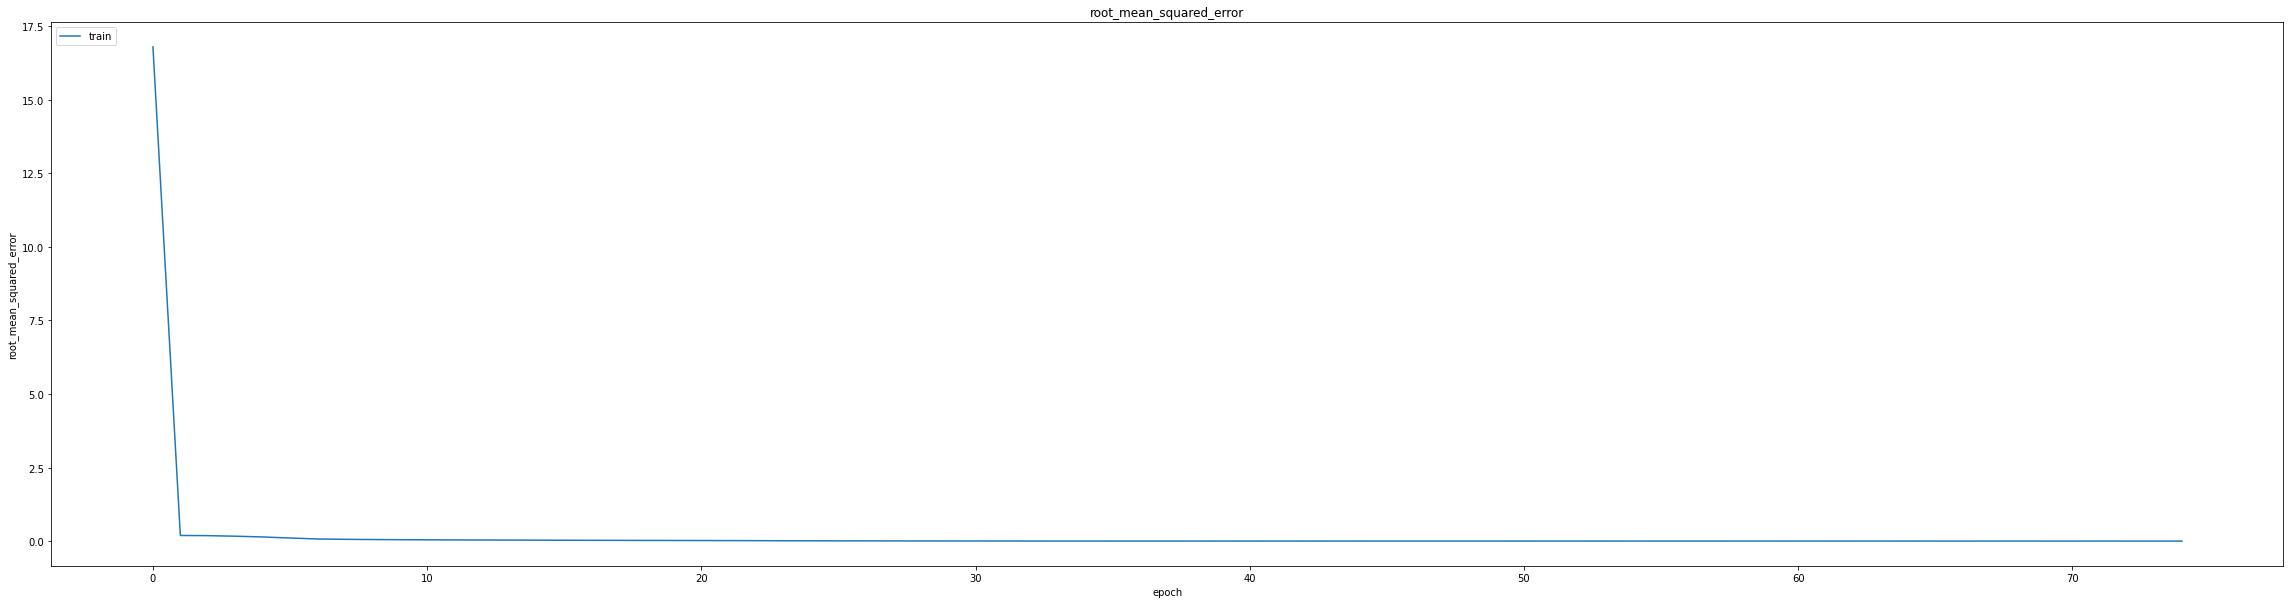

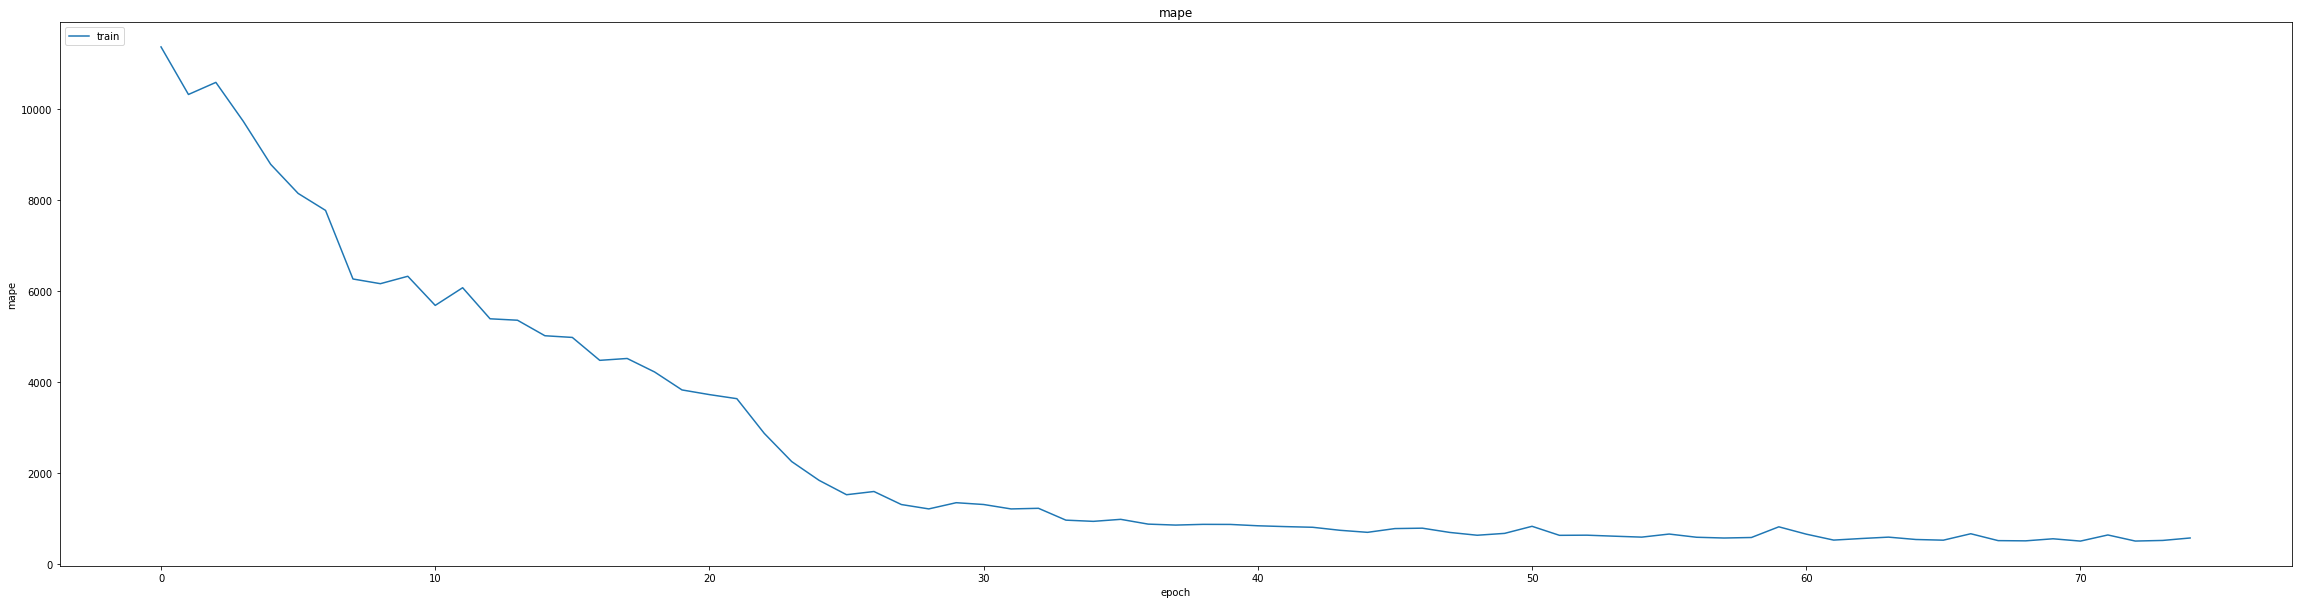

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['var_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0667276456952095
0.06887473165988922
234/234 [==============================] - 10s 39ms/step
0.8901859890102134


In [ ]:
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

In [ ]:
Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 1.6983e-04 - mae: 0.0056 - mse: 1.6983e-04 - root_mean_squared_error: 0.0130 - mape: 699.7023
Epoch 1: val_mse did not improve from 0.00474
464/464 [==============================] - 143s 299ms/step - loss: 1.6983e-04 - mae: 0.0056 - mse: 1.6983e-04 - root_mean_squared_error: 0.0130 - mape: 699.7023 - val_loss: 0.0054 - val_mae: 0.0709 - val_mse: 0.0054 - val_root_mean_squared_error: 0.0737 - val_mape: 4031.3079 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.7941e-05 - mae: 0.0031 - mse: 1.7941e-05 - root_mean_squared_error: 0.0042 - mape: 523.4794
Epoch 2: val_mse did not improve from 0.00474
464/464 [==============================] - 129s 277ms/step - loss: 1.7941e-05 - mae: 0.0031 - mse: 1.7941e-05 - root_mean_squared_error: 0.0042 - mape: 523.4794 - val_loss: 0.0055 - val_mae: 0.0722 - val_mse: 0.0055 - val_root_mean_squared_error: 0.0742 - val_mape: 3620.6775 - lr: 0.0010
lr

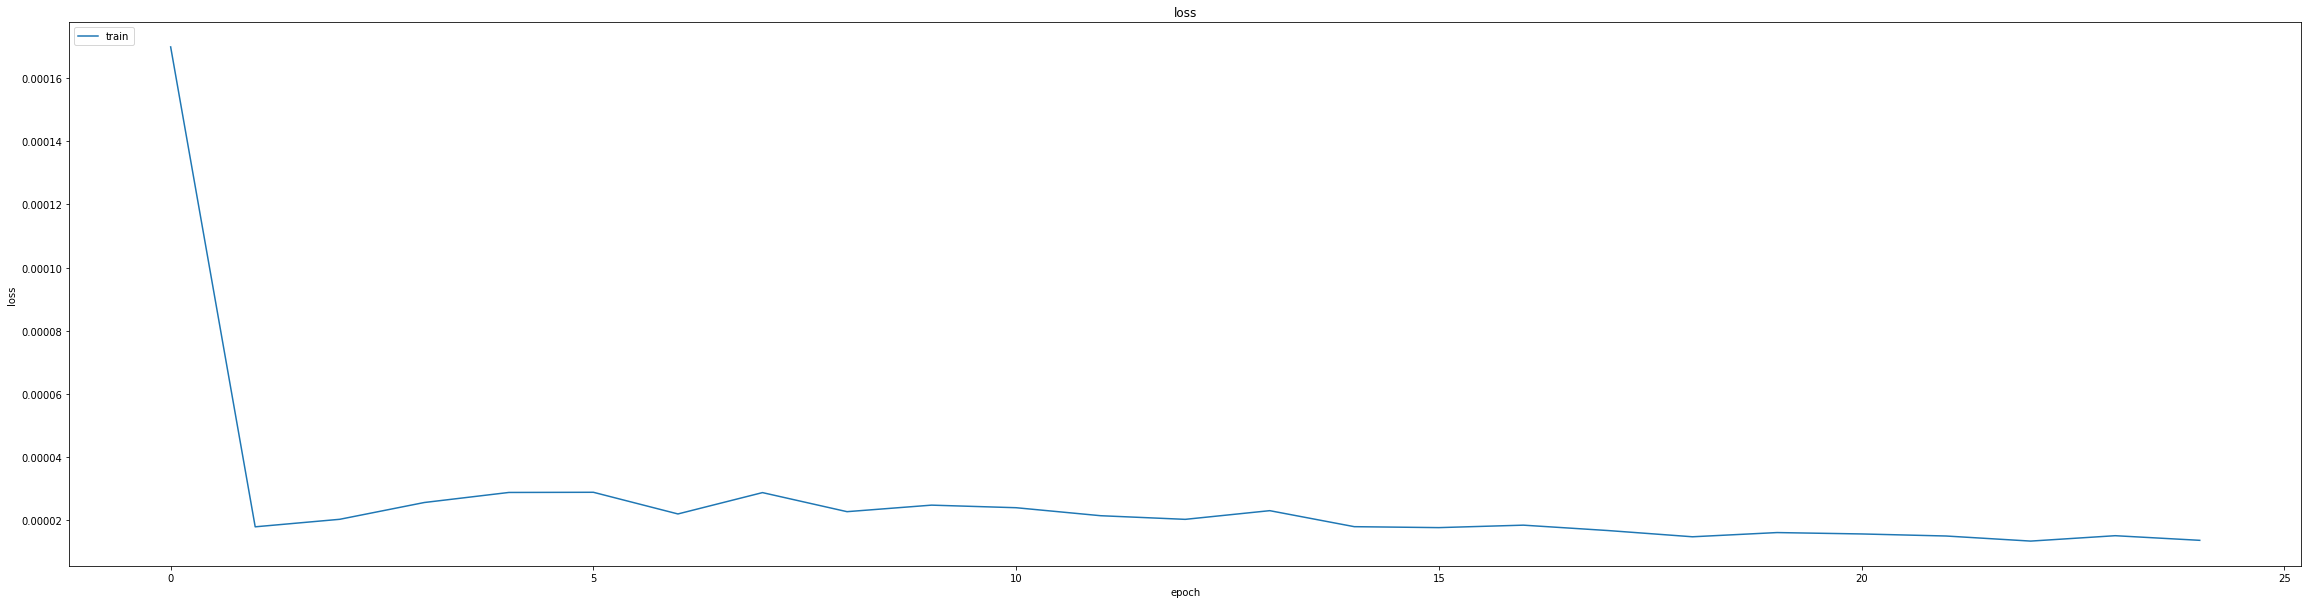

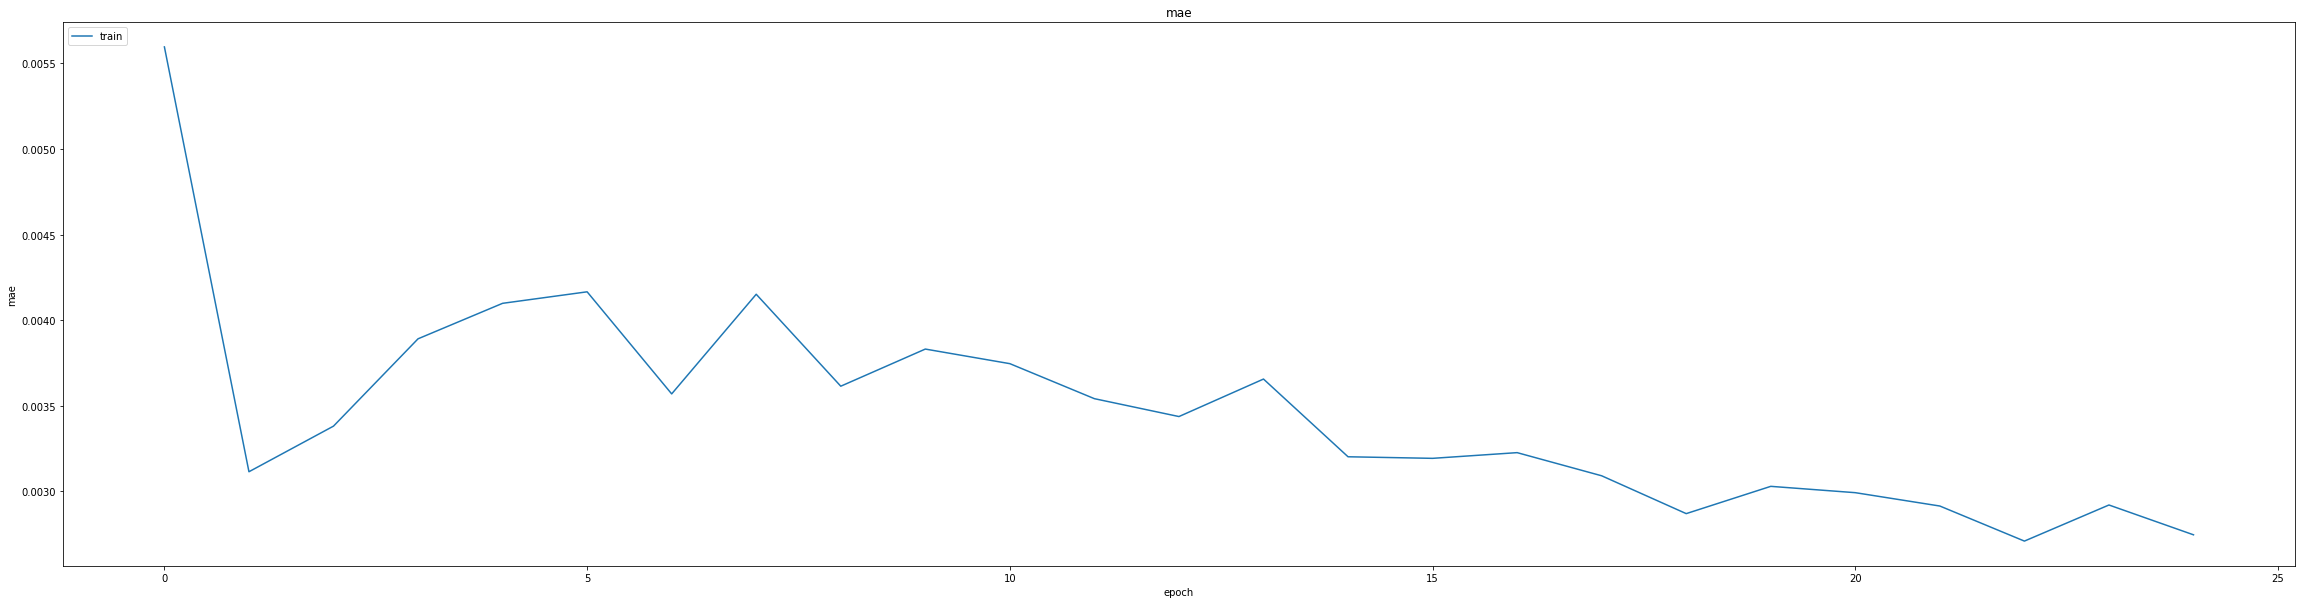

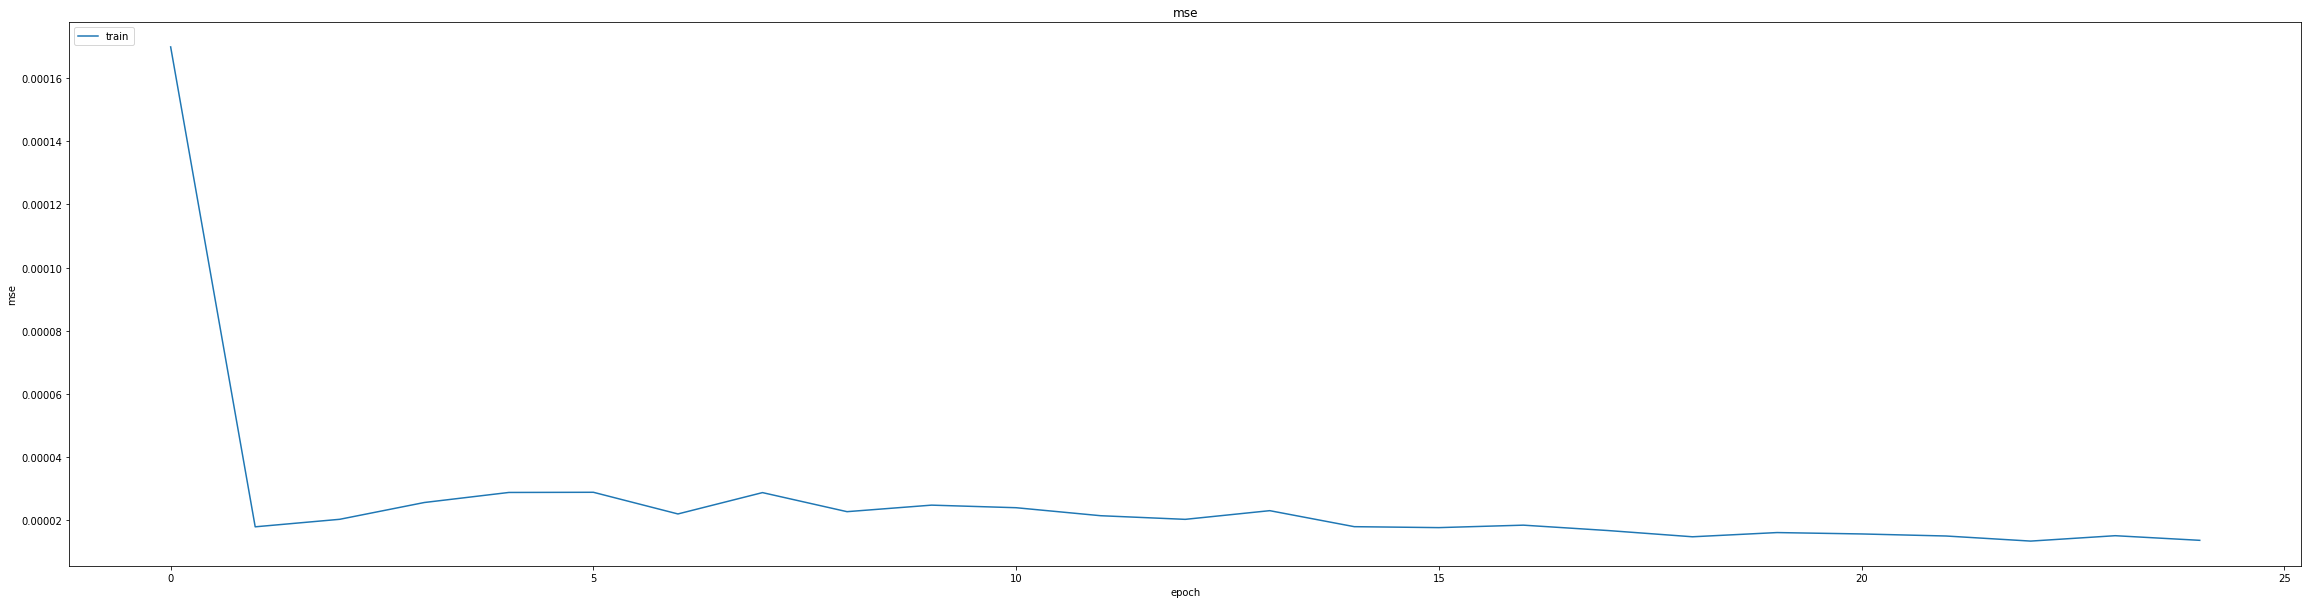

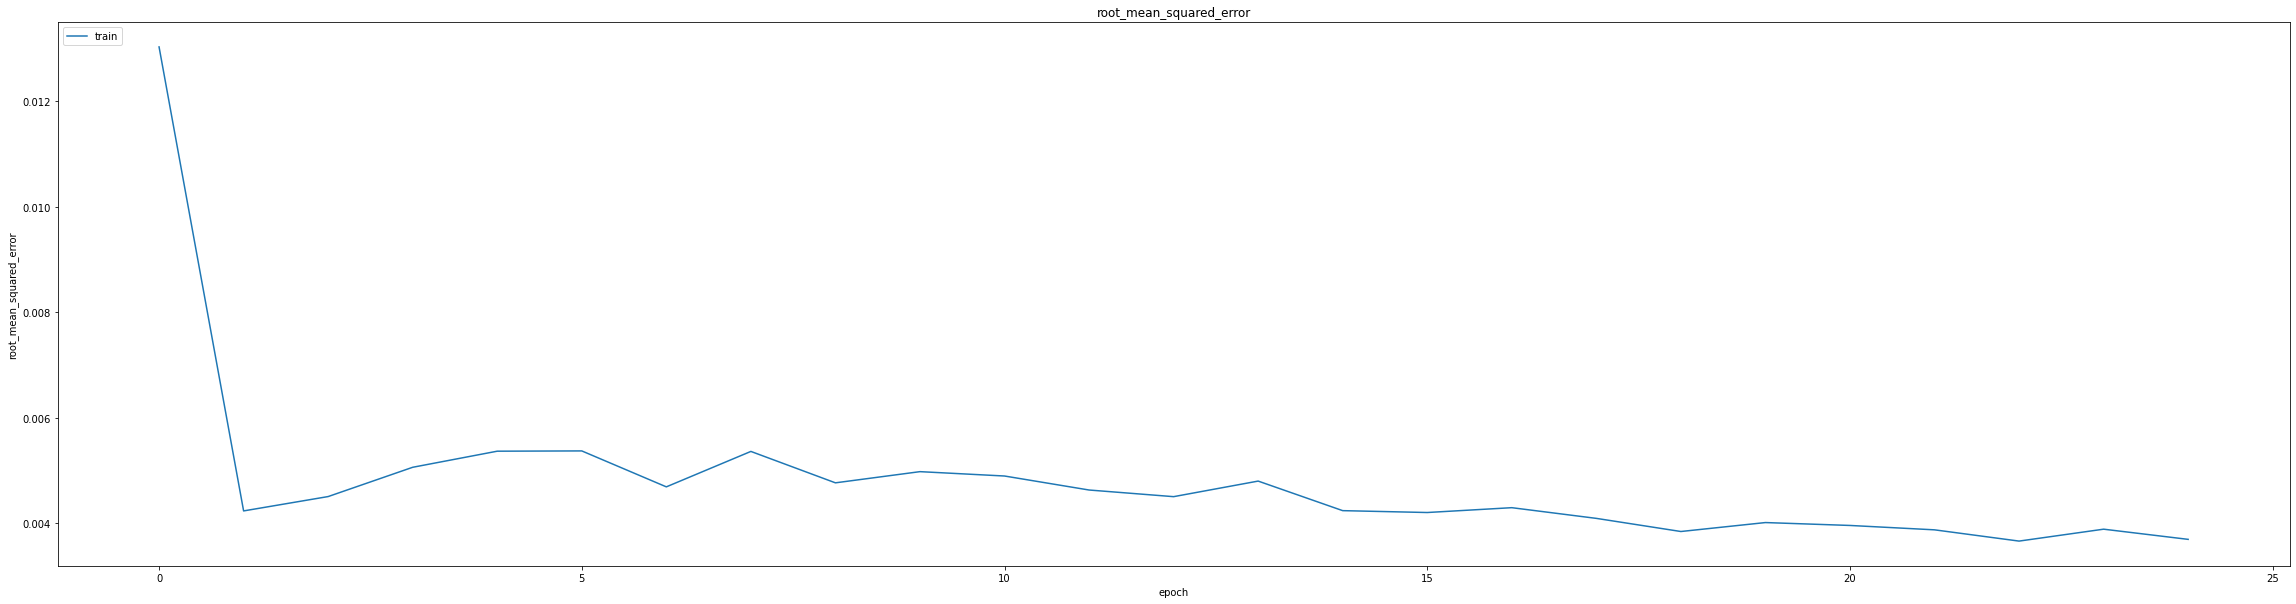

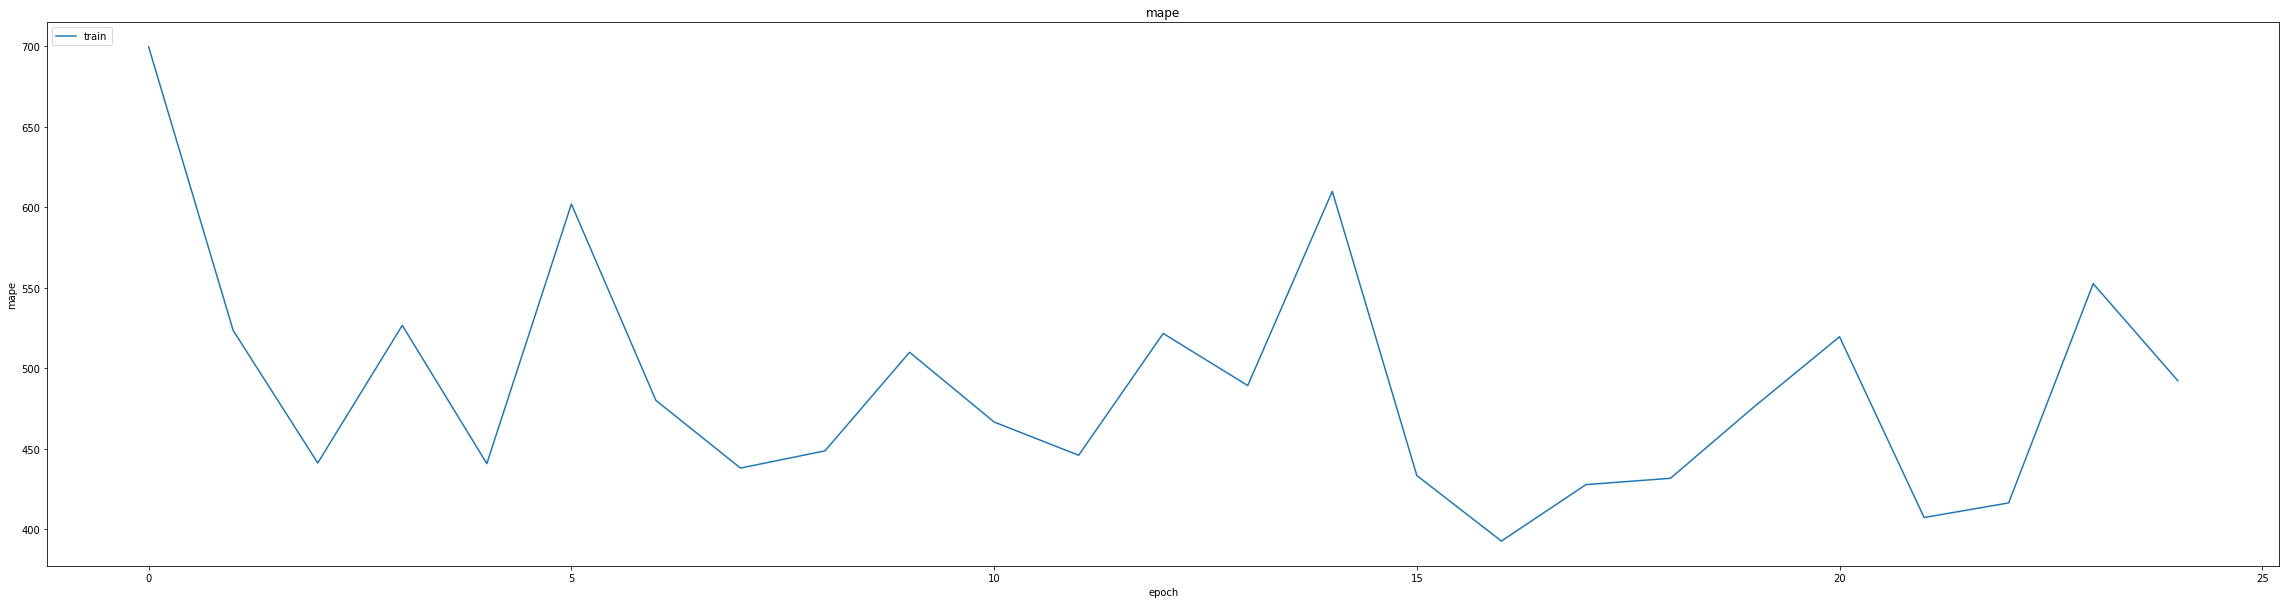

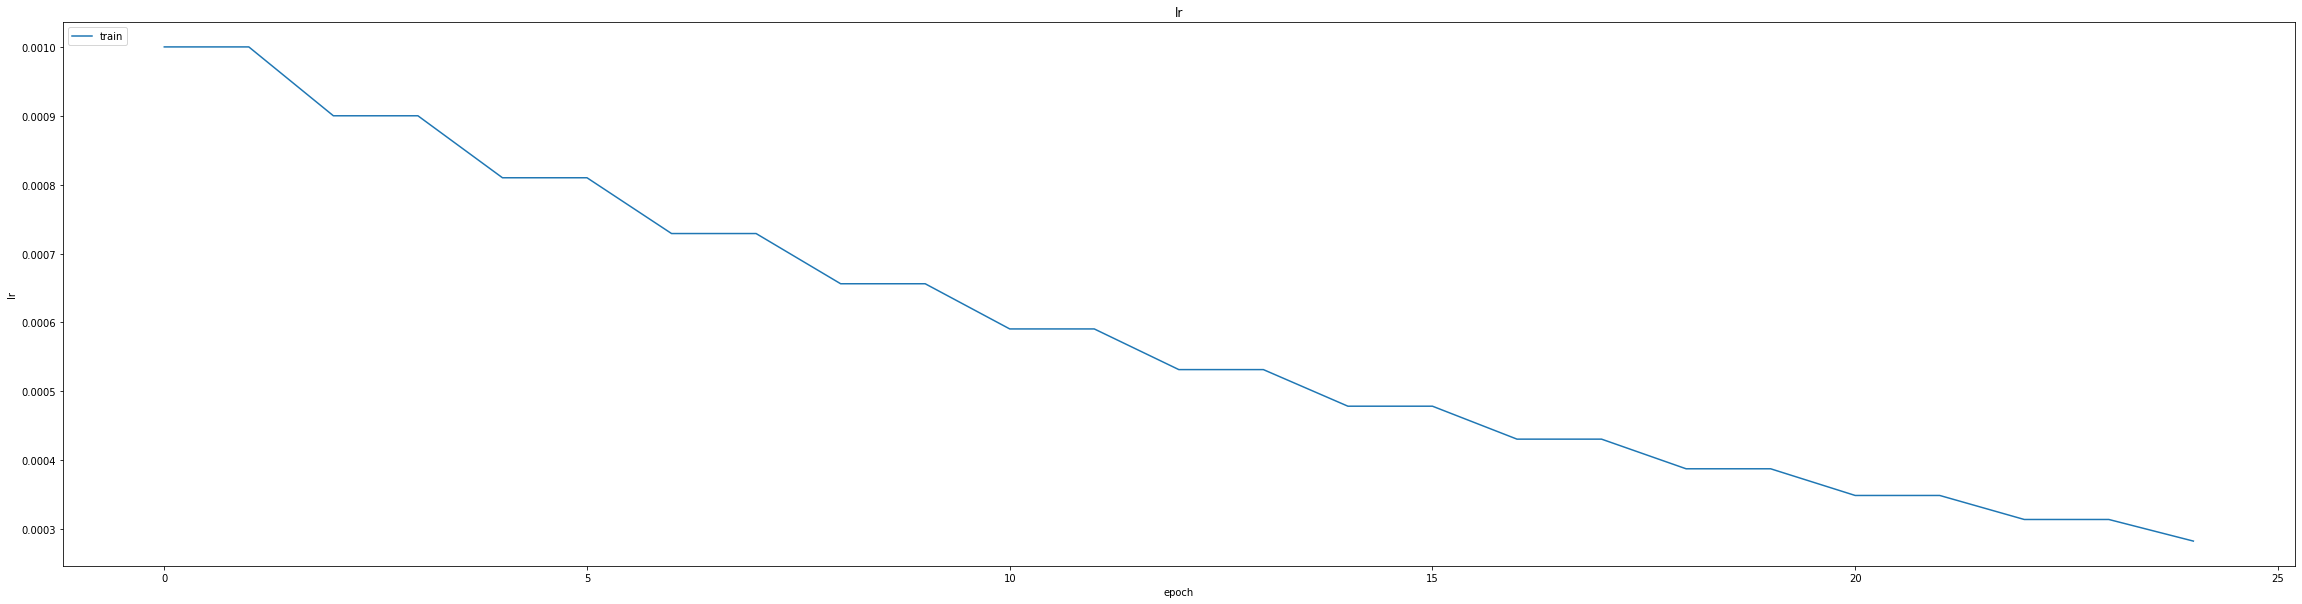

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['var_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.05974912270903587
0.061369139701128006
234/234 [==============================] - 13s 48ms/step
0.9239048590840278


In [ ]:
model.load_weights("weights.best.hdf5")

234/234 [==============================] - 9s 38ms/step


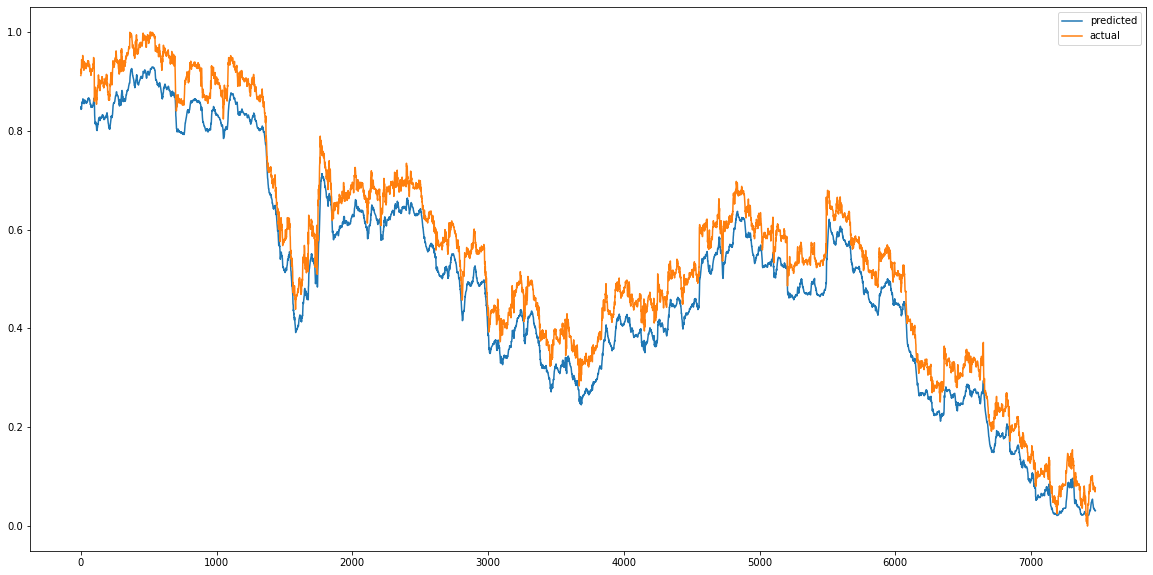

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


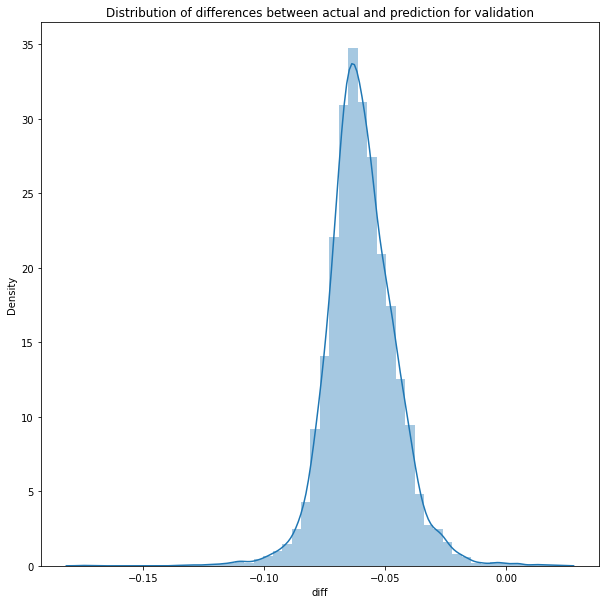

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 11s 48ms/step


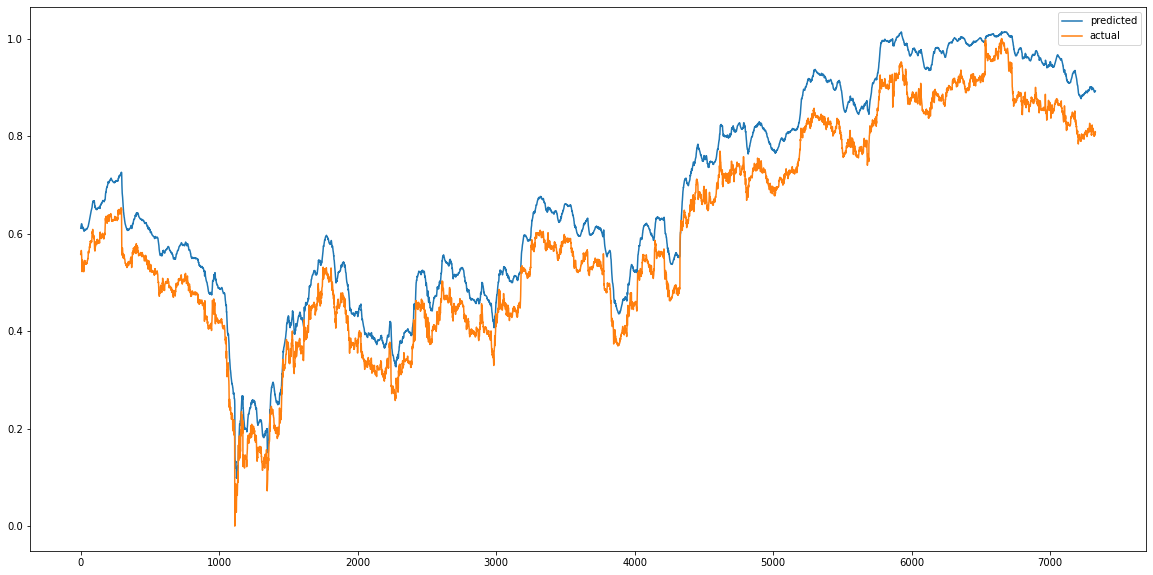

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


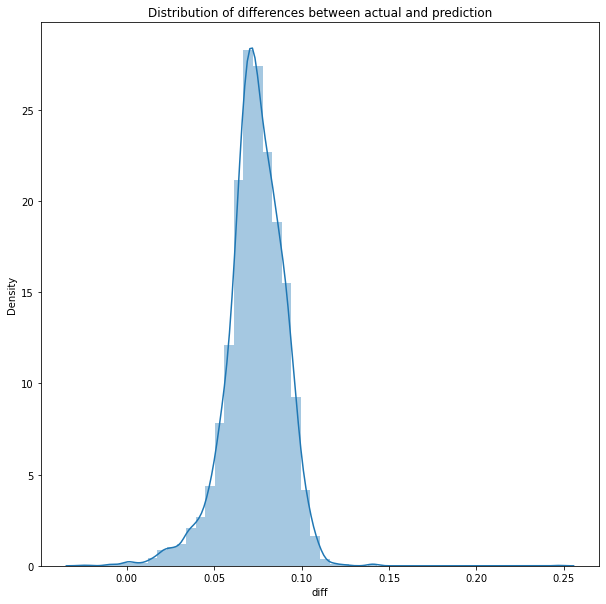

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print(test_r2_scr)
from math import sqrt
rmse=sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

print(rmse)
predictions['diff'].describe()

MSE :  0.005659177863918529
MAE :  0.07340551974711744
229/229 [==============================] - 9s 39ms/step
0.8758017861401949


count    7327.000000
mean        0.073379
std         0.016574
min        -0.026179
25%         0.064744
50%         0.073741
75%         0.084370
max         0.247140
Name: diff, dtype: float64